- ✍️: 학습
- 과제(~10/11)
    - EDA(성별에 따른 이탈률 등)
    - 결측치 처리 코드 짜기
    - 문자형 데이터 처리 코드, 스케일링 코드 짜기
- 과제(~10/18)
    - 모델 개발/튜닝
    - 성능 검증
    - 인사이트 도출
    ``` python
    "대표적인 모델 사용해보기"
    "optuna 패키지 사용해보기"
    ```


...

- "이탈 고객 예측"

In [ ]:
## 1012 회의 추가사항

# describe()
# cnt변수? 생성
# countplot의 사용(성별의 경우 수 불균형 데이터가 아니니까 비율말고 단순 count로 봐도 괜찮을듯?)
# 시각화 결과를 제목에 같이 넣어보기
# EDA보여줄 때 수치적인 표+그래프 이렇게 보여주기(코랩 참고)
# 나머지 변수들도 동일하게 EDA하기
# int에 해당하는 변수들(tenure, MonthlyCharges, TotalCharges) 시각화
# 연속형 변수는 일단 히스토그램으로 그려보기(카테고리컬 변수는 막대 그래프가 디폴트!)
# 히스토그램 그려서 전반적인 분포 파악하기
# 멘토님의 경우 구간별로 나눔(ex. 1~100이면 10씩 쪼갬 or 구성비 비슷하게 맞춰서 쪼갬)
# bin(7단위로 나눔(편한대로)) 함수 만들어서 쓰심(코랩 참고)
# uniform binning(값 기준 비닝), 근데 값 기준 비닝이 특정 값만 많이 들어가고 그러면
# 구성비를 고려해서 하는 quantil? binning 을 함(거의 많이 사용, 보통 불균형 데이터가 많으니)
# 뭘 쓰든 내 맘이지만 왜 썼는지, 그 기준 이런걸 잘 설명하기
# 금융권은 WOA 비닝?? 꼭 찾아보기!!
# 상관관계도 보기
# 수치가 유의미한 차이인지(ex. 24% 26%) 통계적 검정으로도 보여주고, 그림으로도 같이 보여주는게 베스트!
# 컬럼 명세 작성하는거 배우기(count, na count, unique, type 등등 빨간 글씨 하신 부분 중요)
# 컬럼 명세 실무에서도 엑셀에 명세 정리하는지? ㅇㅇ 팀 사이트에 따로 하기도 하지만 엑셀에도 한다~
# information value도 꼭 찾아보기!! 모든 변수 EDA를 하기 보다는, y에 유의미한 변수들을 골라서 함(or 랜포나 light gbm 돌려서 상위에 나온 변수로 eda 하기도 함)
# 박스플롯은 금융 실무에서 잘 안 쓴다...
# 등등 코랩 참고
# 메타 데이터 참고 사이트(https://medium.com/@zulfikarirham02/telco-customer-churn-prediction-using-machine-learning-and-deep-learning-8d1905b04980)

# 1. 환경설정

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# base setting
#plt.rc("font", family = "Malgun Gothic")
#sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
font = {'weight':'normal', 'size':12}
plt.rc('font', **font)
sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
sns.set_context('notebook')
sns.set_style("ticks")
FIG_FONT = dict(weight="bold", color="#7f7f7f")
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')


# 2. 데이터 로드 및 확인
- y: Churn(지난 달 이탈고객)

## 2.1. Load Data

In [148]:
path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path)

## 2.2. 데이터 구조 확인

In [149]:
df.shape
# 7043행 21열

(7043, 21)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [151]:
# ✍️범주형 데이터 확인
df.describe(include=['object']).T

count unique               top  freq
customerID        7043   7043        7590-VHVEG     1
gender            7043      2              Male  3555
Partner           7043      2                No  3641
Dependents        7043      2                No  4933
PhoneService      7043      2               Yes  6361
MultipleLines     7043      3                No  3390
InternetService   7043      3       Fiber optic  3096
OnlineSecurity    7043      3                No  3498
OnlineBackup      7043      3                No  3088
DeviceProtection  7043      3                No  3095
TechSupport       7043      3                No  3473
StreamingTV       7043      3                No  2810
StreamingMovies   7043      3                No  2785
Contract          7043      3    Month-to-month  3875
PaperlessBilling  7043      2               Yes  4171
PaymentMethod     7043      4  Electronic check  2365
TotalCharges      7043   6531                      11
Churn             7043      2                No  5174

In [152]:
# 숫자형 데이터 확인
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [153]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

## 2.3. 데이터 형태 변경

### 2.3.1. 데이터 구조상 숫자형이지만 문자로 구성된 데이터를 변형

In [154]:
# ✍️문자를 숫자형으로 변경 (erros='coerce' -> 숫자로 바꿀 수 없는 데이터를 NaN으로 강제 변경 후 숫자형태 변경)
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

### 2.3.2. 타겟 0, 1로 변경

In [155]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [156]:
# 라벨인코딩 이용
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

# ✍️apply+람다함수 이용가능
#df['Churn'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [157]:
df['Churn'].unique()

array([0, 1])

In [158]:
# ✍️EDA에서 고객수 집계할 때 이용
df['cnt1'] = 1

# 3. EDA
- EDA요약...

1. `결측치` 각 피처(컬럼)의 결측값 비율
2. `이상치` 각 피처별 이상치 확인
3. `unique` 각 피처의 unique값과 unique값별 빈도
4. `기술통계` 각 피처의 기술통계(평균값, 최대값, 최솟값, 최빈값, 분위수 등)
5. `상관관계` 피처-피처, 피처-타겟 간 상관관계 매트릭스
6. `인사이트 도출` 히스토그램, bar plot, box plot 등
7. `각 피처별 Information Value 등 확인`

## 3.1. 함수정의

In [159]:
# ✍️
def create_bins(series, method='quantile', bins=10, labels=None):
    """
    연속형 컬럼 binning 함수

    Parameters:
        series: pd.Series (연속형 데이터)
        method: 'quantile' (분위수) or 'uniform' (균등)
        bins: 구간 수
        labels: 구간 이름 리스트 (default None -> 자동 생성)
    
    Returns:
        pd.Series: binning된 구간
    """

    if method == 'quantile':
        binned = pd.qcut(series, q=bins, labels=labels, duplicates='drop')
    elif method == 'uniform':
        binned = pd.cut(series, bins=bins, labels=labels)
    else:
        raise ValueError("method는 'quantile'또는 'uniform'만 가능합니다.")
    
    return binned

In [160]:
temp = create_bins(df['TotalCharges'])

In [161]:
temp.unique()[0].left

18.799

In [162]:
temp.apply(lambda x: x.left)

0         18.799
1       1397.475
2         84.600
3       1397.475
4         84.600
          ...   
7038    1397.475
7039    5976.640
7040     267.070
7041     267.070
7042    5976.640
Name: TotalCharges, Length: 7043, dtype: category
Categories (10, float64): [18.799 < 84.600 < 267.070 < 551.995 ... 2048.95 < 3141.13 < 4475.41 < 5976.64]

In [163]:
# ✍️
def eda_target(data, col, target_col='Churn', bins=10, method='quantile', is_category=None):
    """
    연속형/명목형 컬럼의 EDA + Target Rate 시각화

    - 연속형: binning 후 구성비(%)와 Target Rate 겹쳐서 표시
    - 명목형: 그룹별 Count(%)와 Target Rate 겹쳐서 표시

    Parameters:
        df: pd.DataFrame
        col: 분석할 컬럼
        target_col: Target컬럼 (0/1)
        bins: 연속형일 때 bin 수
        method: 'quantile' 또는 'uniform'
    """

    df = data[[col, target_col]].copy()

    # 1) Bin생성
    if is_category != True and pd.api.types.is_numeric_dtype(df[col]):
        # 연속형 처리: binning
        df[f'{col}_bin'] = create_bins(df[col], method=method, bins=bins)
        df[f'{col}_bin'] = df[f'{col}_bin'].apply(lambda x: x.left)
        group_col = f'{col}_bin'
    else:
        # 명목형 처리: 그대로 그룹
        group_col = col

    # ✍️2) 구간별 Count & Target Rate 계산
    summary = df.groupby(group_col).agg(
        Count=(col, 'count'),
        TargetRate=(target_col, 'mean')
    ).reset_index()

    summary['CountPercent'] = summary['Count'] / summary['Count'].sum() * 100
    summary['TargetRatePercent'] = summary['TargetRate'] * 100

    print(summary)

    # 3) 그래프 그리기
    # x축
    # x_labels = [interval.left for interval in summary[f'{col}_bin']]
    x_labels = summary[group_col].astype(str).unique().tolist()
    x = range(len(summary))

    # figure 크기
    plt.figure(figsize=(10, 5))

    # Count(막대)
    # plt.bar(x, summary['Count'], color='skyblue', alpha=0.6, label='Composition (%)')
    plt.bar(x, summary['CountPercent'], color='skyblue', alpha=0.6, label='Composition (%)')
    plt.ylabel('Composition (%)')

    # ✍️Target Rate(라인)
    ax2 = plt.twinx()
    ax2.plot(x, summary['TargetRatePercent'], color='red', marker='o', linestyle='-', label='Target Rate (%)')
    ax2.set_ylim(0, 100)
    ax2.set_ylabel('Target Rate (%)')

    # x축 구간 라벨
    plt.xticks(x, x_labels)
    plt.title(f'Target EDA ({col})')
    plt.show()

In [164]:
def eda_count_categorical(df, col):
    """
    명목형 컬럼의 단순 개수 EDA

    Parameters:
        df: pd.DataFrame
        col: 분석할 컬럼
    """

    plt.figure(figsize=(6, 4))

    sns.countplot(data=df, x=col)  # 단순 개수
    plt.title(f'Count by {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')

    plt.show()

In [165]:
def eda_count_categorical_target(df, col, target_col):
    """
    명목형 컬럼의 단순 개수 EDA + Target count EDA(hue 이용)

    Parameters:
        df: pd.DataFrame
        col: 분석할 컬럼
        target_col: Target컬럼
    """

    plt.figure(figsize=(6, 4))

    sns.countplot(data=df, x=col, hue=target_col)
    plt.title(f'Count by {col} and {target_col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')

    plt.show()

## 3.2. gender에 따른 Churn
- 성별(gender)간 이탈률 차이 없음

In [166]:
df.groupby('gender')[['cnt1', 'Churn']].sum()

cnt1  Churn
gender             
Female  3488    939
Male    3555    930

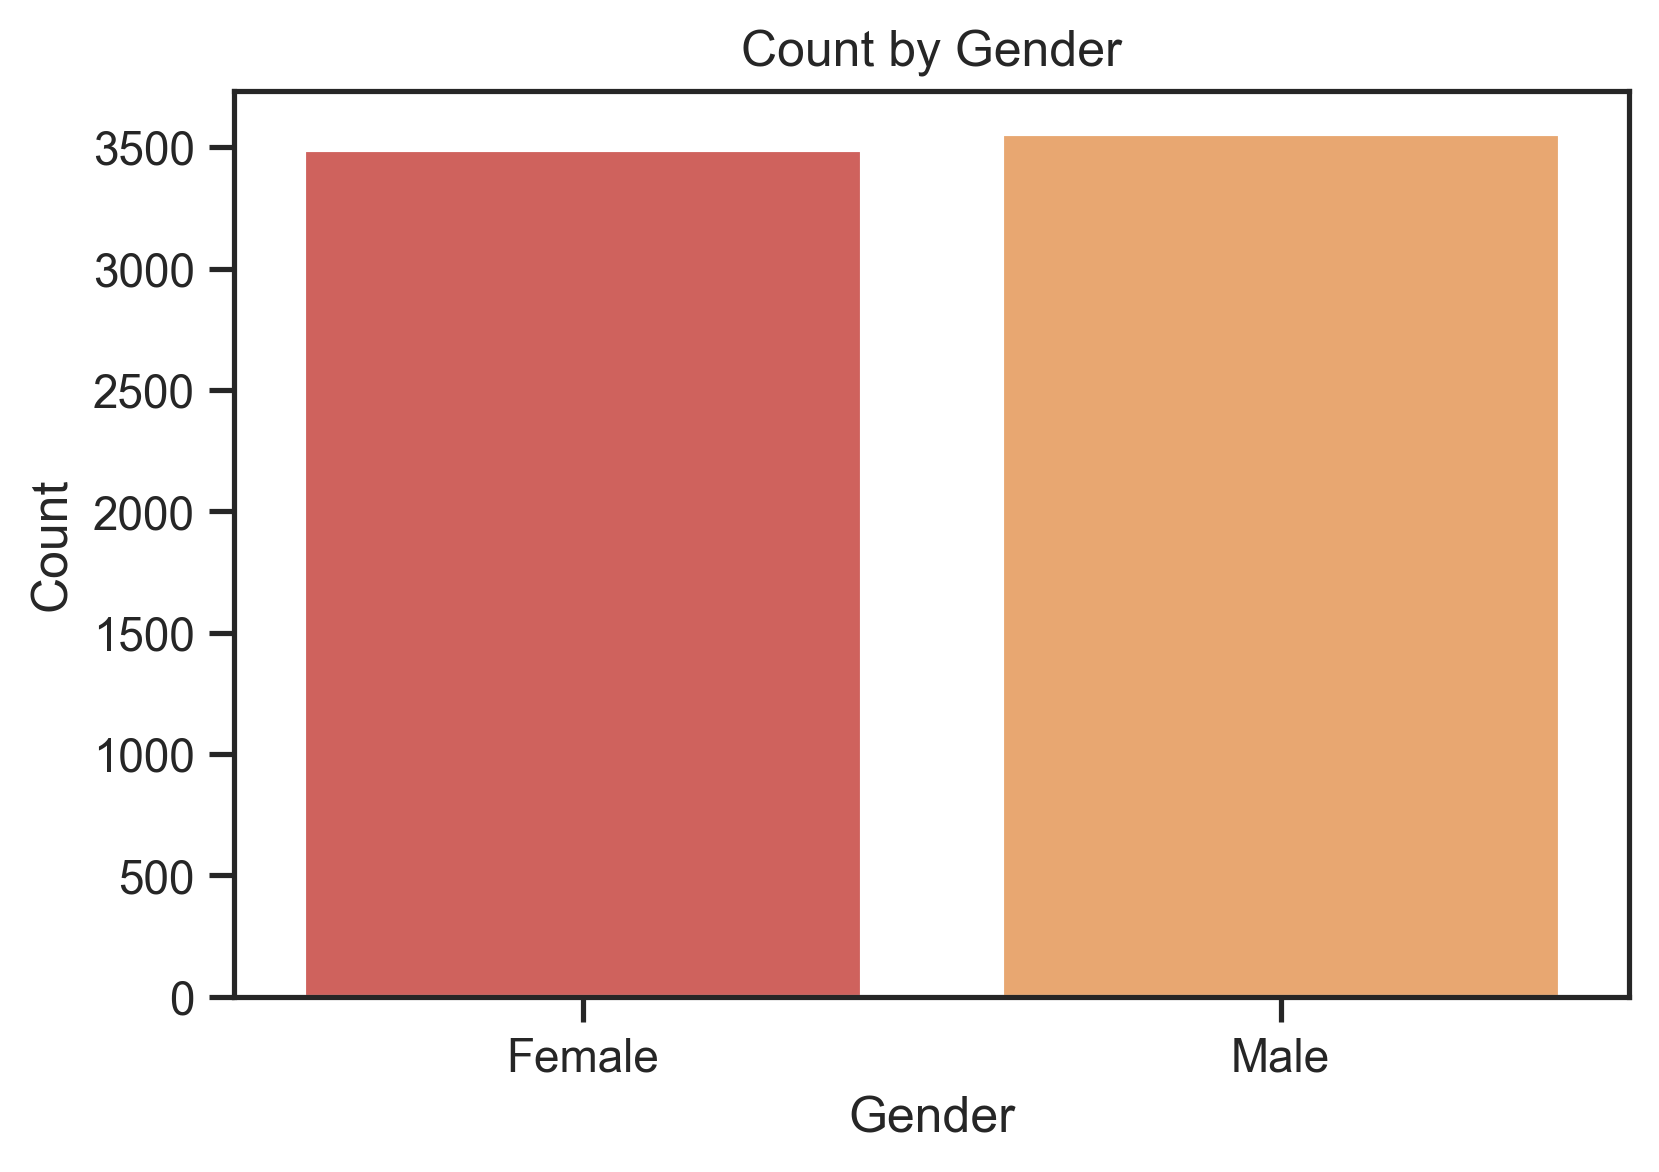

In [167]:
# 단순 개수
# eda_count_categorical(df, 'gender')
plt.figure(figsize=(6, 4))

sns.countplot(data=df, x='gender')
plt.title('Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

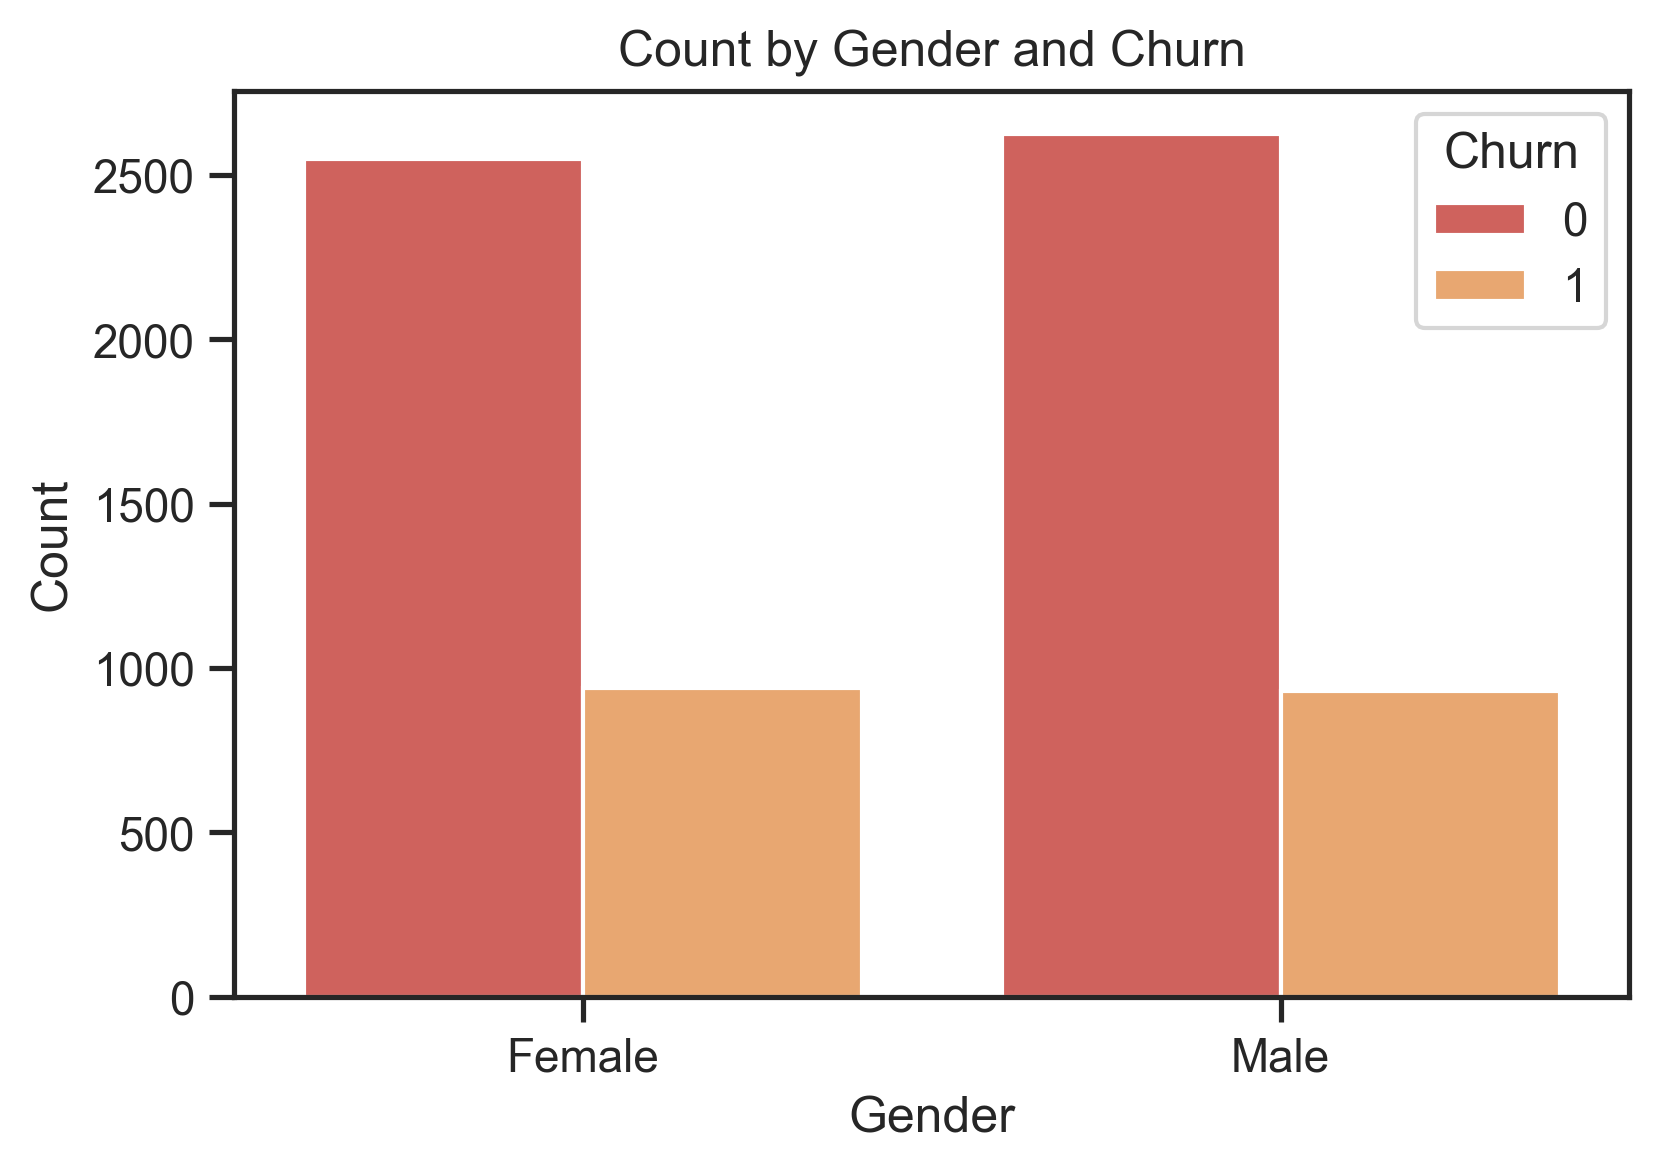

In [168]:
# 단순 개수 + hue로 구분
# eda_count_categorical_target(df, 'gender', 'Churn')
plt.figure(figsize=(6, 4))

sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Count by Gender and Churn')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

   gender  Count  TargetRate  CountPercent  TargetRatePercent
0  Female   3488    0.269209      49.52435          26.920872
1    Male   3555    0.261603      50.47565          26.160338


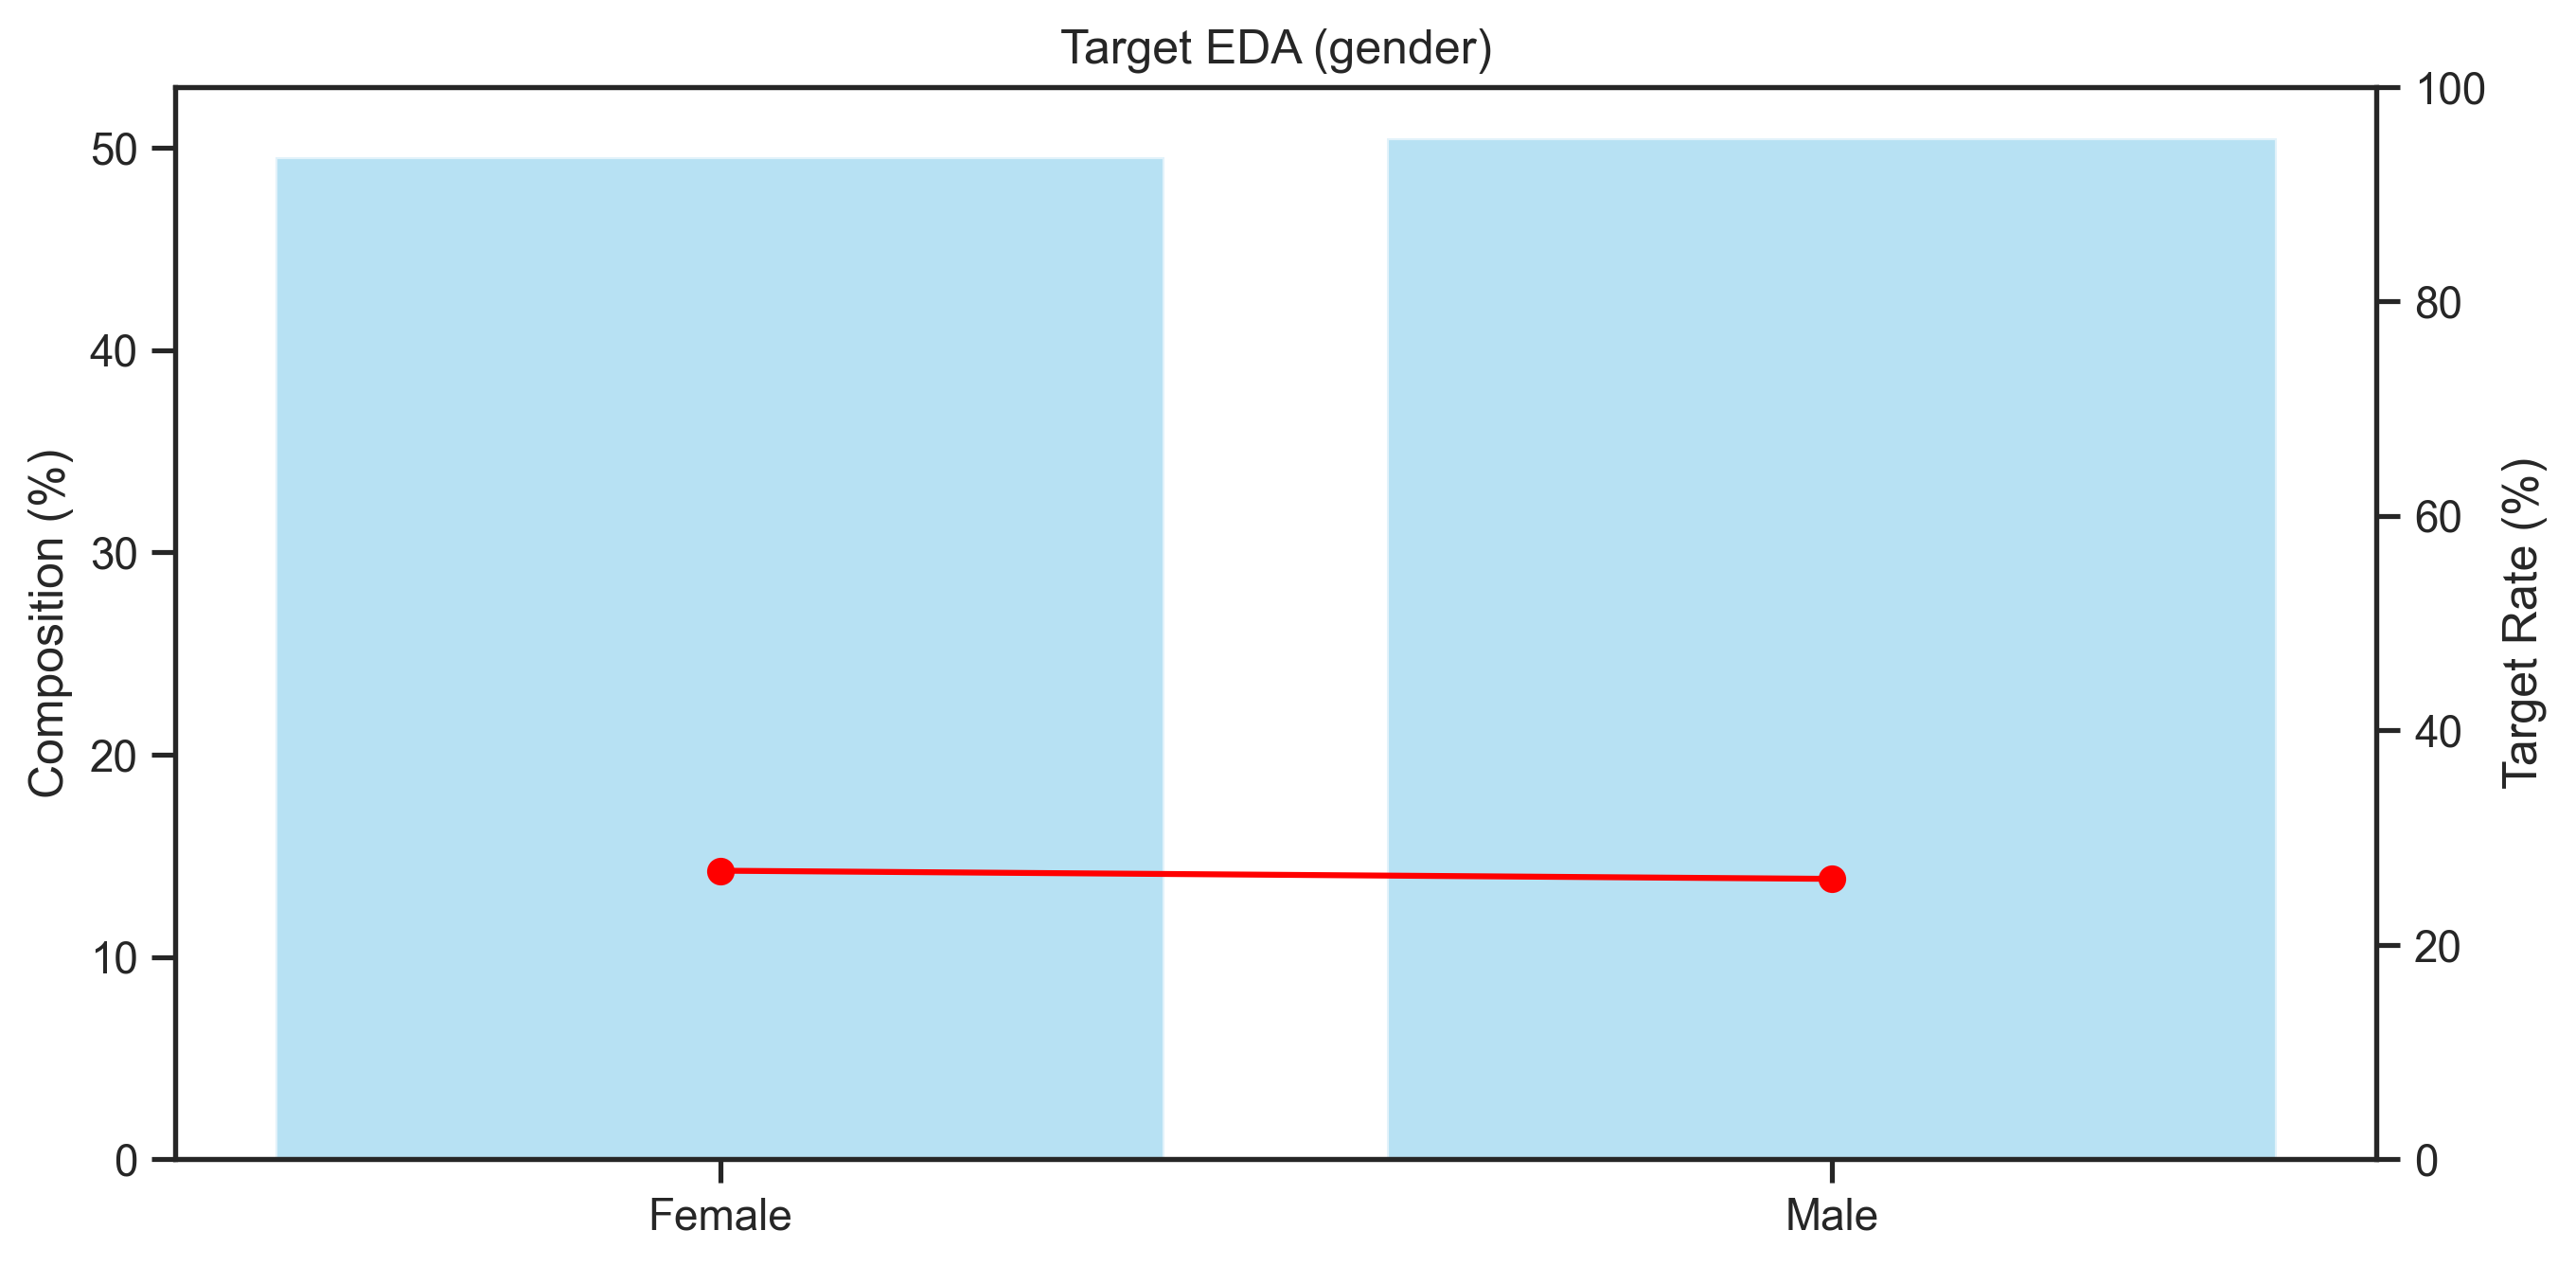

In [169]:
eda_target(df, 'gender', target_col='Churn', bins=10)

## 3.3. Partner에 따른 Churn
- Partner가 없는 사람이 이탈률 32%로 높음

In [170]:
df.groupby('Partner')[['cnt1', 'Churn']].sum()

cnt1  Churn
Partner             
No       3641   1200
Yes      3402    669

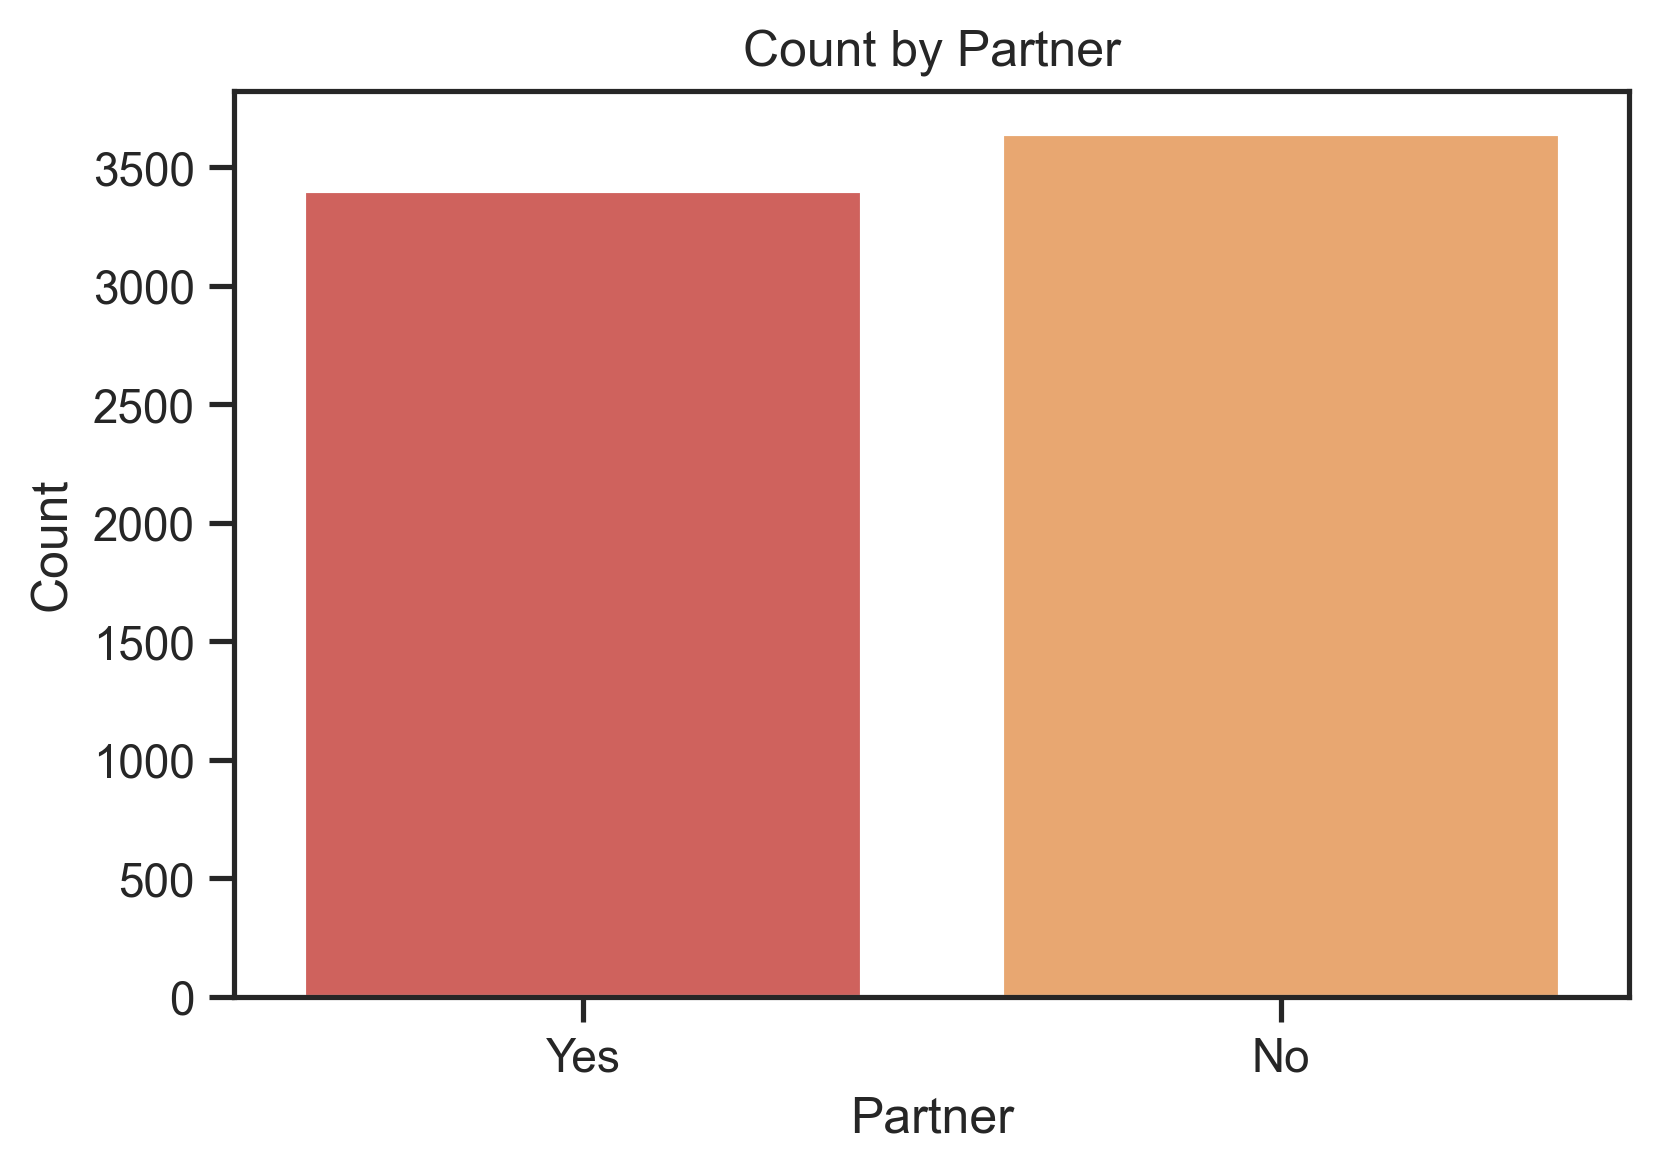

In [171]:
# 단순 개수
eda_count_categorical(df, 'Partner')

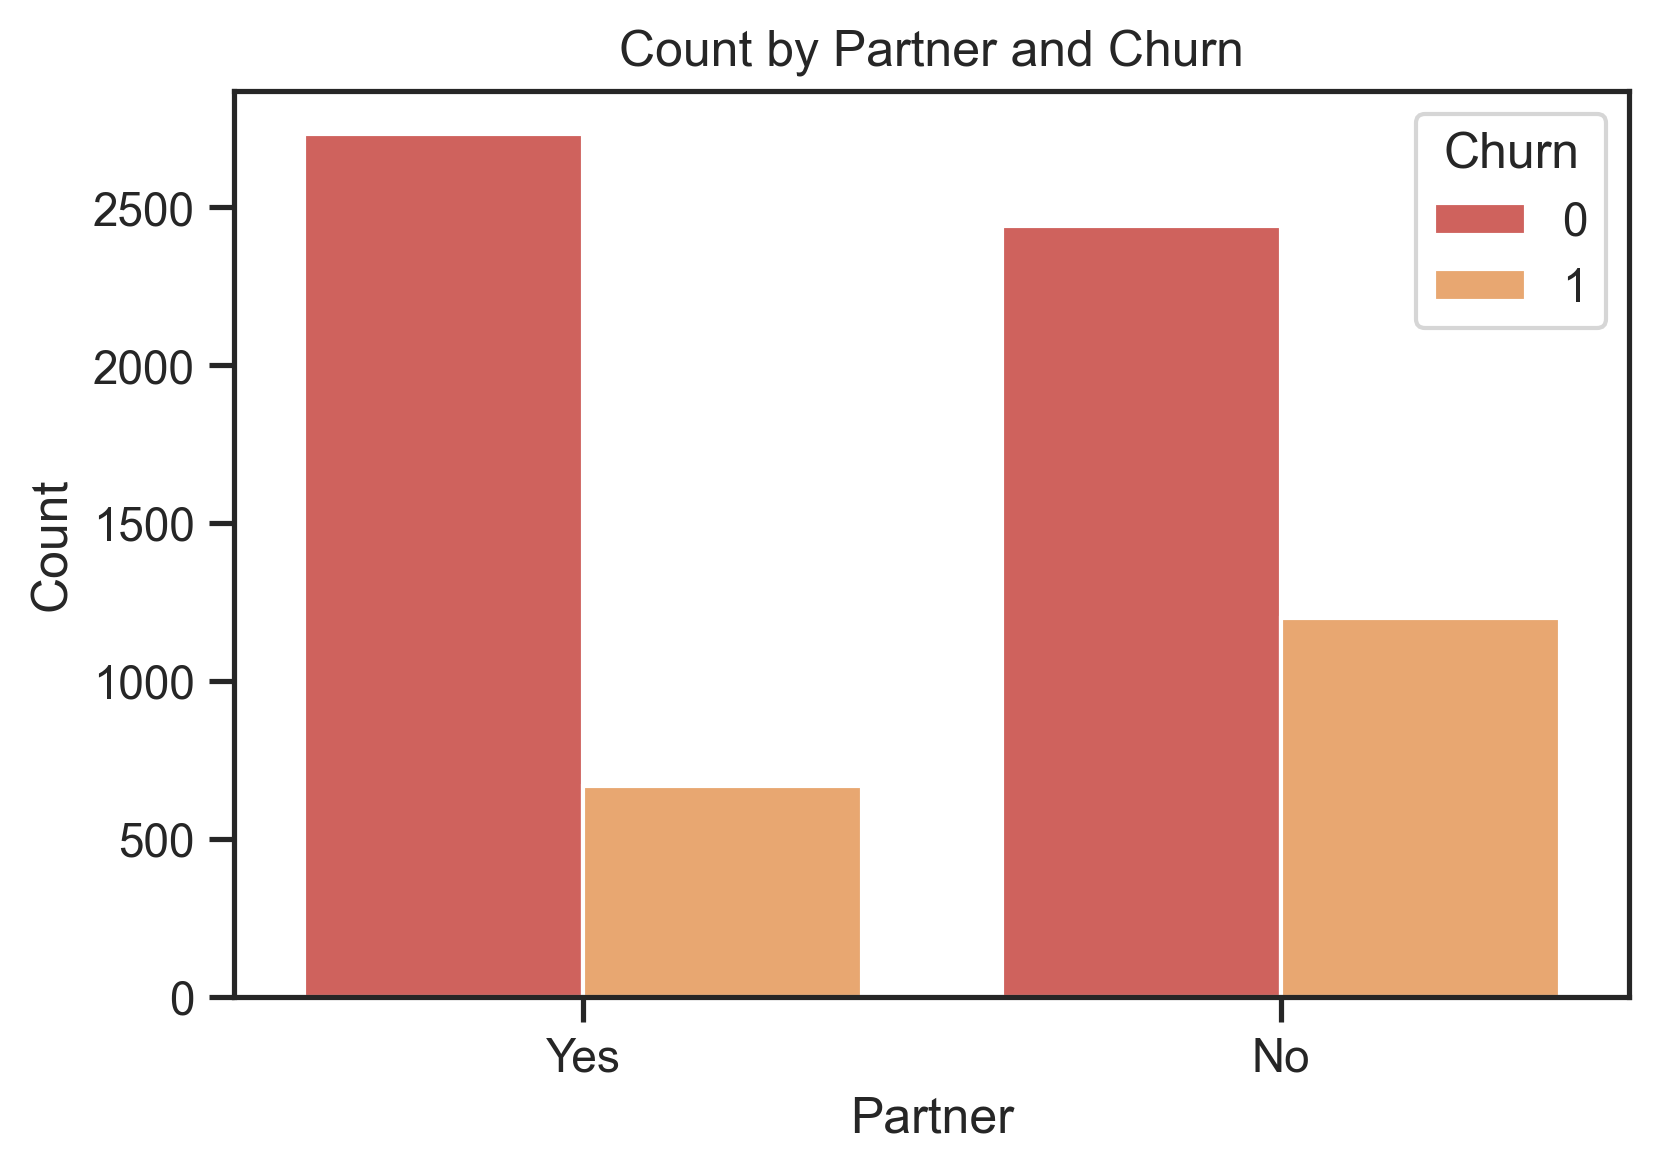

In [172]:
# 단순 개수 + target count(hue)
eda_count_categorical_target(df, 'Partner', 'Churn')

  Partner  Count  TargetRate  CountPercent  TargetRatePercent
0      No   3641    0.329580      51.69672          32.957979
1     Yes   3402    0.196649      48.30328          19.664903


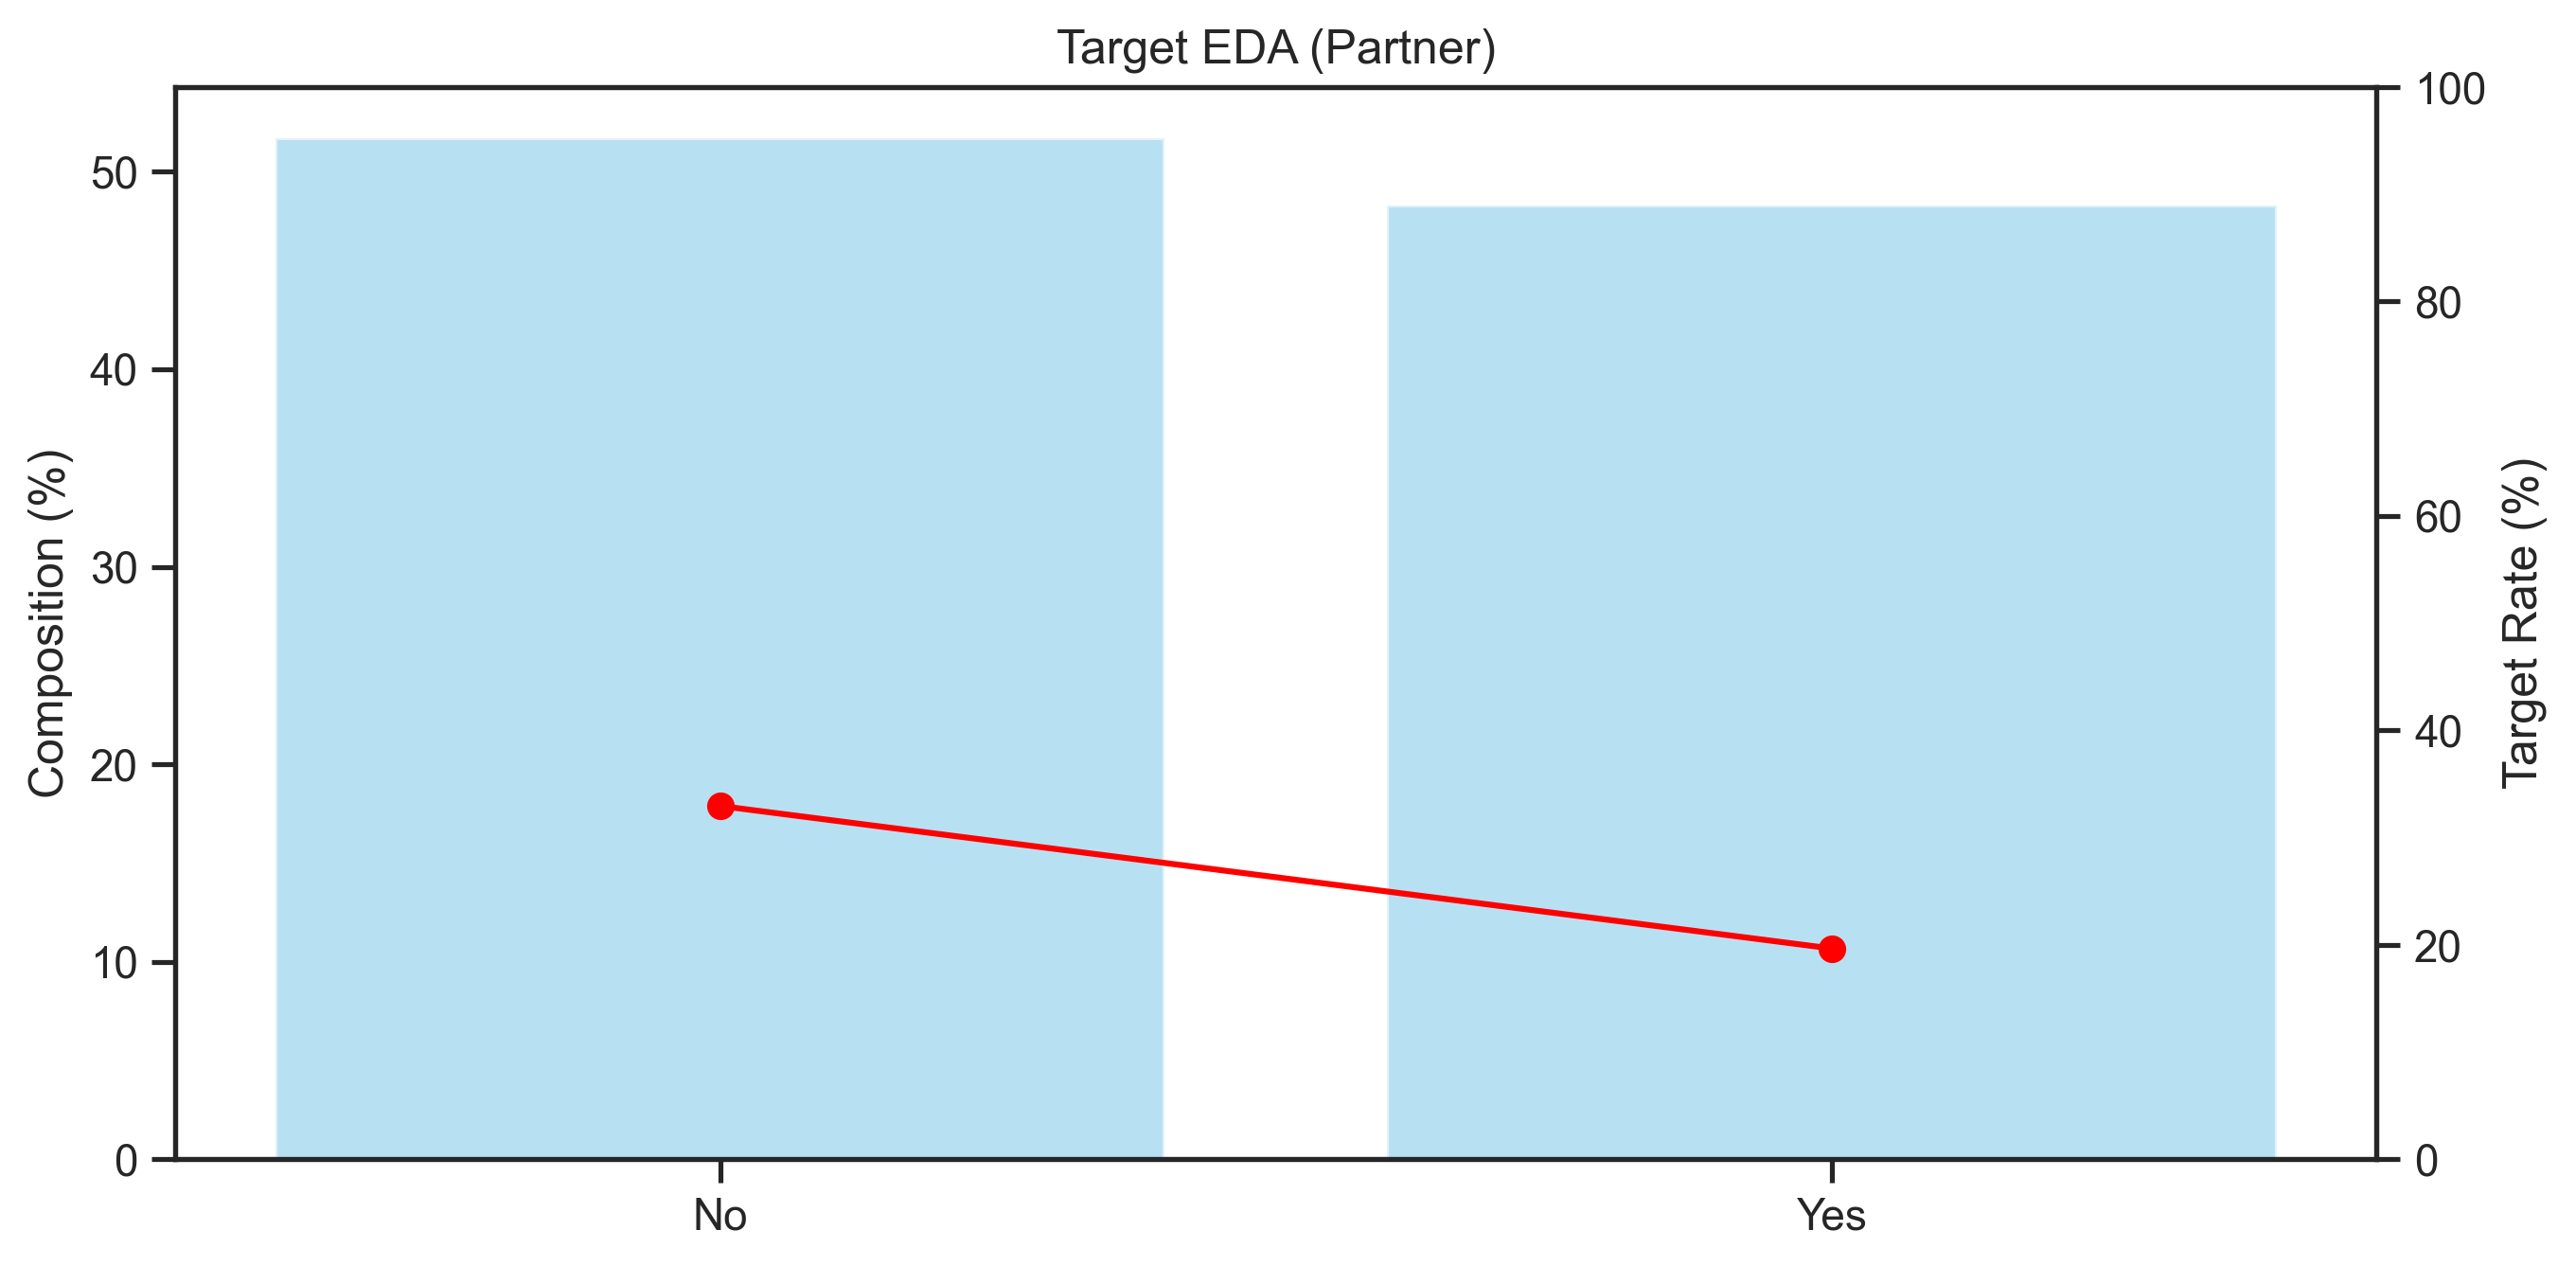

In [173]:
eda_target(df, 'Partner', target_col='Churn', bins=10)

## 3.4. Dependents에 따른 Churn
- 자손 없는 사람이 70%
- 자손 없는 사람의 이탈률 31.3% 수준으로 자손 있는 사람보다 2배 가량 높음

In [174]:
df.groupby('Dependents')[['cnt1', 'Churn']].sum()

cnt1  Churn
Dependents             
No          4933   1543
Yes         2110    326

  Dependents  Count  TargetRate  CountPercent  TargetRatePercent
0         No   4933    0.312791     70.041176          31.279140
1        Yes   2110    0.154502     29.958824          15.450237


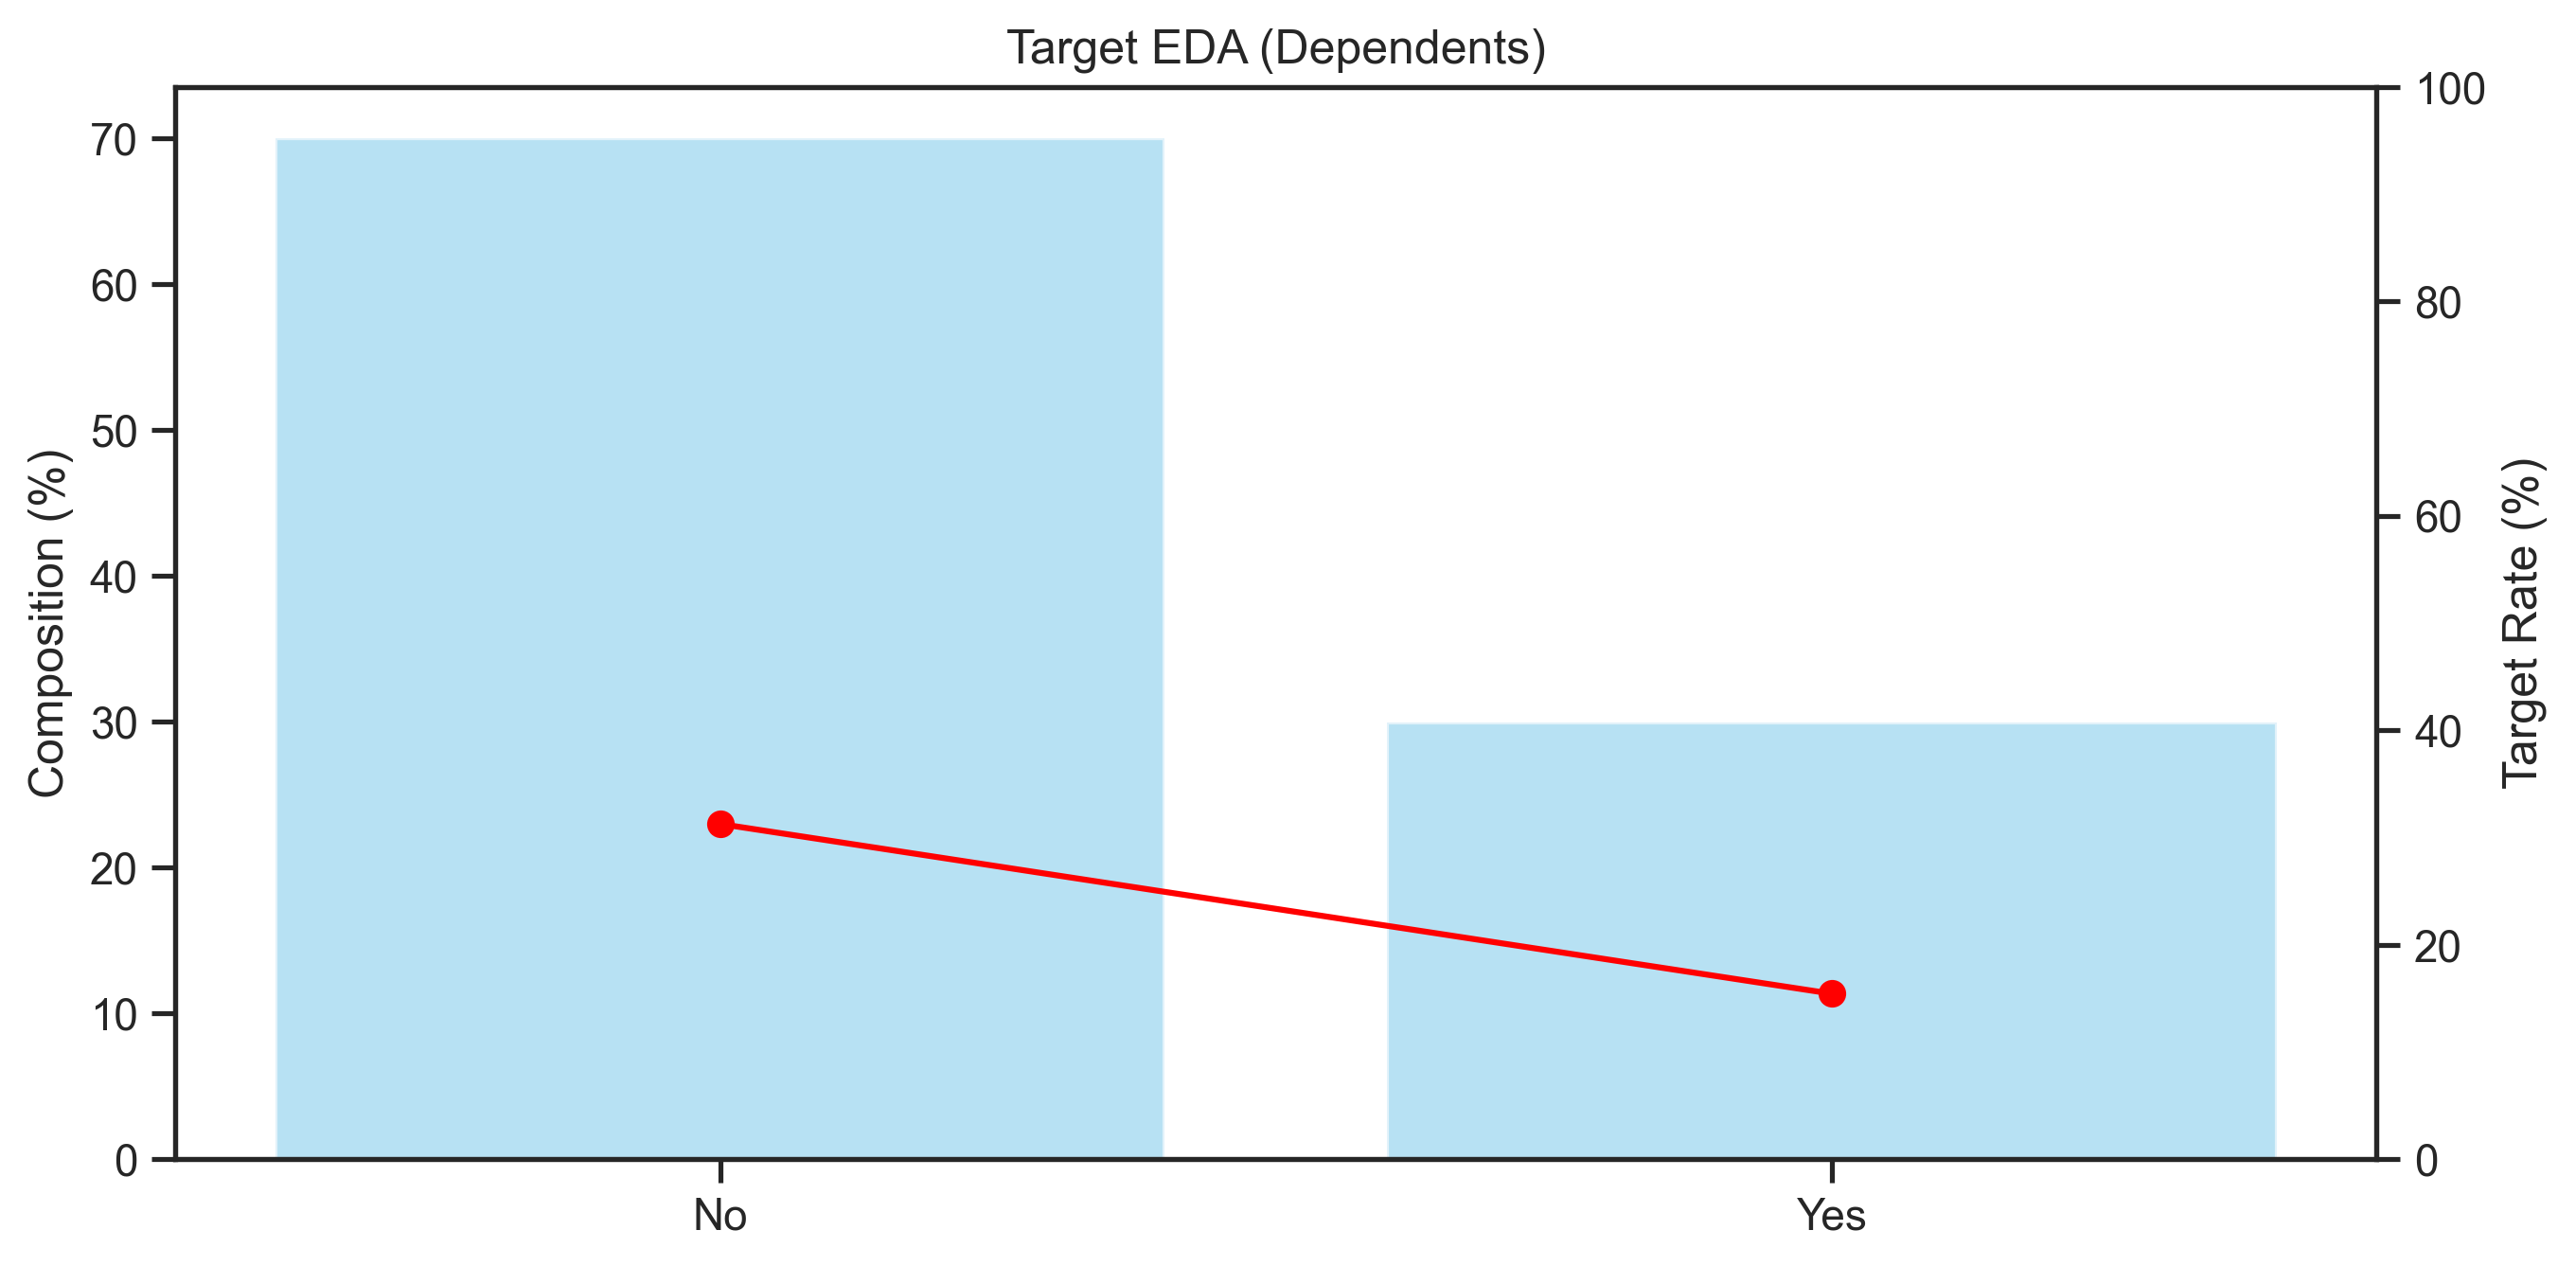

In [175]:
eda_target(df, 'Dependents', target_col='Churn', bins=10)

## 3.5. SeniorCitizen에 따른 Churn
- 시니어는 전체의 16.2%
- 시니어 이탈률 41.7%로 높음

In [176]:
df.groupby('SeniorCitizen')[['cnt1', 'Churn']].sum()

cnt1  Churn
SeniorCitizen             
0              5901   1393
1              1142    476

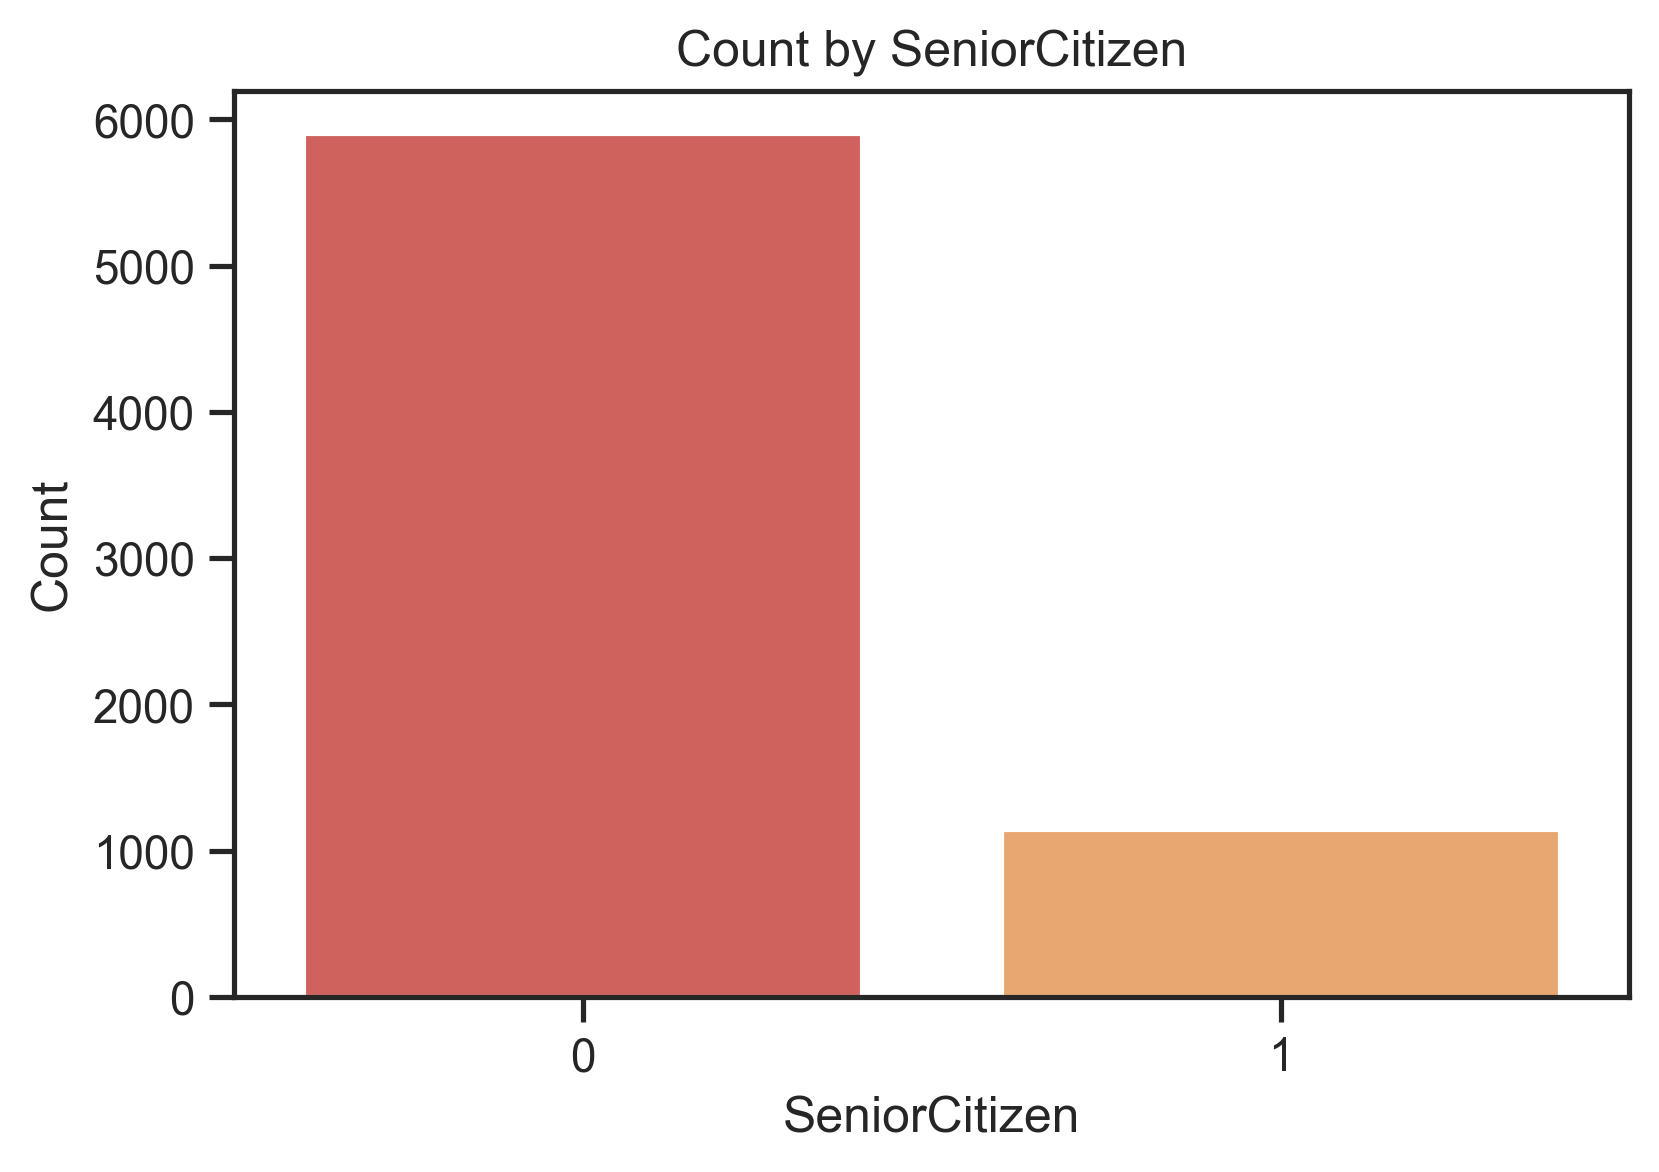

In [177]:
eda_count_categorical(df, 'SeniorCitizen')

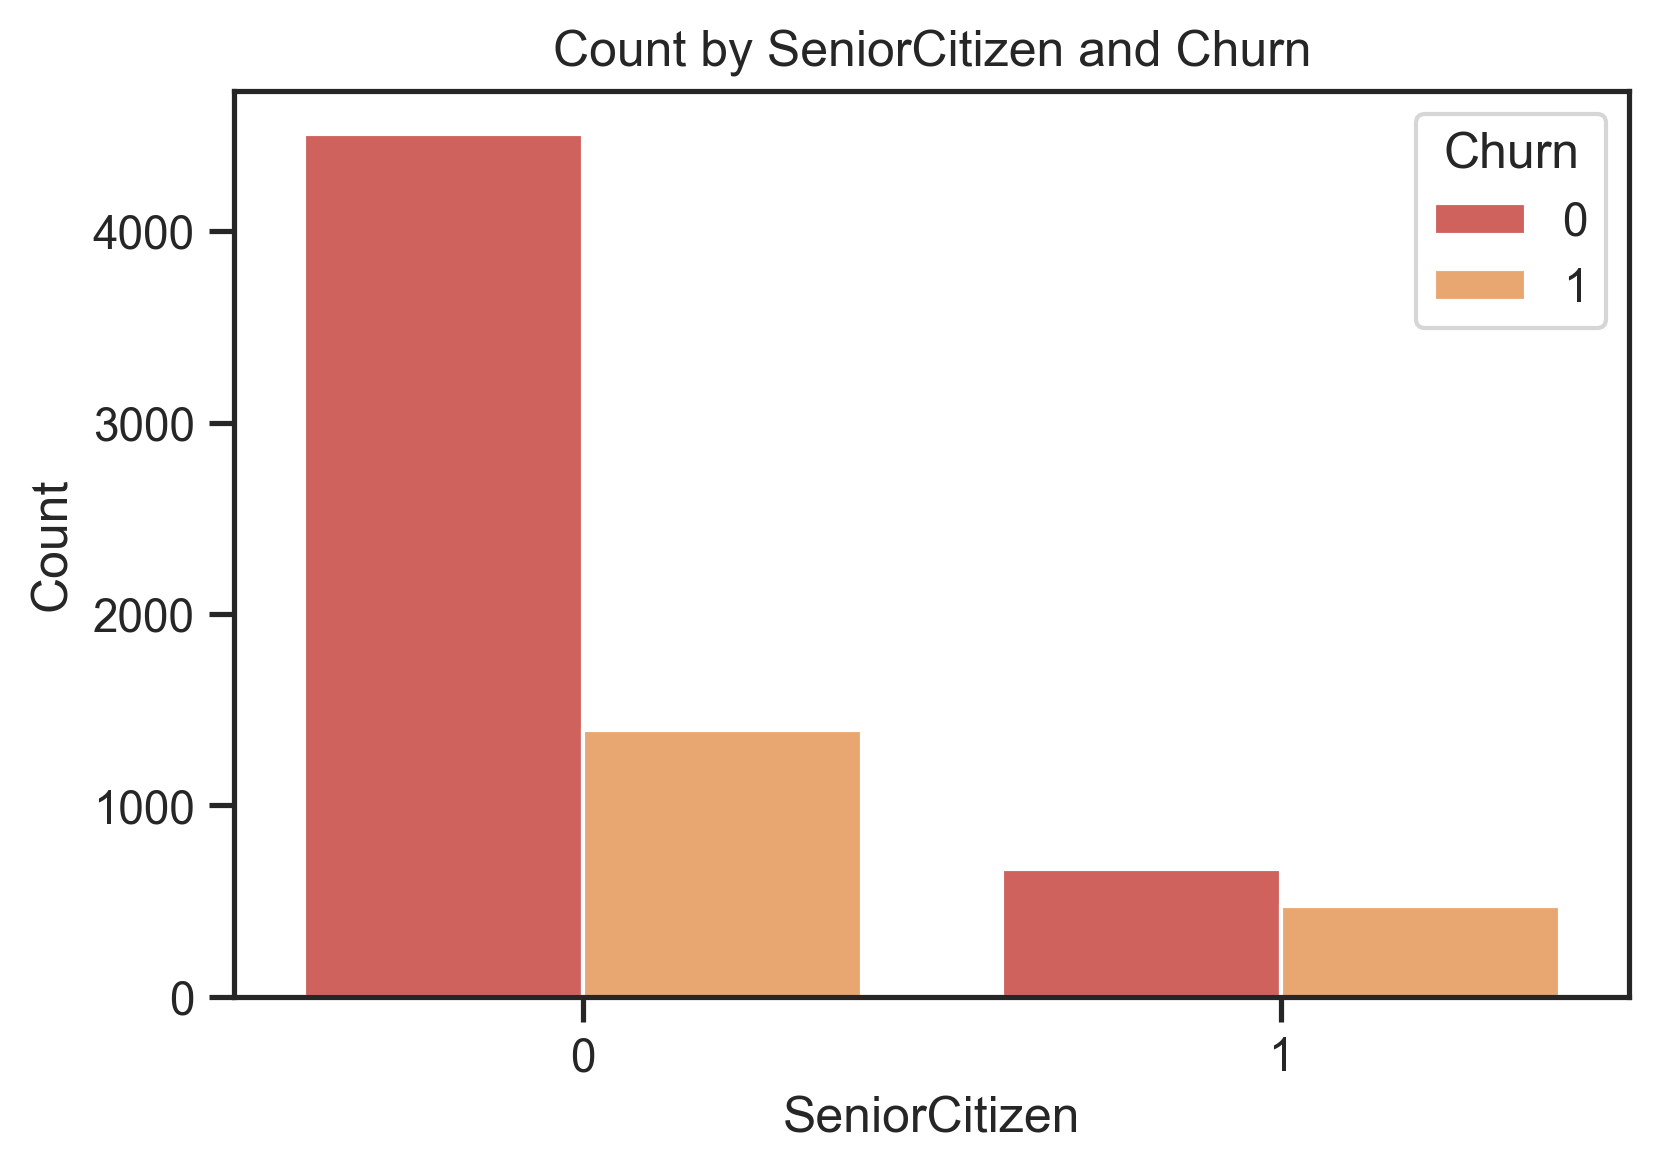

In [178]:
eda_count_categorical_target(df, 'SeniorCitizen', 'Churn')

   SeniorCitizen  Count  TargetRate  CountPercent  TargetRatePercent
0              0   5901    0.236062     83.785319          23.606168
1              1   1142    0.416813     16.214681          41.681261


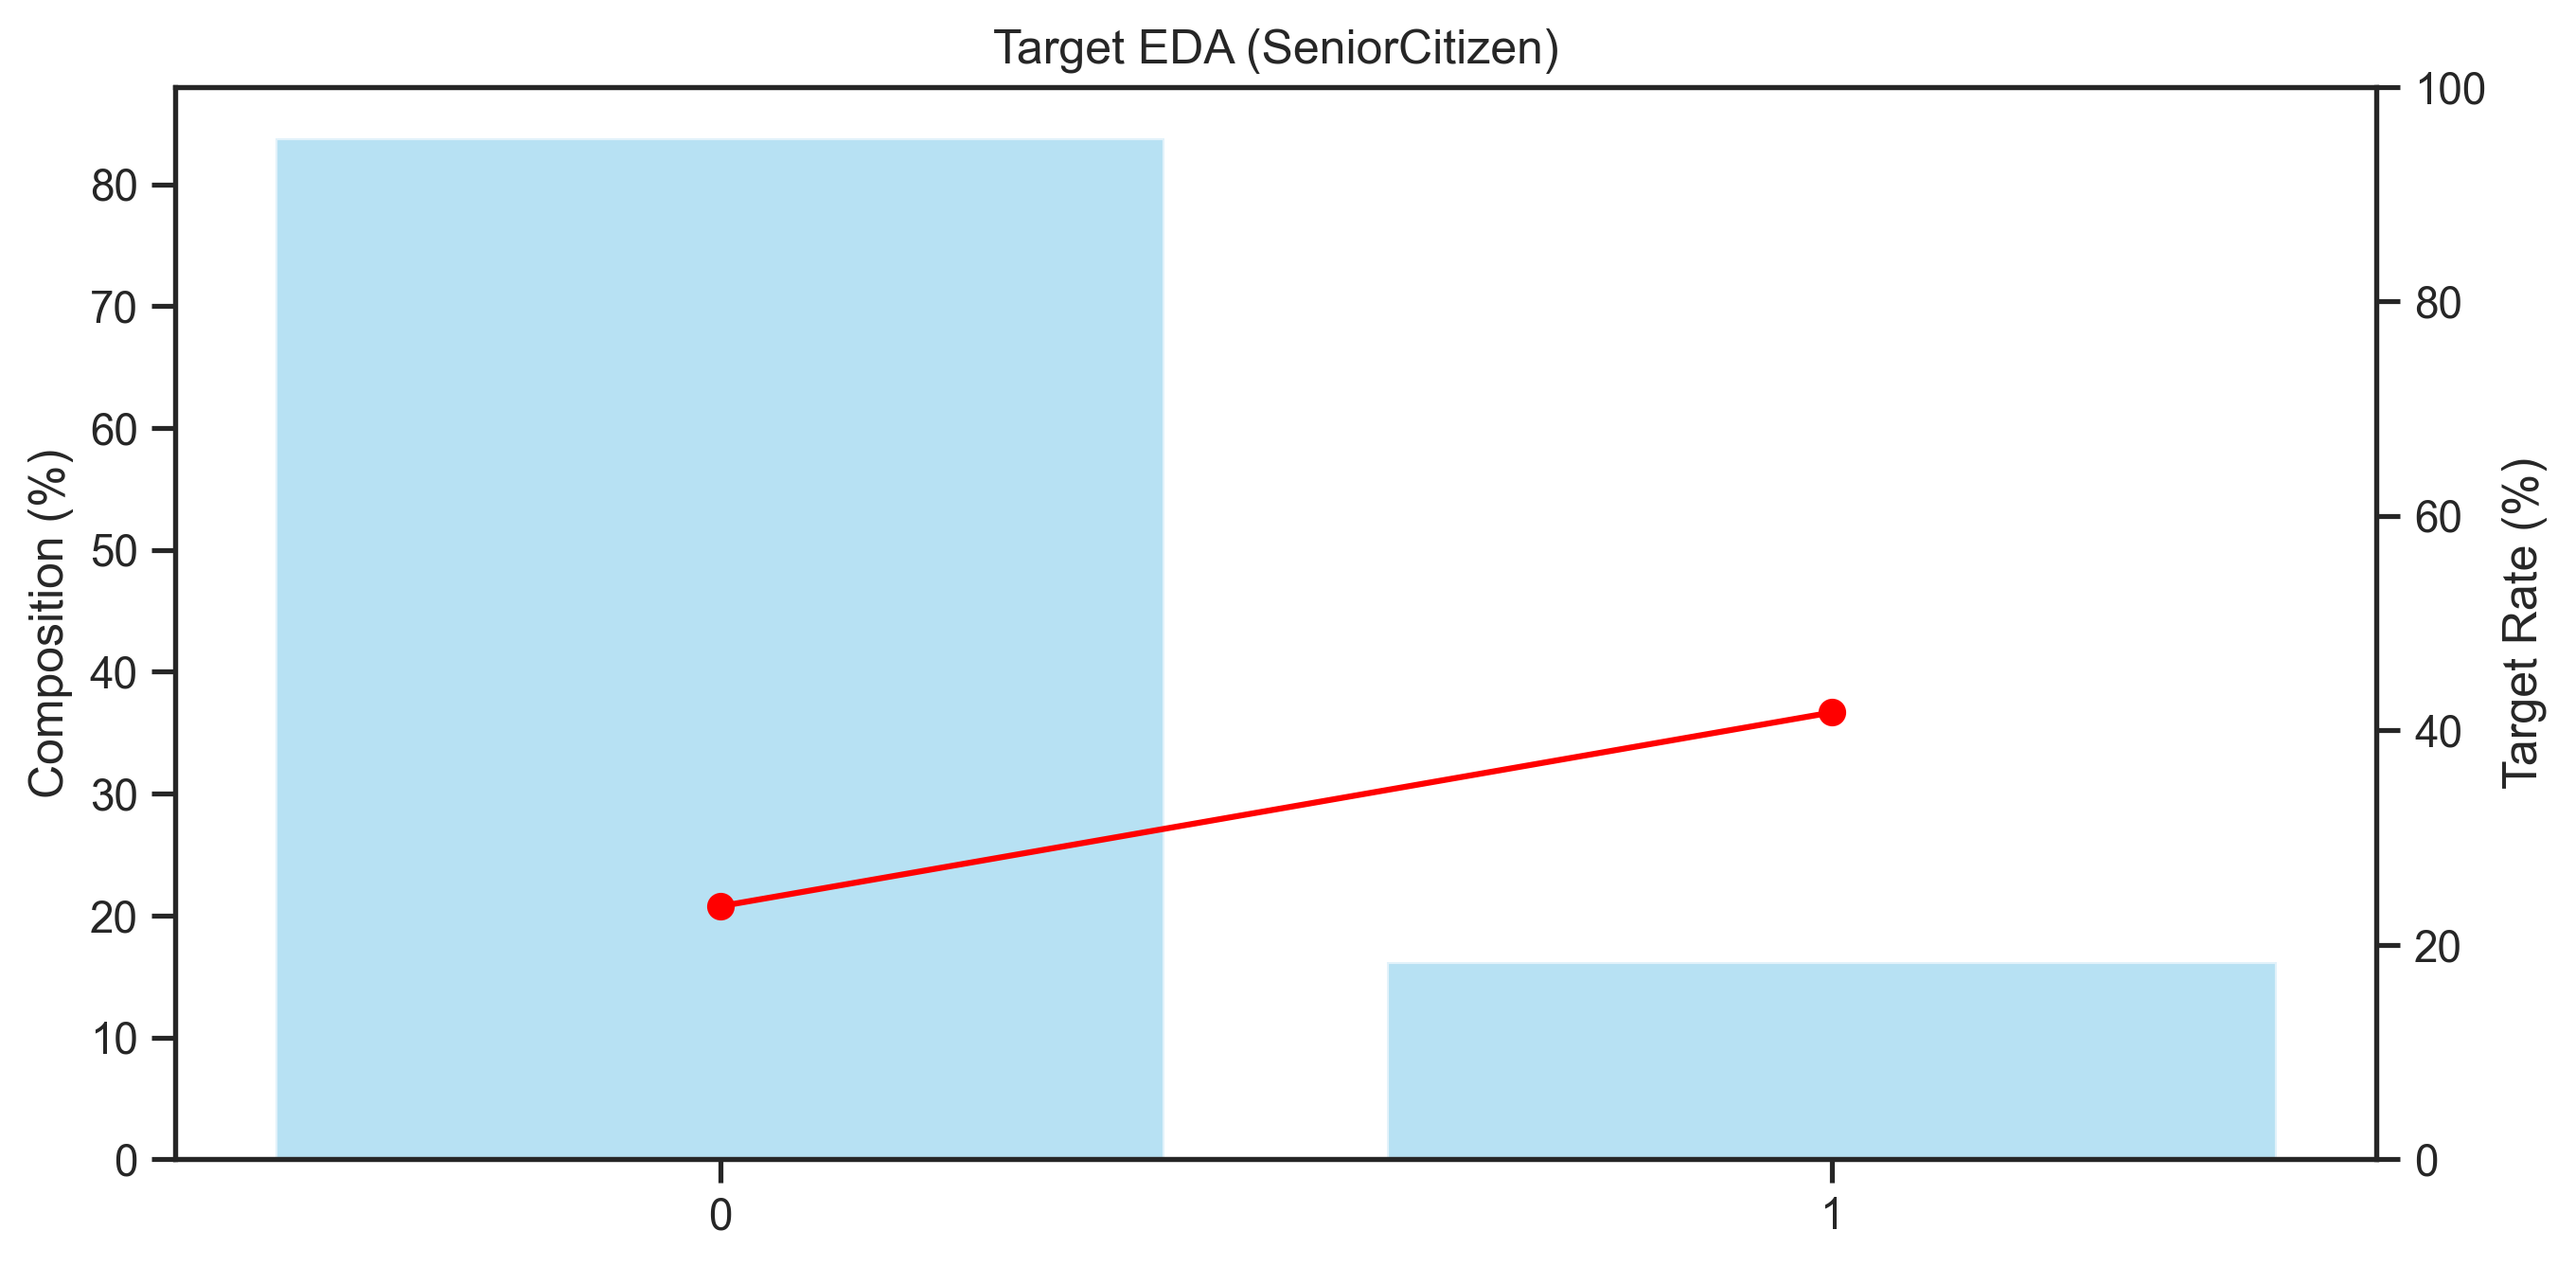

In [179]:
# SeniorCitizen은 int형식이라 is_category=True로 명시해주기!
eda_target(df, 'SeniorCitizen', target_col='Churn', bins=10, is_category=True)

## 3.6. PhoneService에 따른 Churn
- PhoneService 가입자 비중이 전체 중 90%
- PhoneService 가입 유무에 따른 이탈률 차이 없음

In [180]:
df.groupby('PhoneService')[['cnt1', 'Churn']].sum()

cnt1  Churn
PhoneService             
No             682    170
Yes           6361   1699

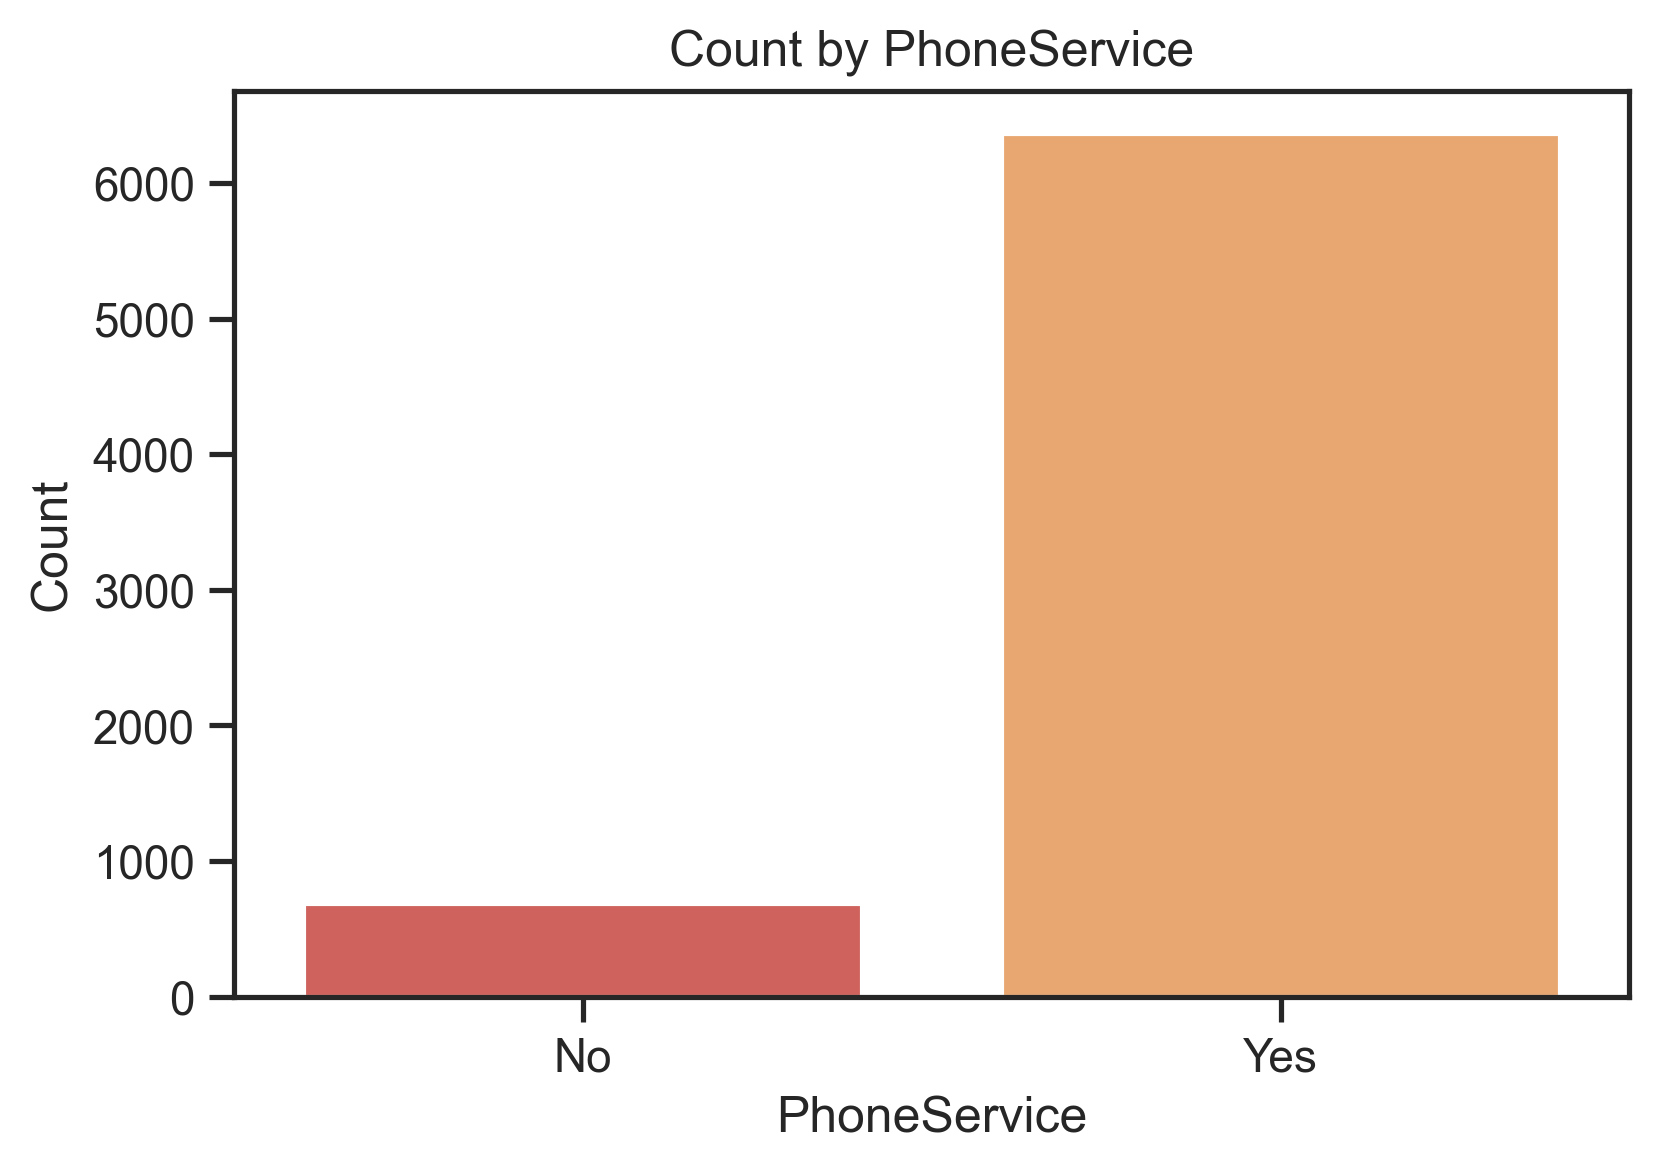

In [181]:
# 단순 개수
eda_count_categorical(df, 'PhoneService')

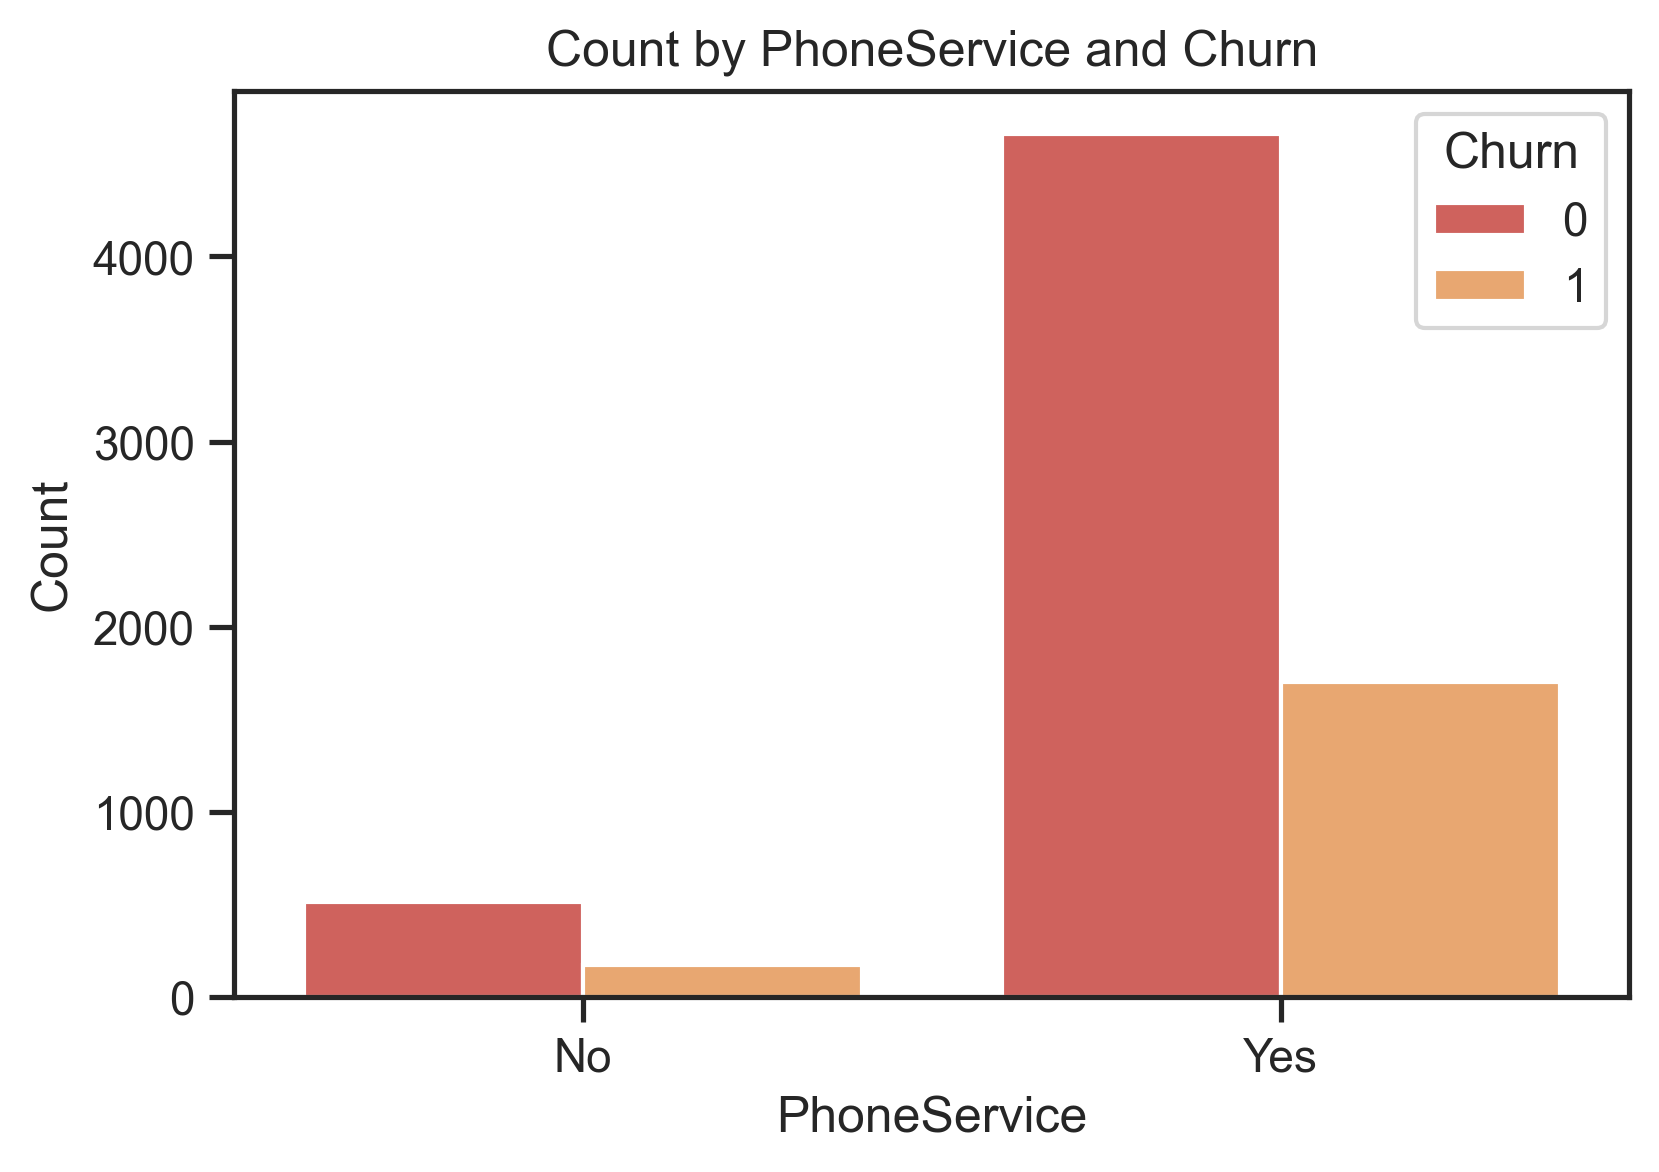

In [182]:
eda_count_categorical_target(df, 'PhoneService', 'Churn')

  PhoneService  Count  TargetRate  CountPercent  TargetRatePercent
0           No    682    0.249267      9.683374          24.926686
1          Yes   6361    0.267096     90.316626          26.709637


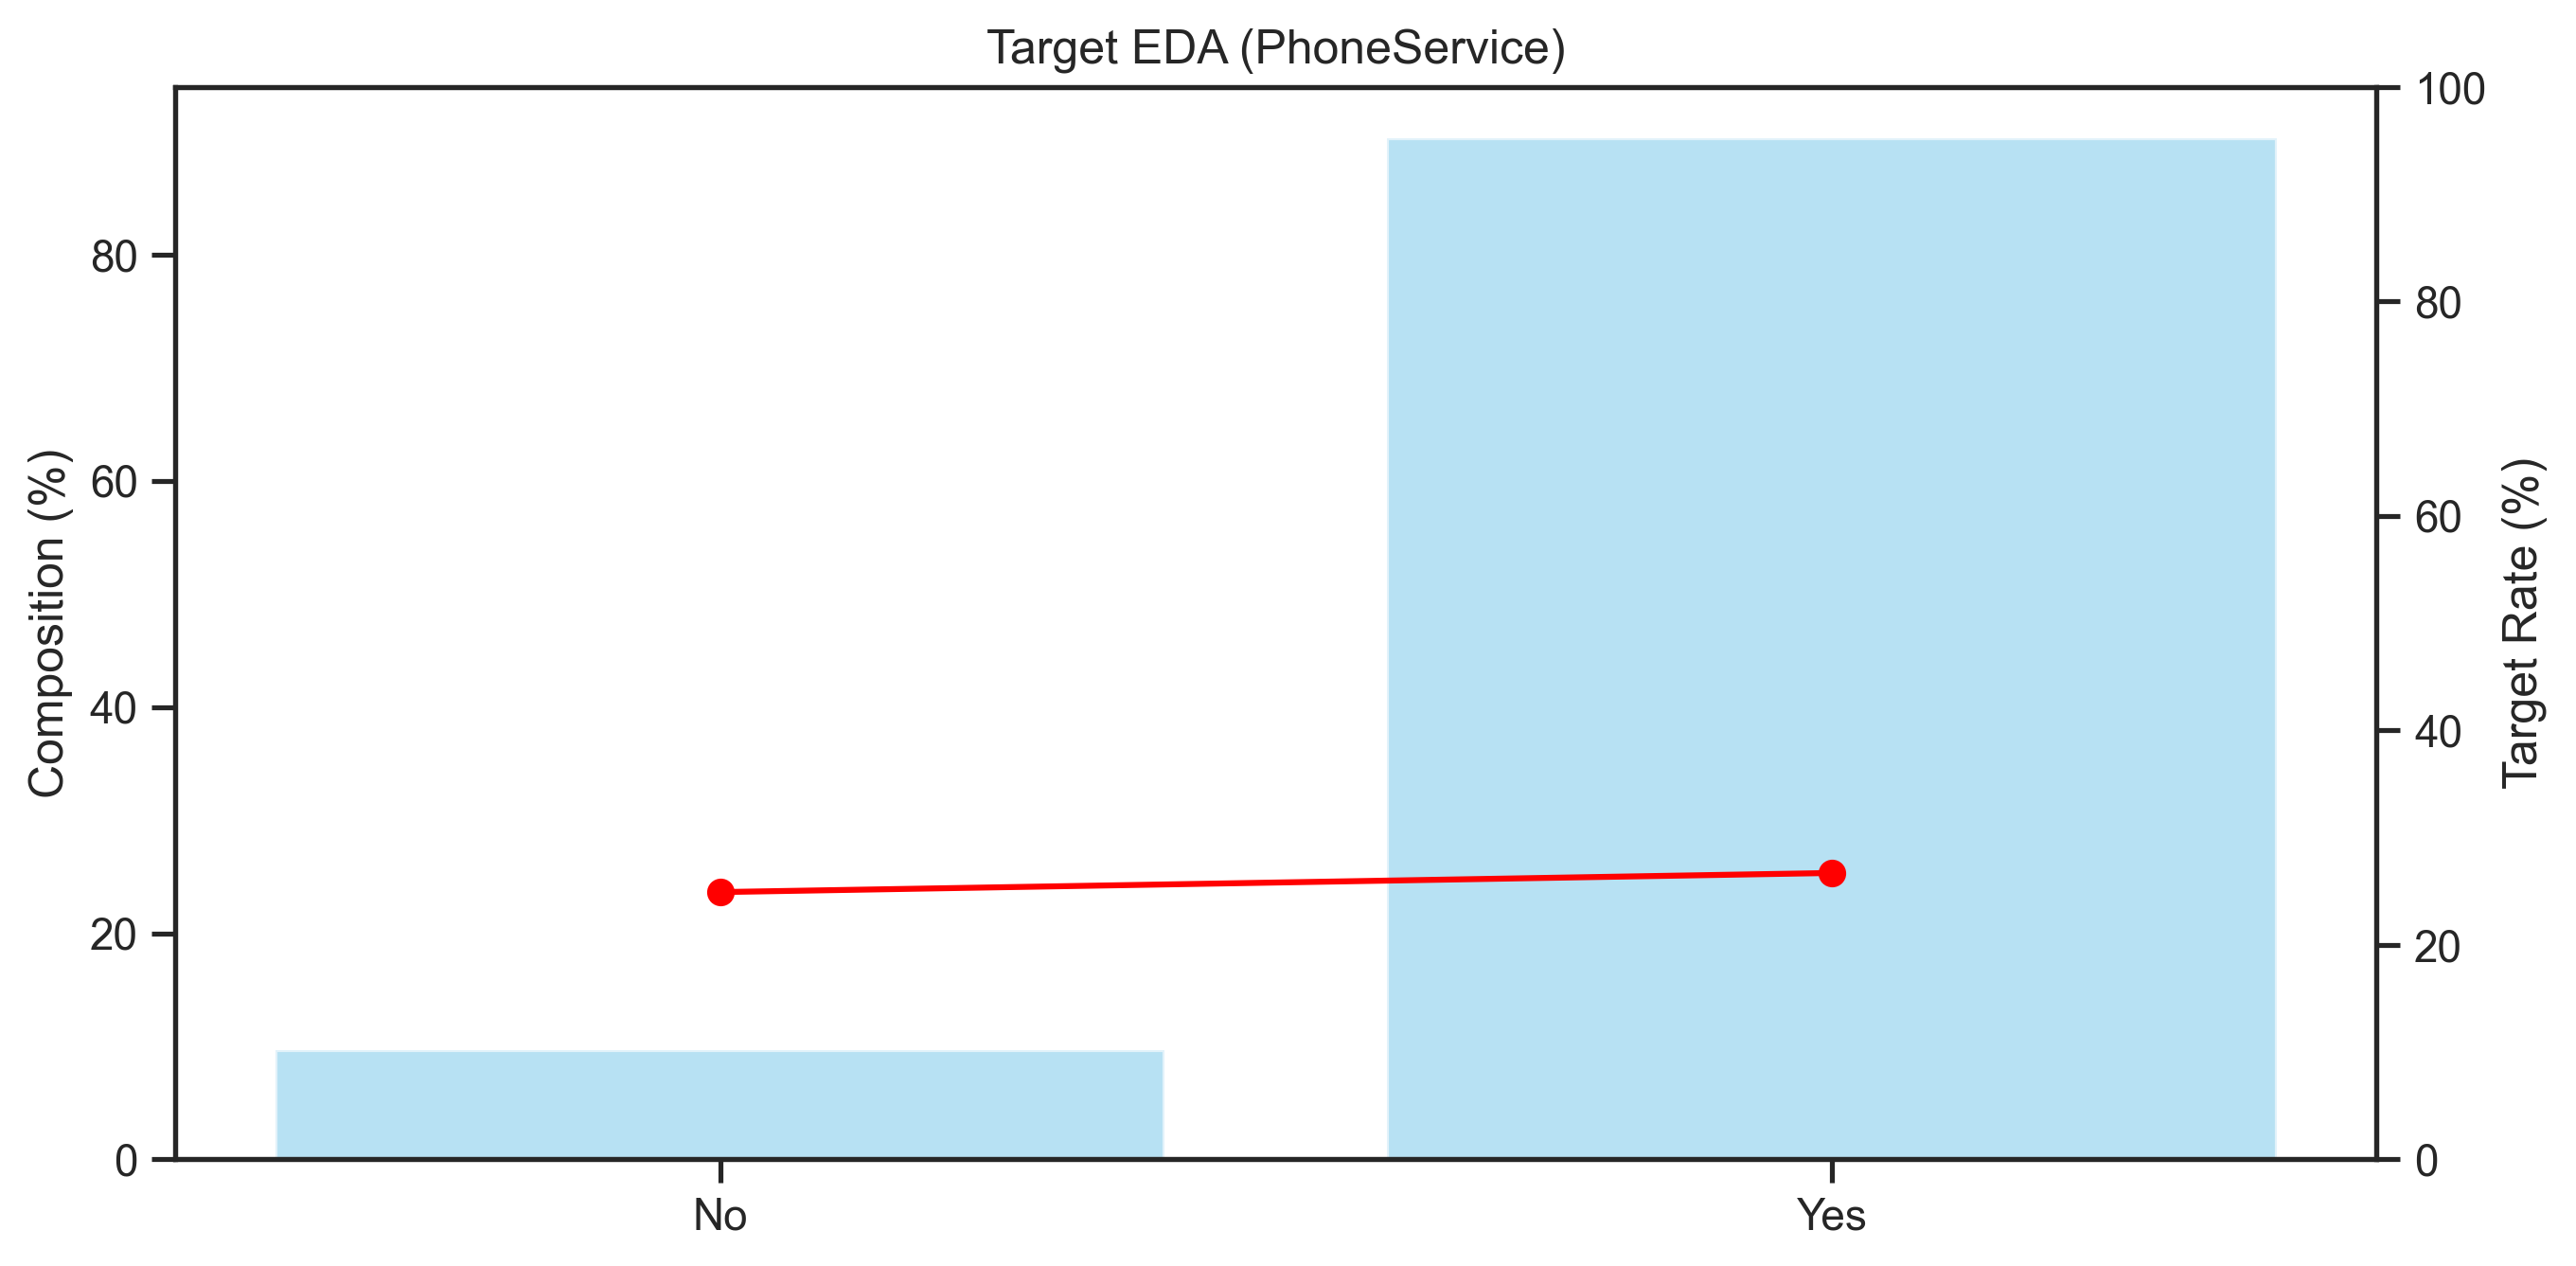

In [183]:
eda_target(df, 'PhoneService', target_col='Churn', bins=10)

## 3.7. MultipleLines에 따른 Churn
- 다중회선 가입자의 이탈률은 28.6%로 단일회선 가입자 대비 이탈률 다소 높음
- 단일회선 가입자 이탈률: 25% 수준

In [184]:
df.groupby('MultipleLines')[['cnt1', 'Churn']].sum()

cnt1  Churn
MultipleLines                
No                3390    849
No phone service   682    170
Yes               2971    850

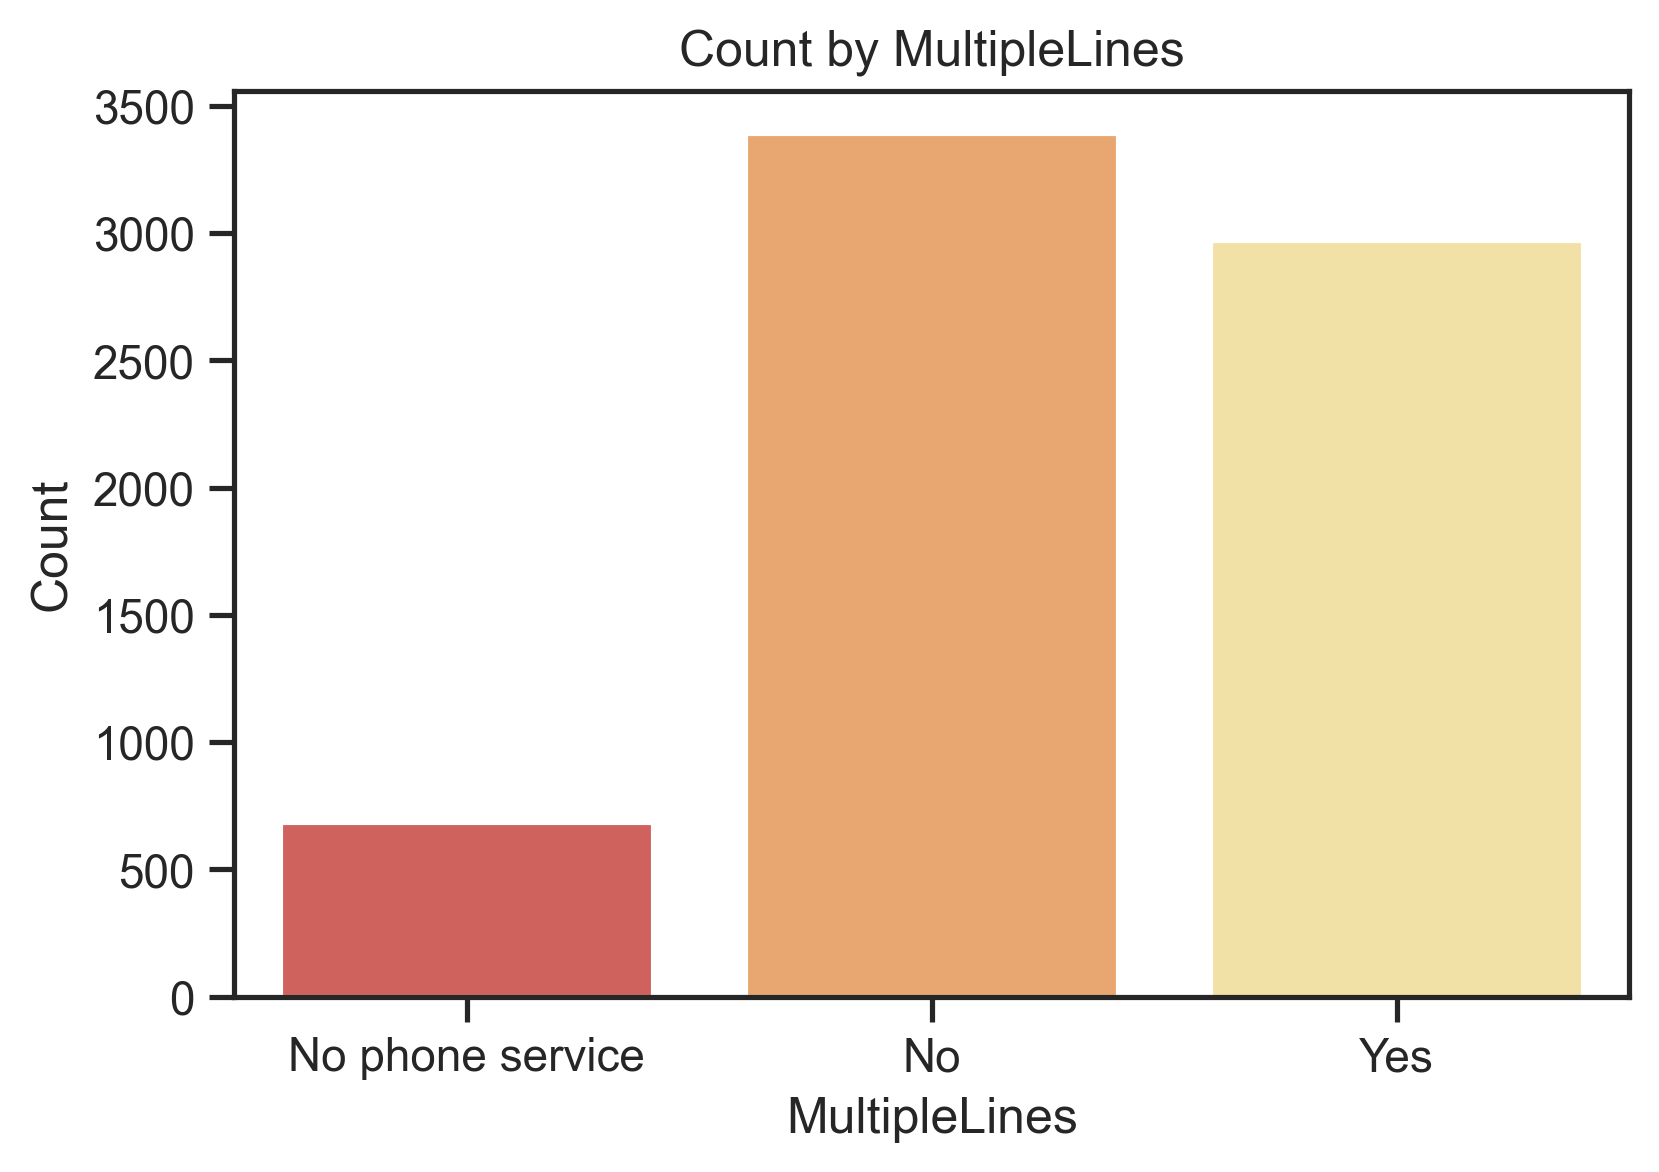

In [185]:
# 단순 개수
eda_count_categorical(df, 'MultipleLines')

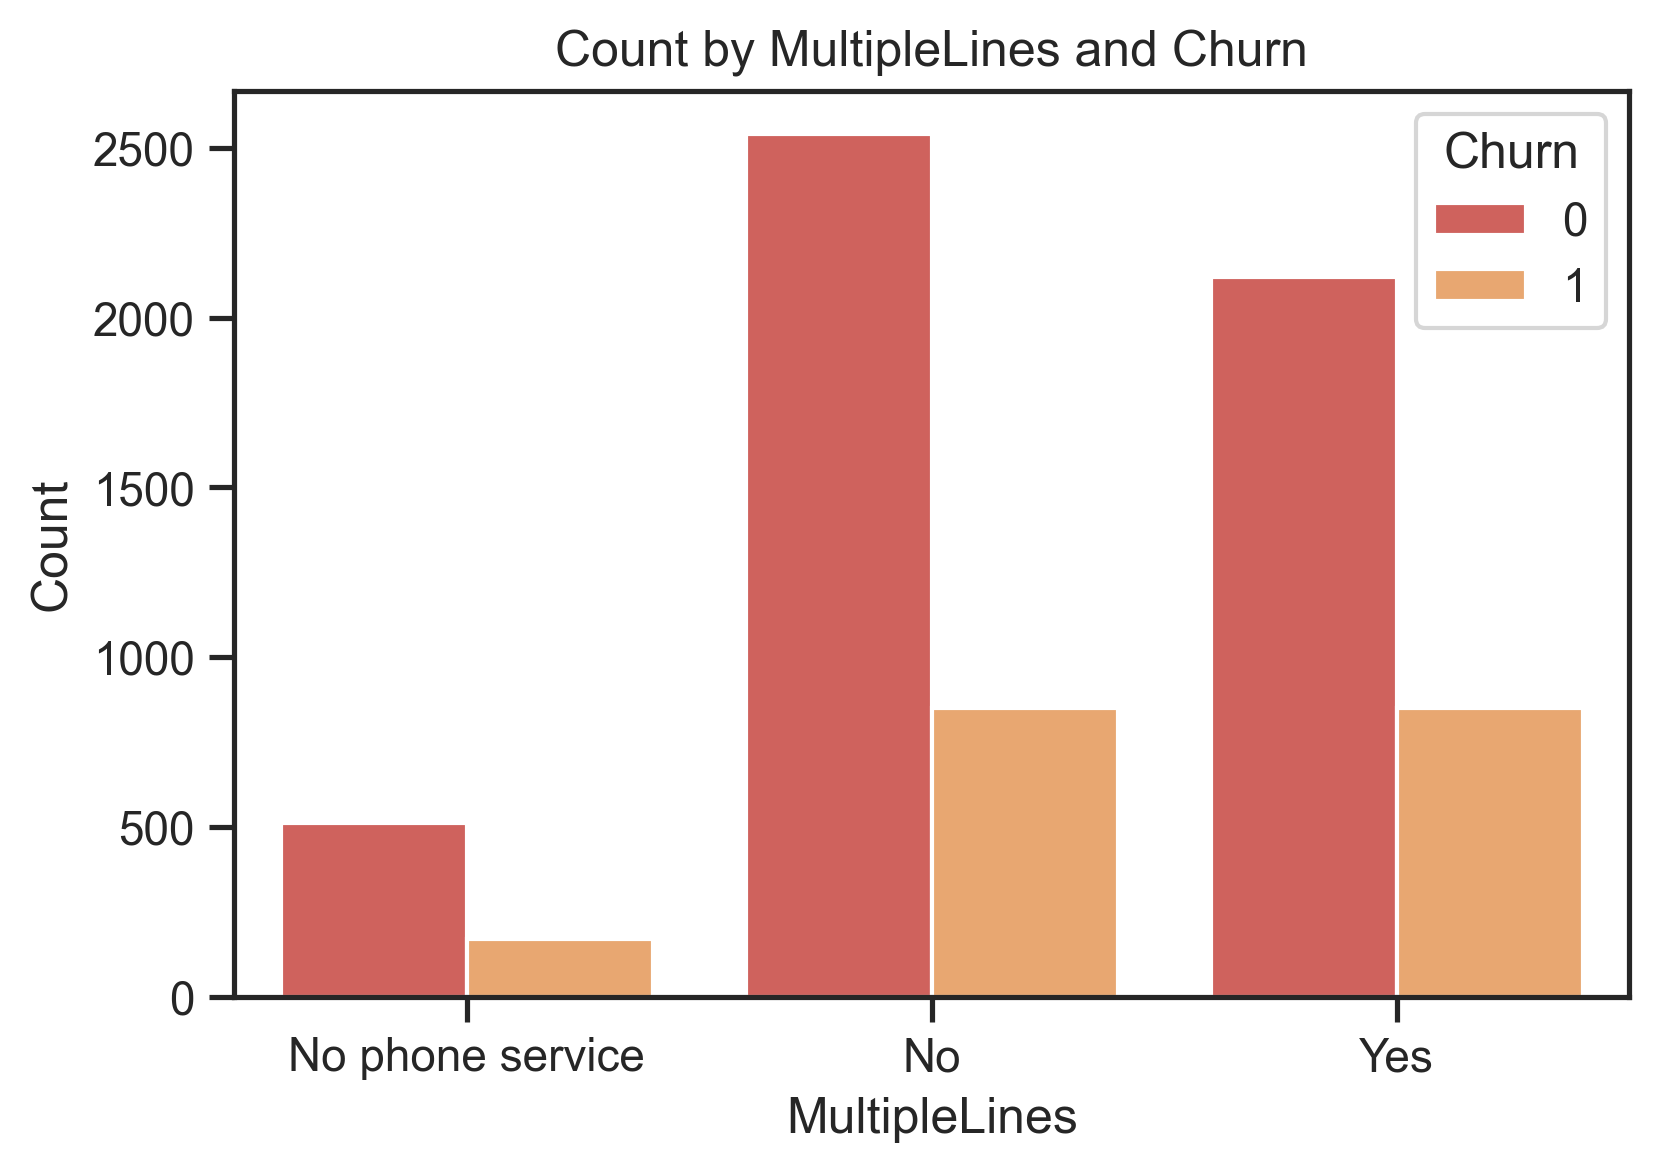

In [186]:
eda_count_categorical_target(df, 'MultipleLines', 'Churn')

      MultipleLines  Count  TargetRate  CountPercent  TargetRatePercent
0                No   3390    0.250442     48.132898          25.044248
1  No phone service    682    0.249267      9.683374          24.926686
2               Yes   2971    0.286099     42.183729          28.609896


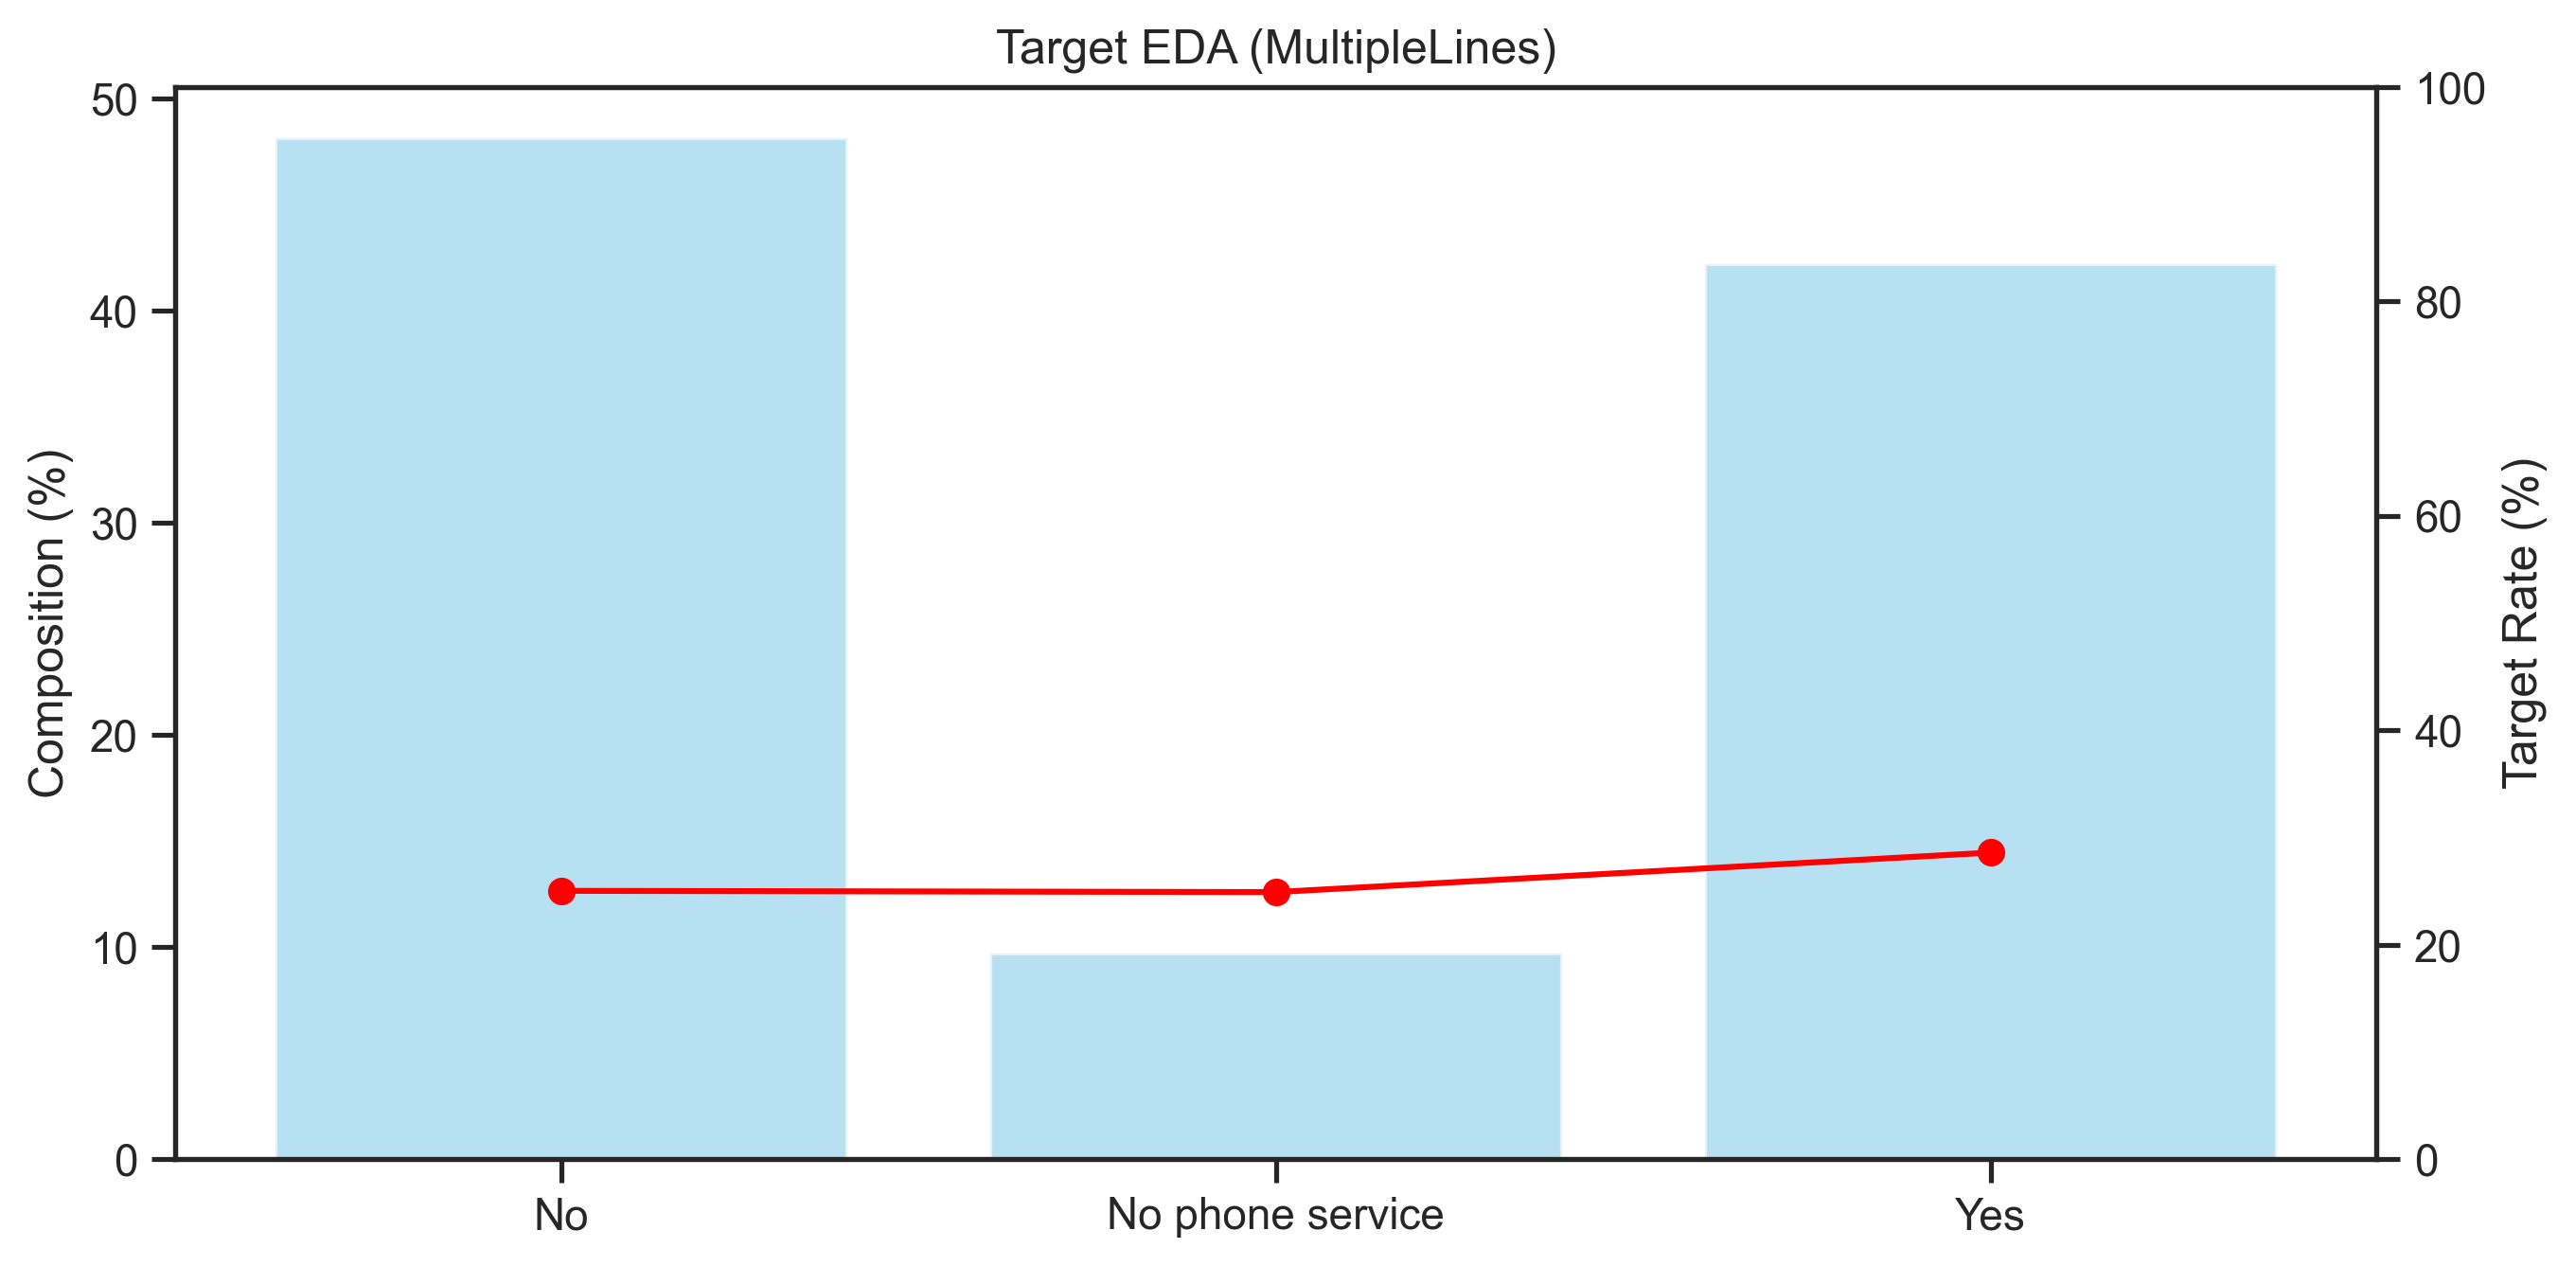

In [187]:
eda_target(df, 'MultipleLines', target_col='Churn', bins=10)

## 3.8. InternetService에 따른 Churn
- Fiber optic은 전체 약 44%비율을 차지하고, 이탈률도 41.9%로 가장 높음

In [188]:
df.groupby('InternetService')[['cnt1', 'Churn']].sum()

cnt1  Churn
InternetService             
DSL              2421    459
Fiber optic      3096   1297
No               1526    113

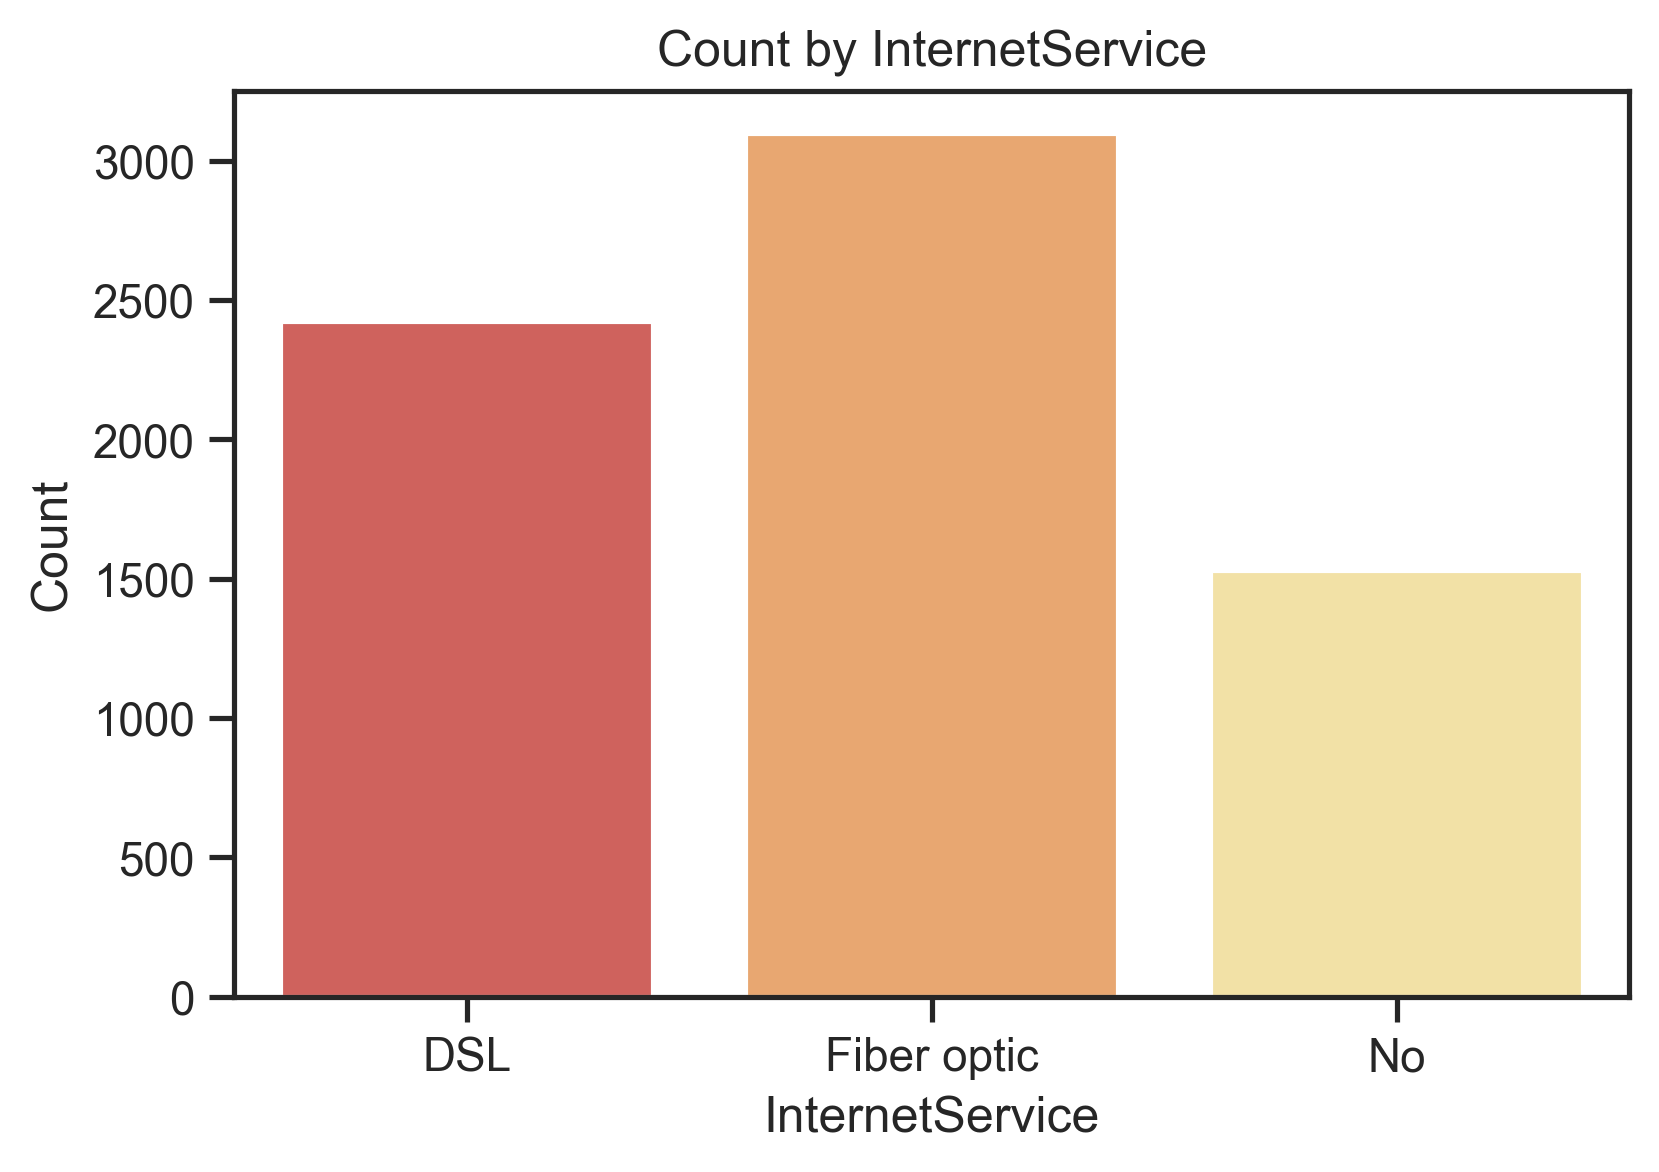

In [189]:
# 단순 개수
eda_count_categorical(df, 'InternetService')

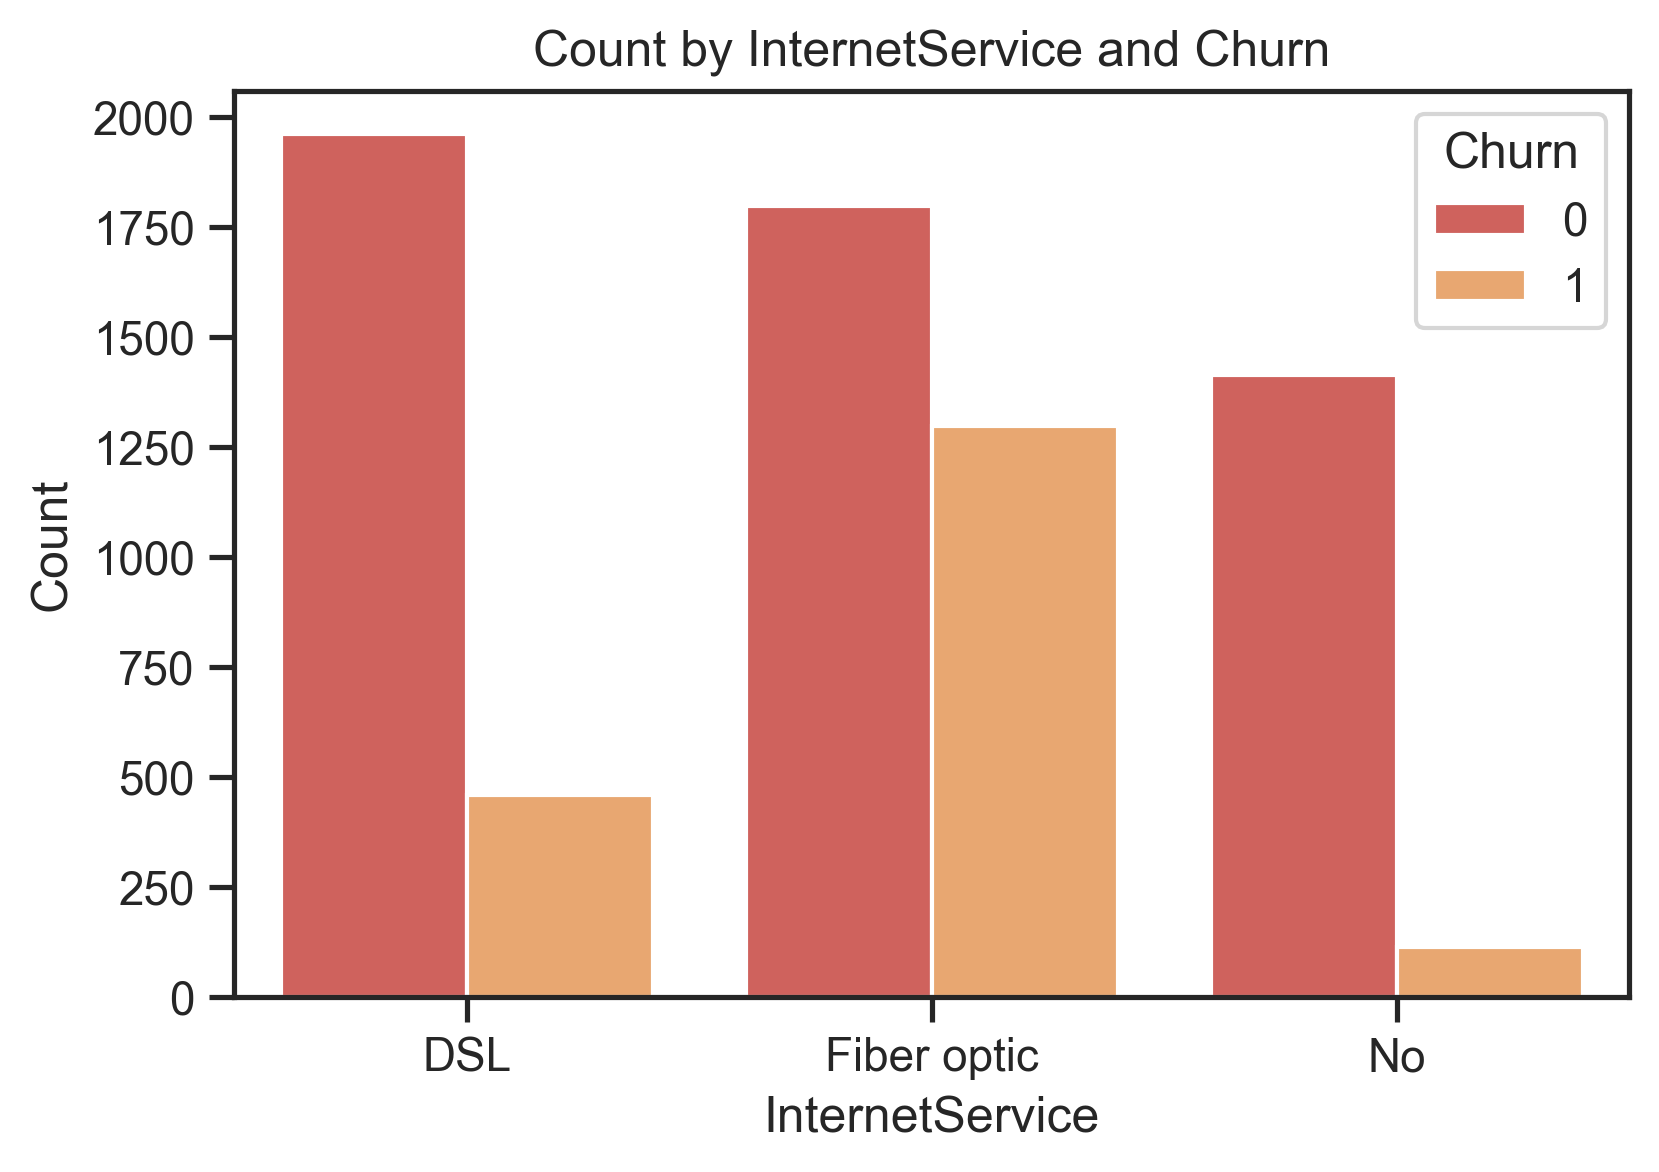

In [190]:
eda_count_categorical_target(df, 'InternetService', 'Churn')

  InternetService  Count  TargetRate  CountPercent  TargetRatePercent
0             DSL   2421    0.189591     34.374556          18.959108
1     Fiber optic   3096    0.418928     43.958540          41.892765
2              No   1526    0.074050     21.666903           7.404980


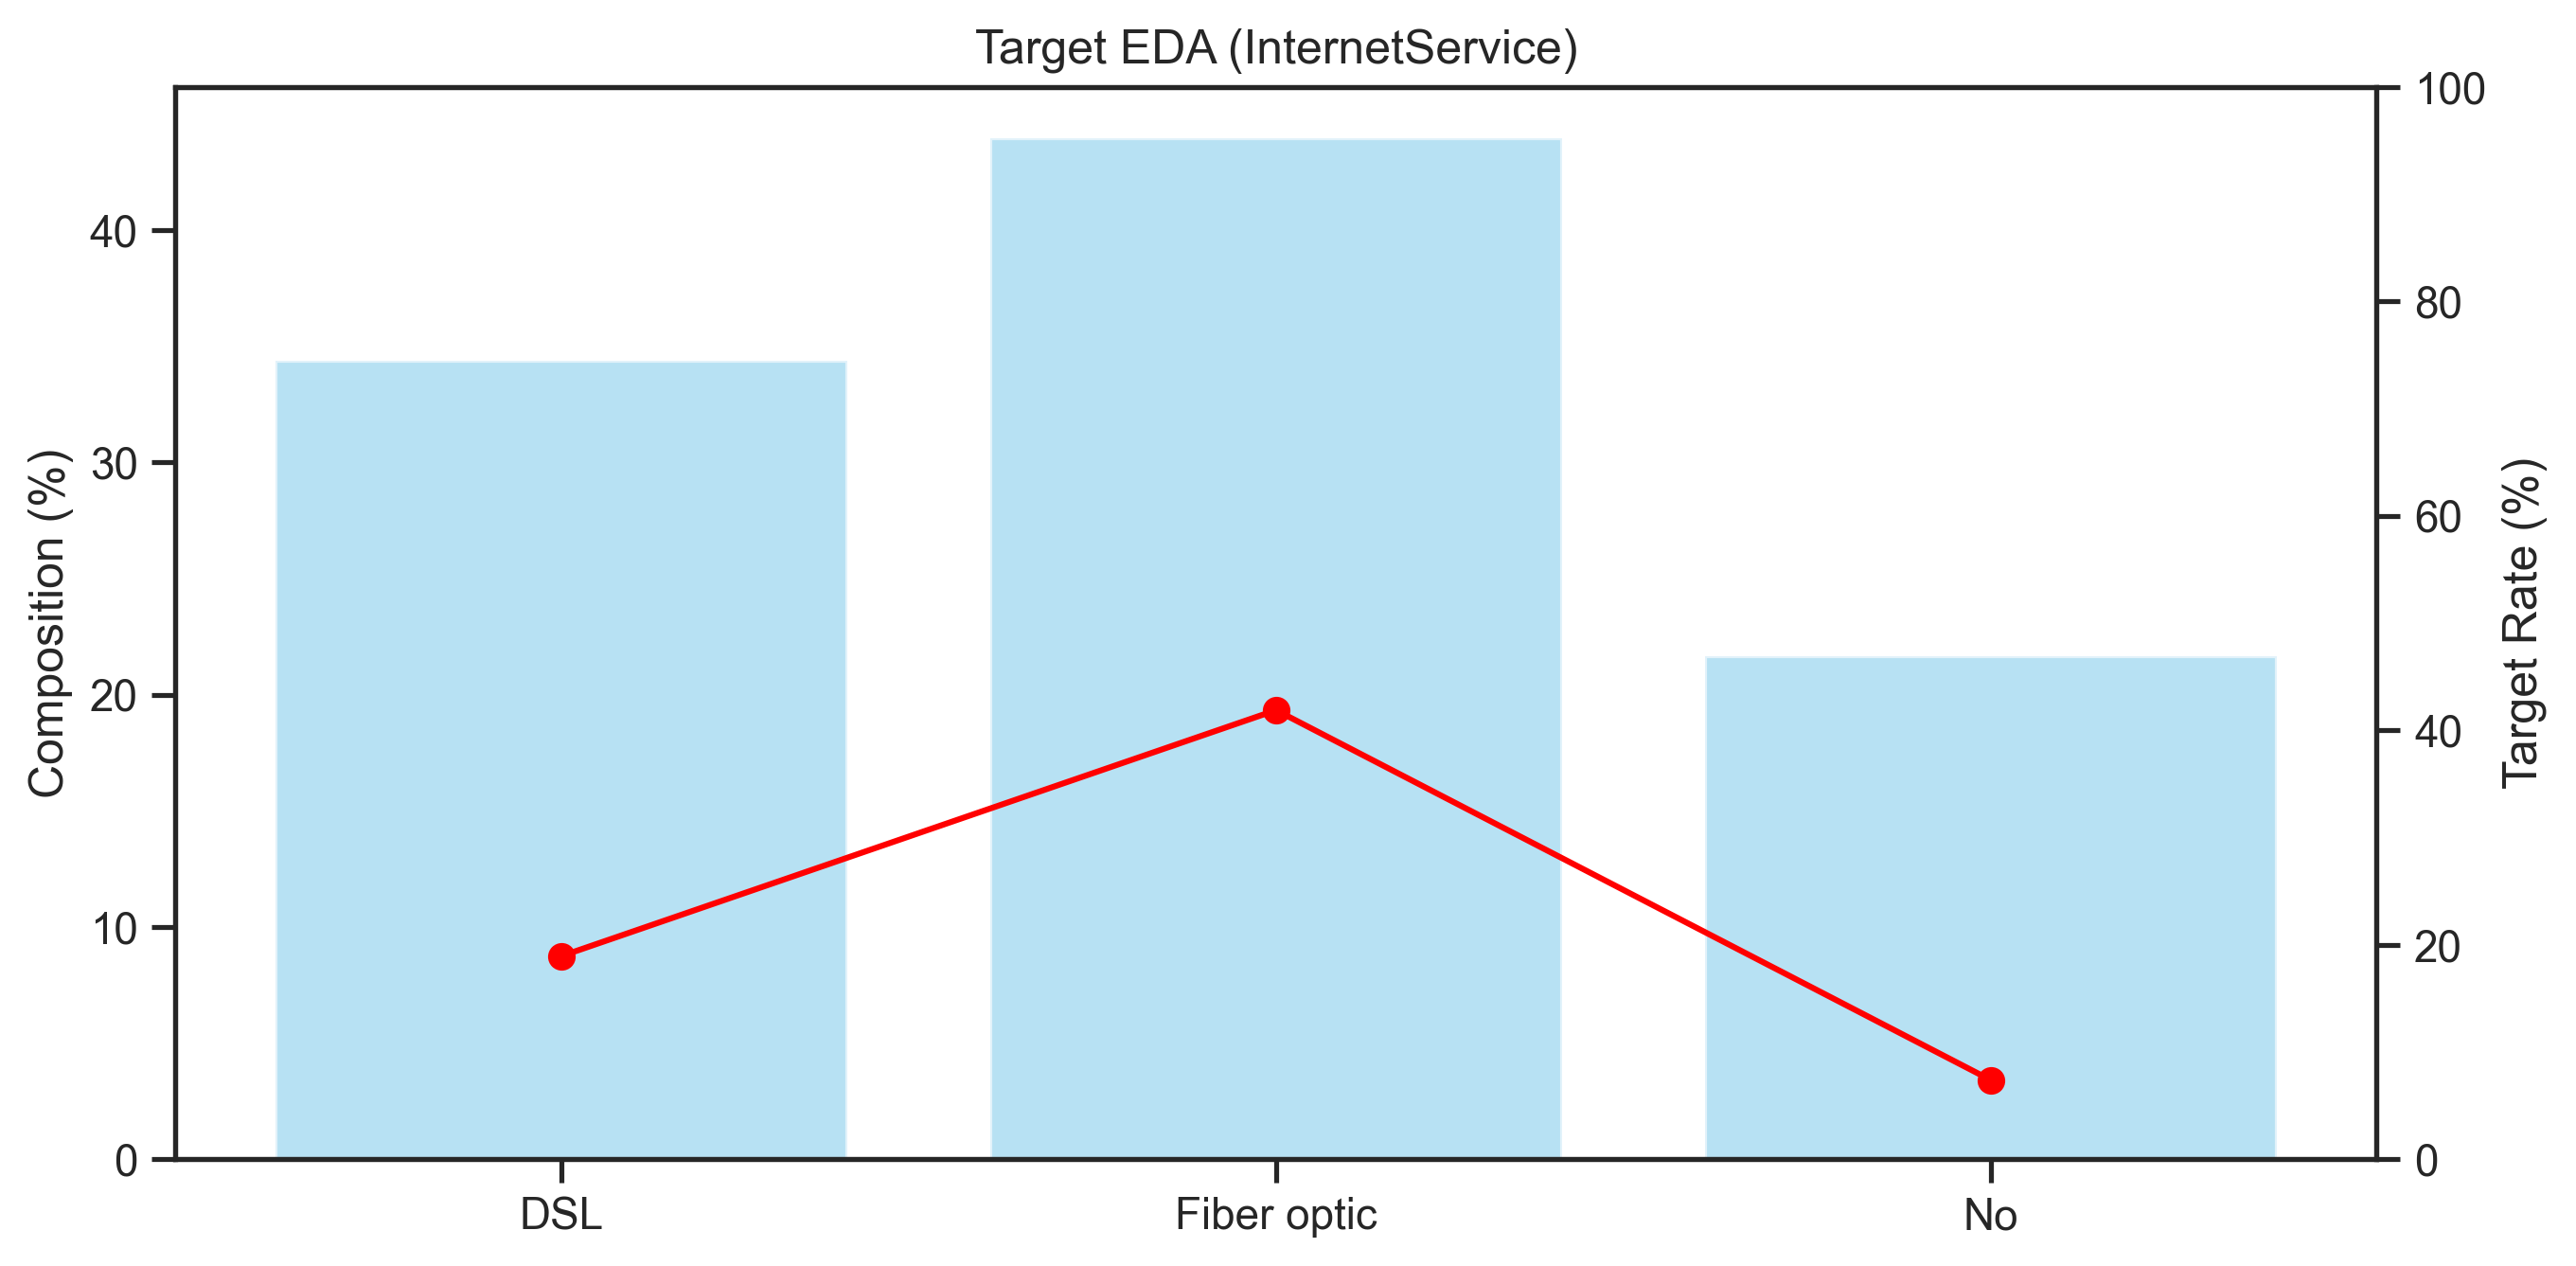

In [191]:
eda_target(df, 'InternetService', target_col='Churn', bins=10)

## 3.9. OnlineSecurity에 따른 Churn
- OnlineSecurity가 'No'인 사람은 전체의 49.7%로 가장 많고, 이탈률도 41.8%로 매우 높음

In [192]:
df.groupby('OnlineSecurity')[['cnt1', 'Churn']].sum()

cnt1  Churn
OnlineSecurity                  
No                   3498   1461
No internet service  1526    113
Yes                  2019    295

In [193]:
eda_target(df, 'OnlineSecurity', target_col='Churn', bins=10)

        OnlineSecurity  Count  TargetRate  CountPercent  TargetRatePercent
0                   No   3498    0.417667     49.666335          41.766724
1  No internet service   1526    0.074050     21.666903           7.404980
2                  Yes   2019    0.146112     28.666761          14.611194


## 3.10. OnlineBackup에 따른 Churn
- OnlineBackup이 'No'인 사람은 전체의 43.8%로 가장 많고, 이탈률도 39.9%로 가장 높음
- OnlineBackup이 'Yes'인 사람은 전체의 34.5% 수준

In [194]:
df.groupby('OnlineBackup')[['cnt1', 'Churn']].sum()

cnt1  Churn
OnlineBackup                    
No                   3088   1233
No internet service  1526    113
Yes                  2429    523

In [195]:
eda_target(df, 'OnlineBackup',  target_col='Churn', bins=10)

          OnlineBackup  Count  TargetRate  CountPercent  TargetRatePercent
0                   No   3088    0.399288     43.844952          39.928756
1  No internet service   1526    0.074050     21.666903           7.404980
2                  Yes   2429    0.215315     34.488144          21.531494


## 3.11. DeviceProtection에 따른 Churn
- DeviceProtection이 'No'인 사람은 전체의 43.9%로 가장 많고, 이탈률은 39%로 가장 높음
- DeviceProtection이 'Yes'인 사람의 이탈률은 22.5% 수준

In [196]:
df.groupby('DeviceProtection')[['cnt1', 'Churn']].sum()

cnt1  Churn
DeviceProtection                
No                   3095   1211
No internet service  1526    113
Yes                  2422    545

In [197]:
eda_target(df, 'DeviceProtection', target_col='Churn', bins=10)

      DeviceProtection  Count  TargetRate  CountPercent  TargetRatePercent
0                   No   3095    0.391276     43.944342          39.127625
1  No internet service   1526    0.074050     21.666903           7.404980
2                  Yes   2422    0.225021     34.388755          22.502064


## 3.12. TechSupport에 따른 Churn
- TechSupport가 'No'인 사람은 전체의 49.3%로 가장 많고, 이탈률은 41.6%로 가장 높음
- TechSupport가 'Yes'인 사람의 이탈률은 15% 수준

In [198]:
df.groupby('TechSupport')[['cnt1', 'Churn']].sum()

cnt1  Churn
TechSupport                     
No                   3473   1446
No internet service  1526    113
Yes                  2044    310

In [199]:
eda_target(df, 'TechSupport', target_col='Churn', bins=10)

           TechSupport  Count  TargetRate  CountPercent  TargetRatePercent
0                   No   3473    0.416355     49.311373          41.635474
1  No internet service   1526    0.074050     21.666903           7.404980
2                  Yes   2044    0.151663     29.021724          15.166341


## 3.13. StreamingTV에 따른 Churn
- 스트리밍TV를 이용하지 않는 고객의 이탈률이 33.5% 수준으로, 스트리밍TV 이용 고객 대비 3%p 정도 높음

In [200]:
df.groupby('StreamingTV')[['cnt1', 'Churn']].sum()

cnt1  Churn
StreamingTV                     
No                   2810    942
No internet service  1526    113
Yes                  2707    814

           StreamingTV  Count  TargetRate  CountPercent  TargetRatePercent
0                   No   2810    0.335231     39.897771          33.523132
1  No internet service   1526    0.074050     21.666903           7.404980
2                  Yes   2707    0.300702     38.435326          30.070188


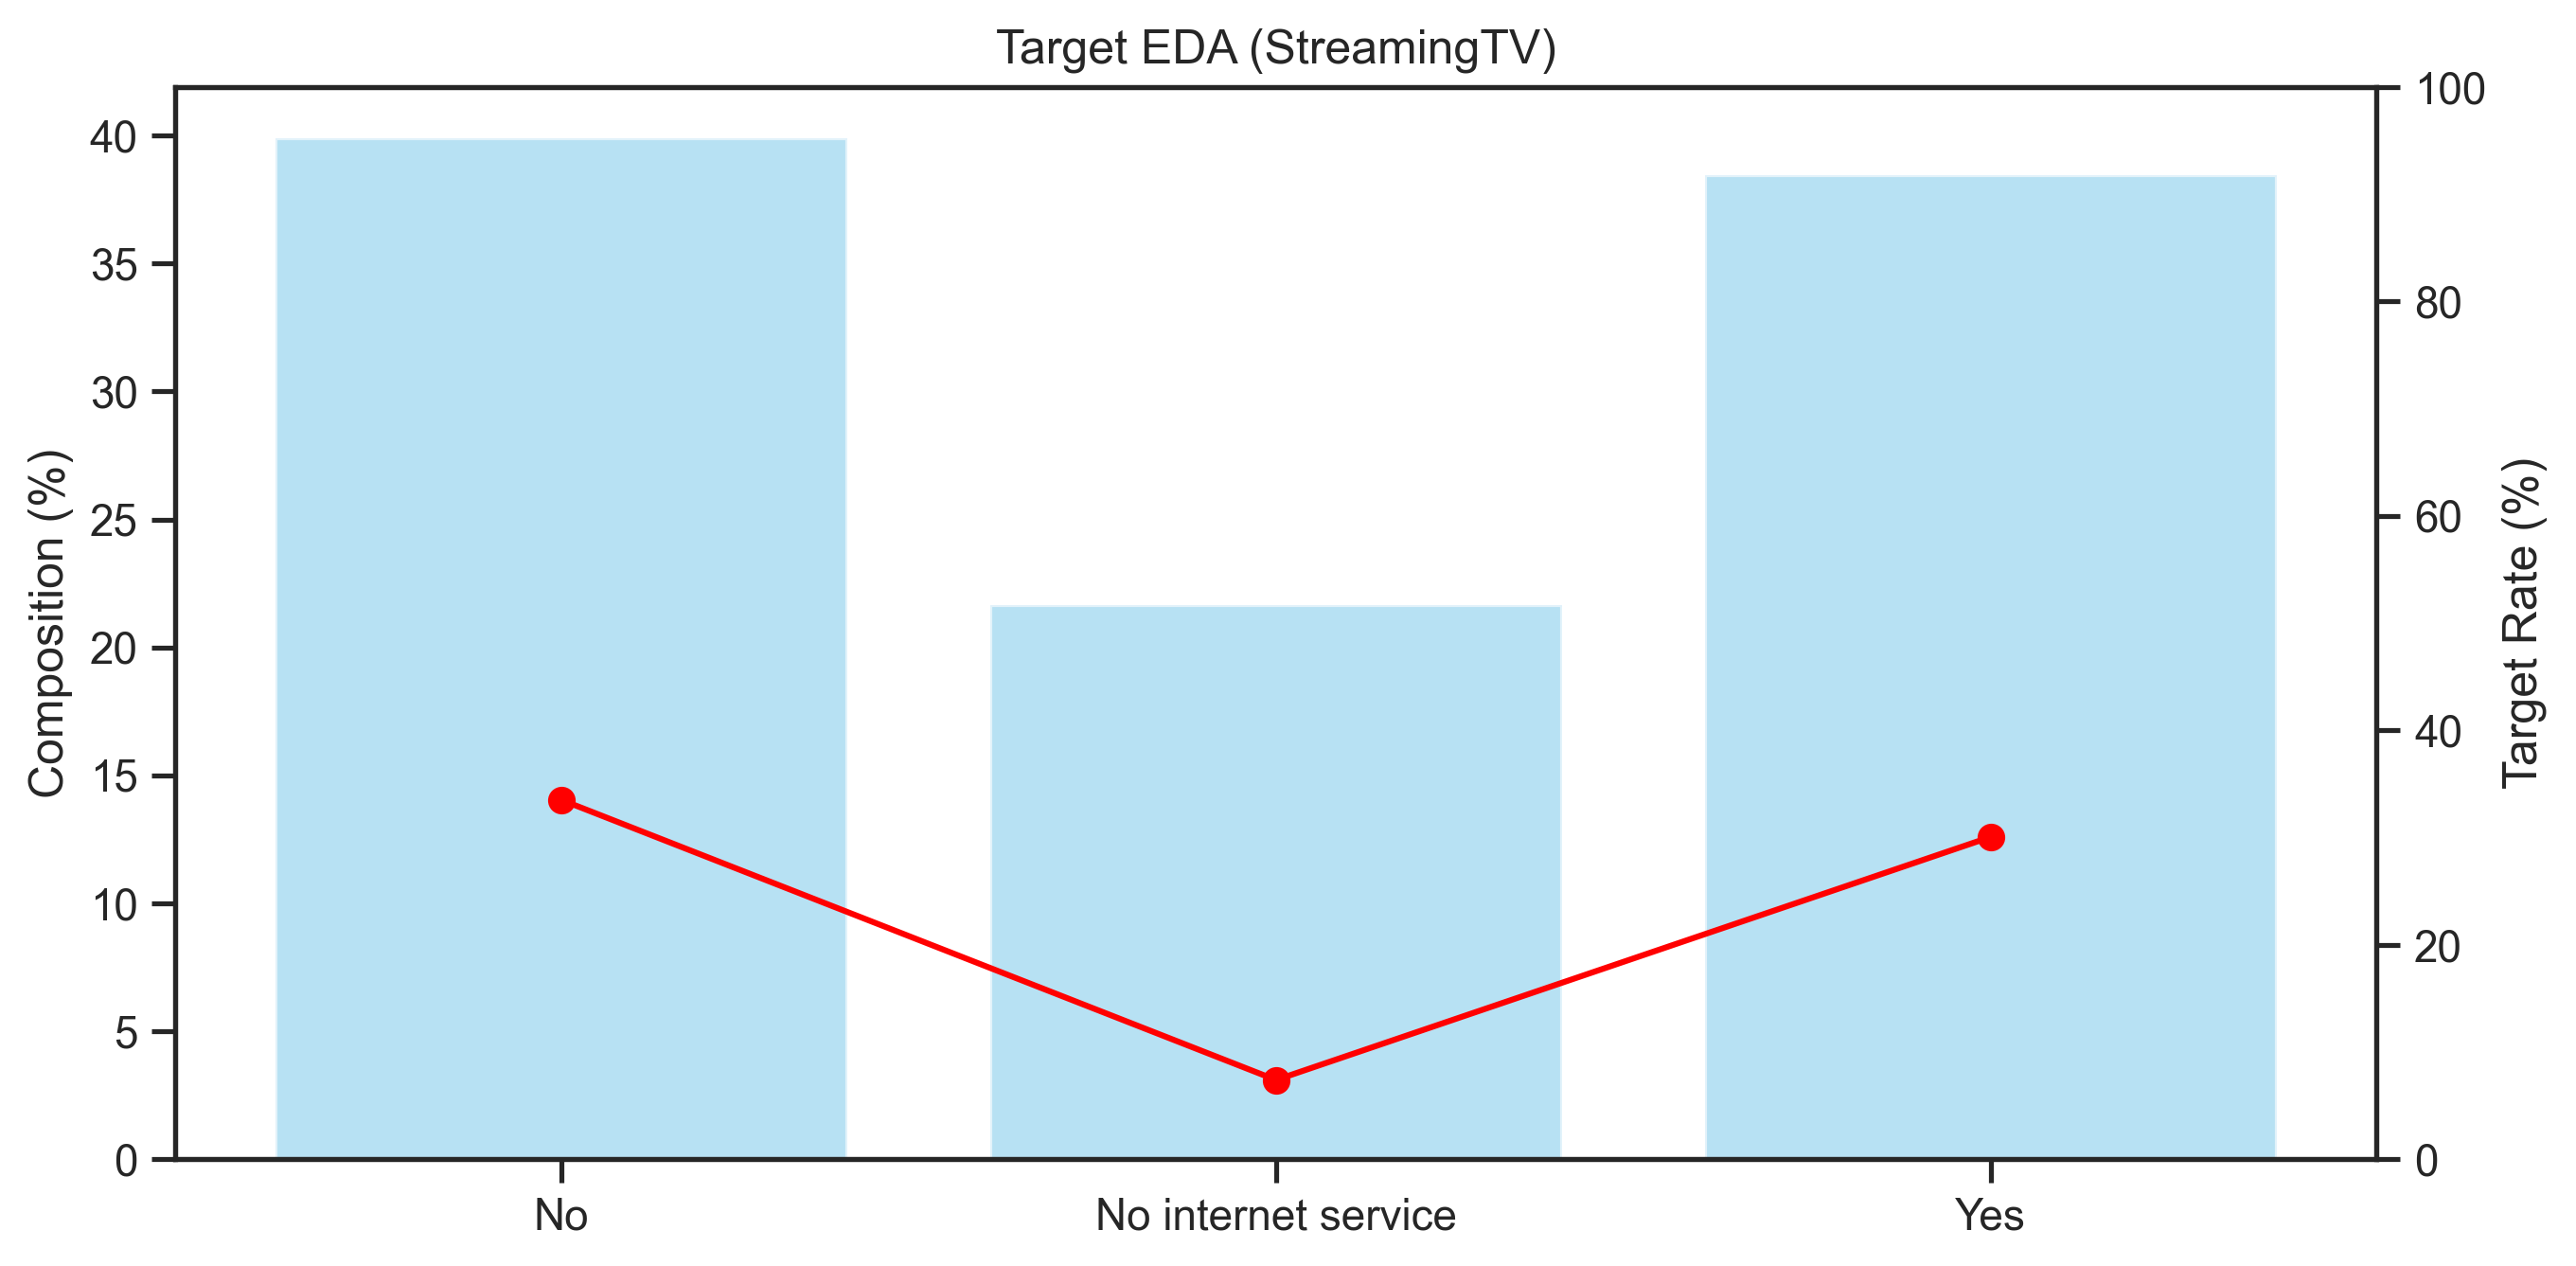

In [201]:
eda_target(df, 'StreamingTV', target_col='Churn', bins=10)

## 3.14. StreamingMovies에 따른 Churn
- 스트리밍 영화를 이용하지 않는 고객의 이탈률은 33.6% 수준으로, 스트리밍 영화 이용 고객 대비 3%p 정도 높음

In [202]:
df.groupby('StreamingMovies')[['cnt1', 'Churn']].sum()

cnt1  Churn
StreamingMovies                 
No                   2785    938
No internet service  1526    113
Yes                  2732    818

       StreamingMovies  Count  TargetRate  CountPercent  TargetRatePercent
0                   No   2785    0.336804     39.542808          33.680431
1  No internet service   1526    0.074050     21.666903           7.404980
2                  Yes   2732    0.299414     38.790288          29.941435


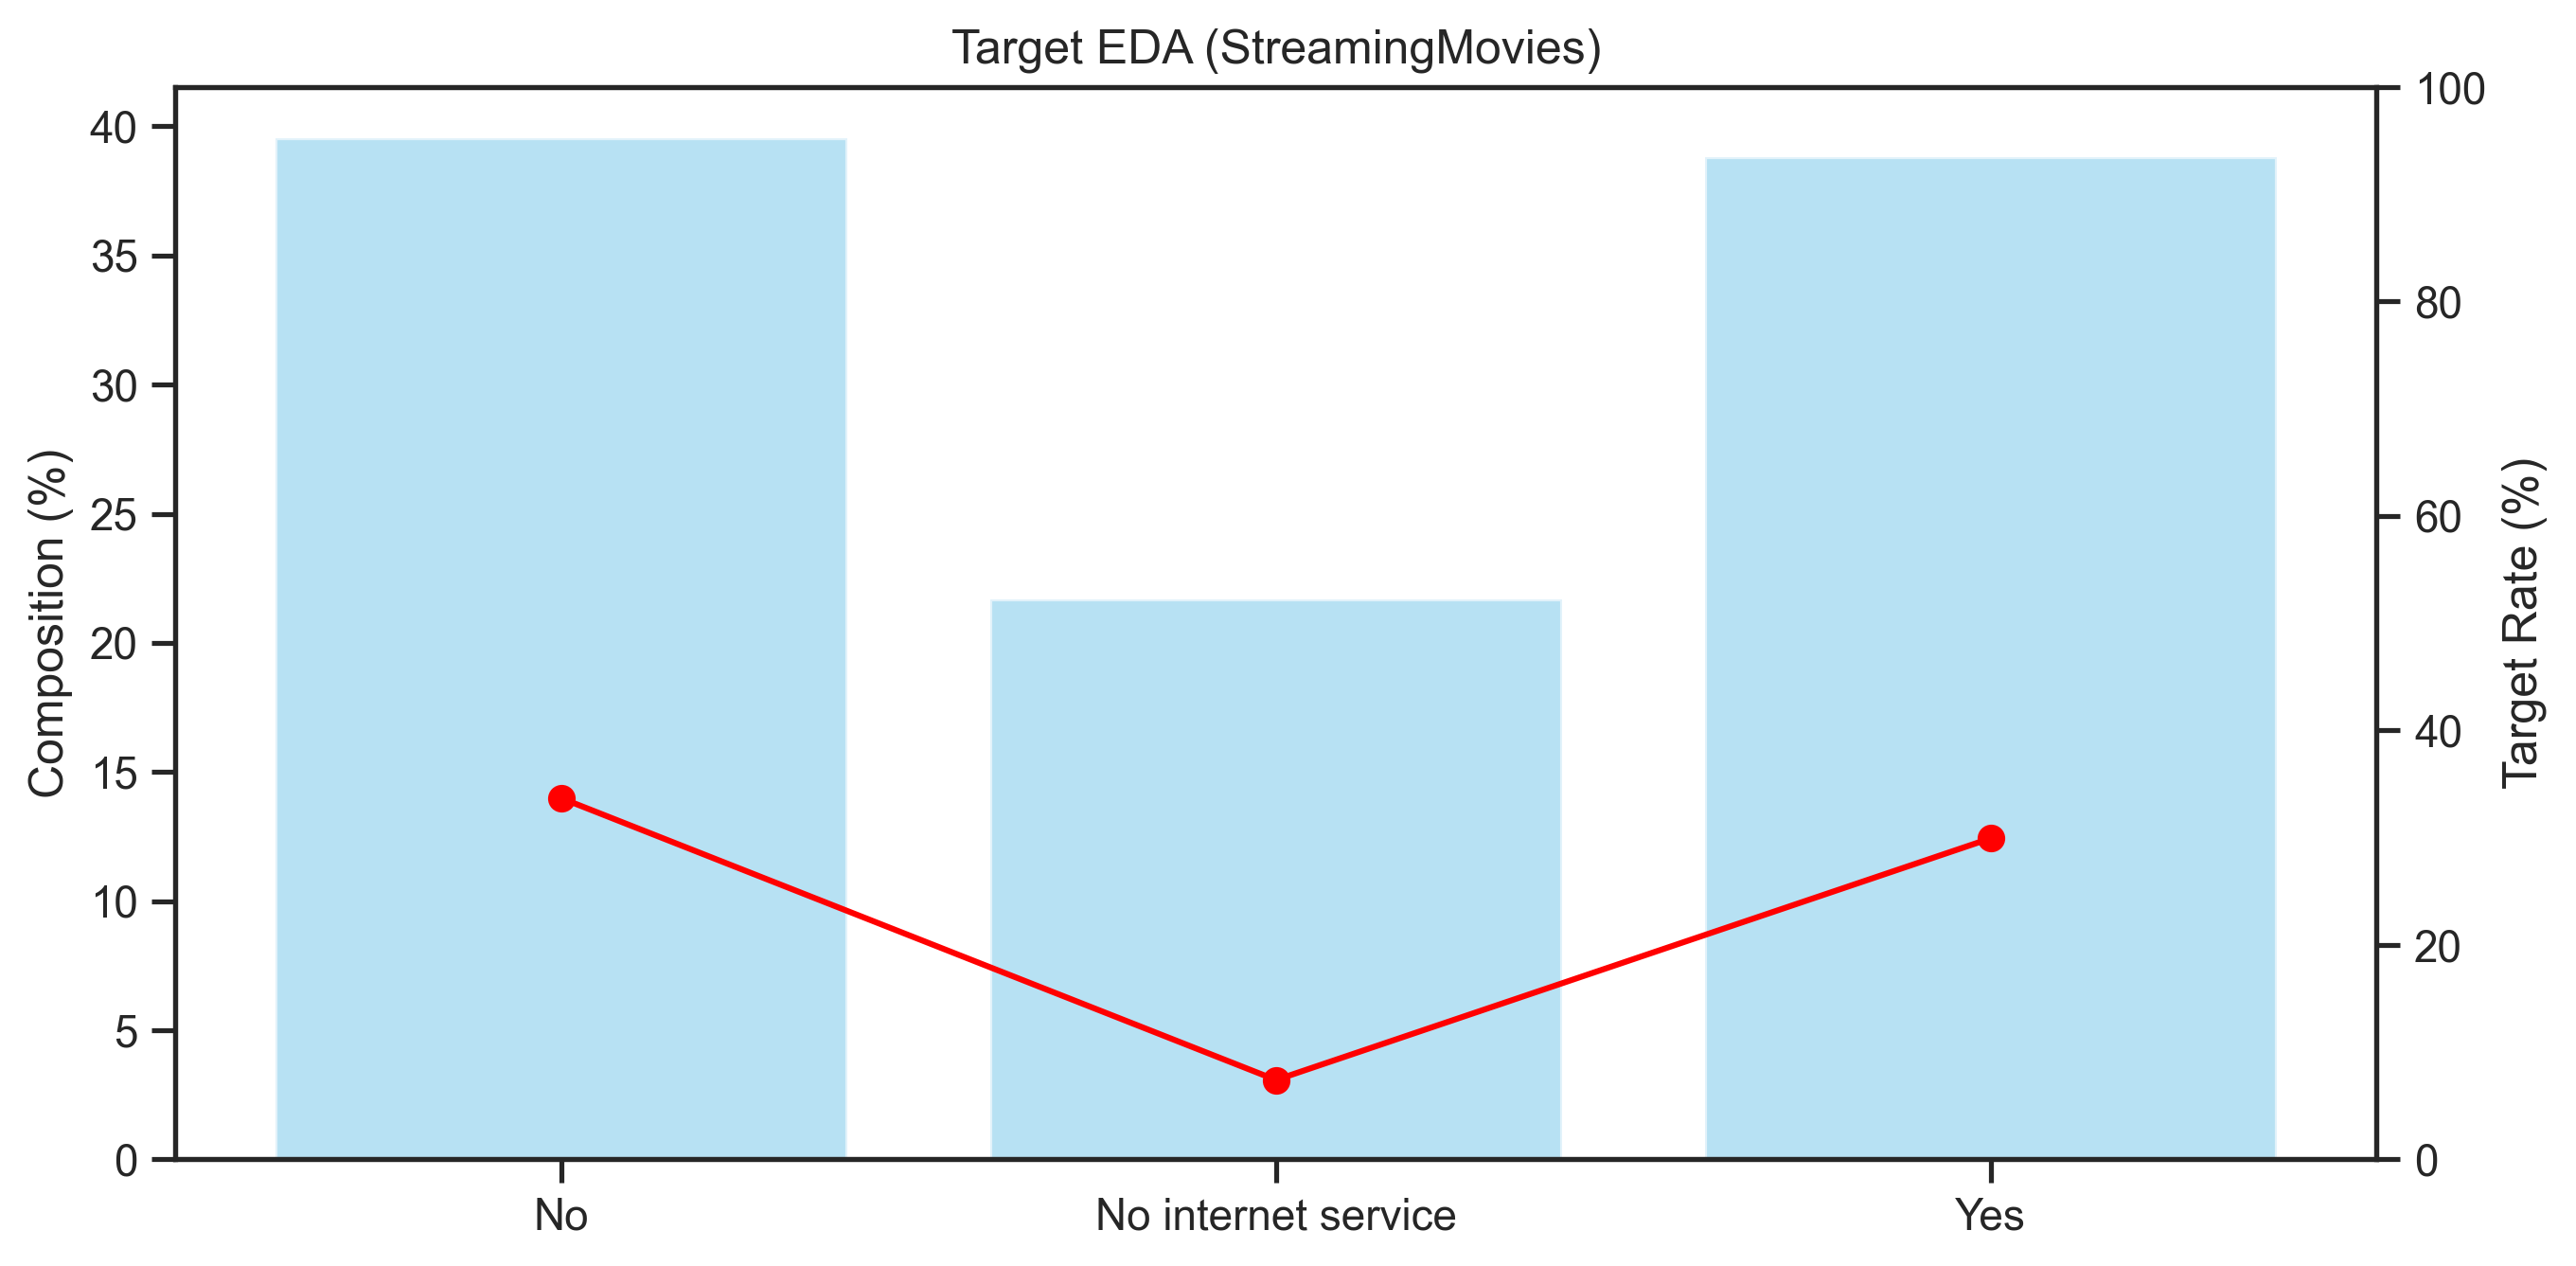

In [203]:
eda_target(df, 'StreamingMovies', target_col='Churn', bins=10)

## 3.15. Contract에 따른 Churn
- 계약기간이 'Month-to-Month'인 고객의 이탈률이 42.7% 수준으로 'One year', 'Two year'보다 매우 높음

In [204]:
df.groupby('Contract')[['cnt1', 'Churn']].sum()

cnt1  Churn
Contract                   
Month-to-month  3875   1655
One year        1473    166
Two year        1695     48

In [205]:
eda_target(df, 'Contract', target_col='Churn', bins=10)

         Contract  Count  TargetRate  CountPercent  TargetRatePercent
0  Month-to-month   3875    0.427097     55.019168          42.709677
1        One year   1473    0.112695     20.914383          11.269518
2        Two year   1695    0.028319     24.066449           2.831858


## 3.16. PaperlessBilling에 따른 Churn
- PaperlessBilling이 'Yes'인 고객의 이탈률이 33.6% 수준으로, 'No'인 고객 대비 2배정도 높음

In [206]:
df.groupby('PaperlessBilling')[['cnt1', 'Churn']].sum()

cnt1  Churn
PaperlessBilling             
No                2872    469
Yes               4171   1400

  PaperlessBilling  Count  TargetRate  CountPercent  TargetRatePercent
0               No   2872    0.163301     40.778078          16.330084
1              Yes   4171    0.335651     59.221922          33.565092


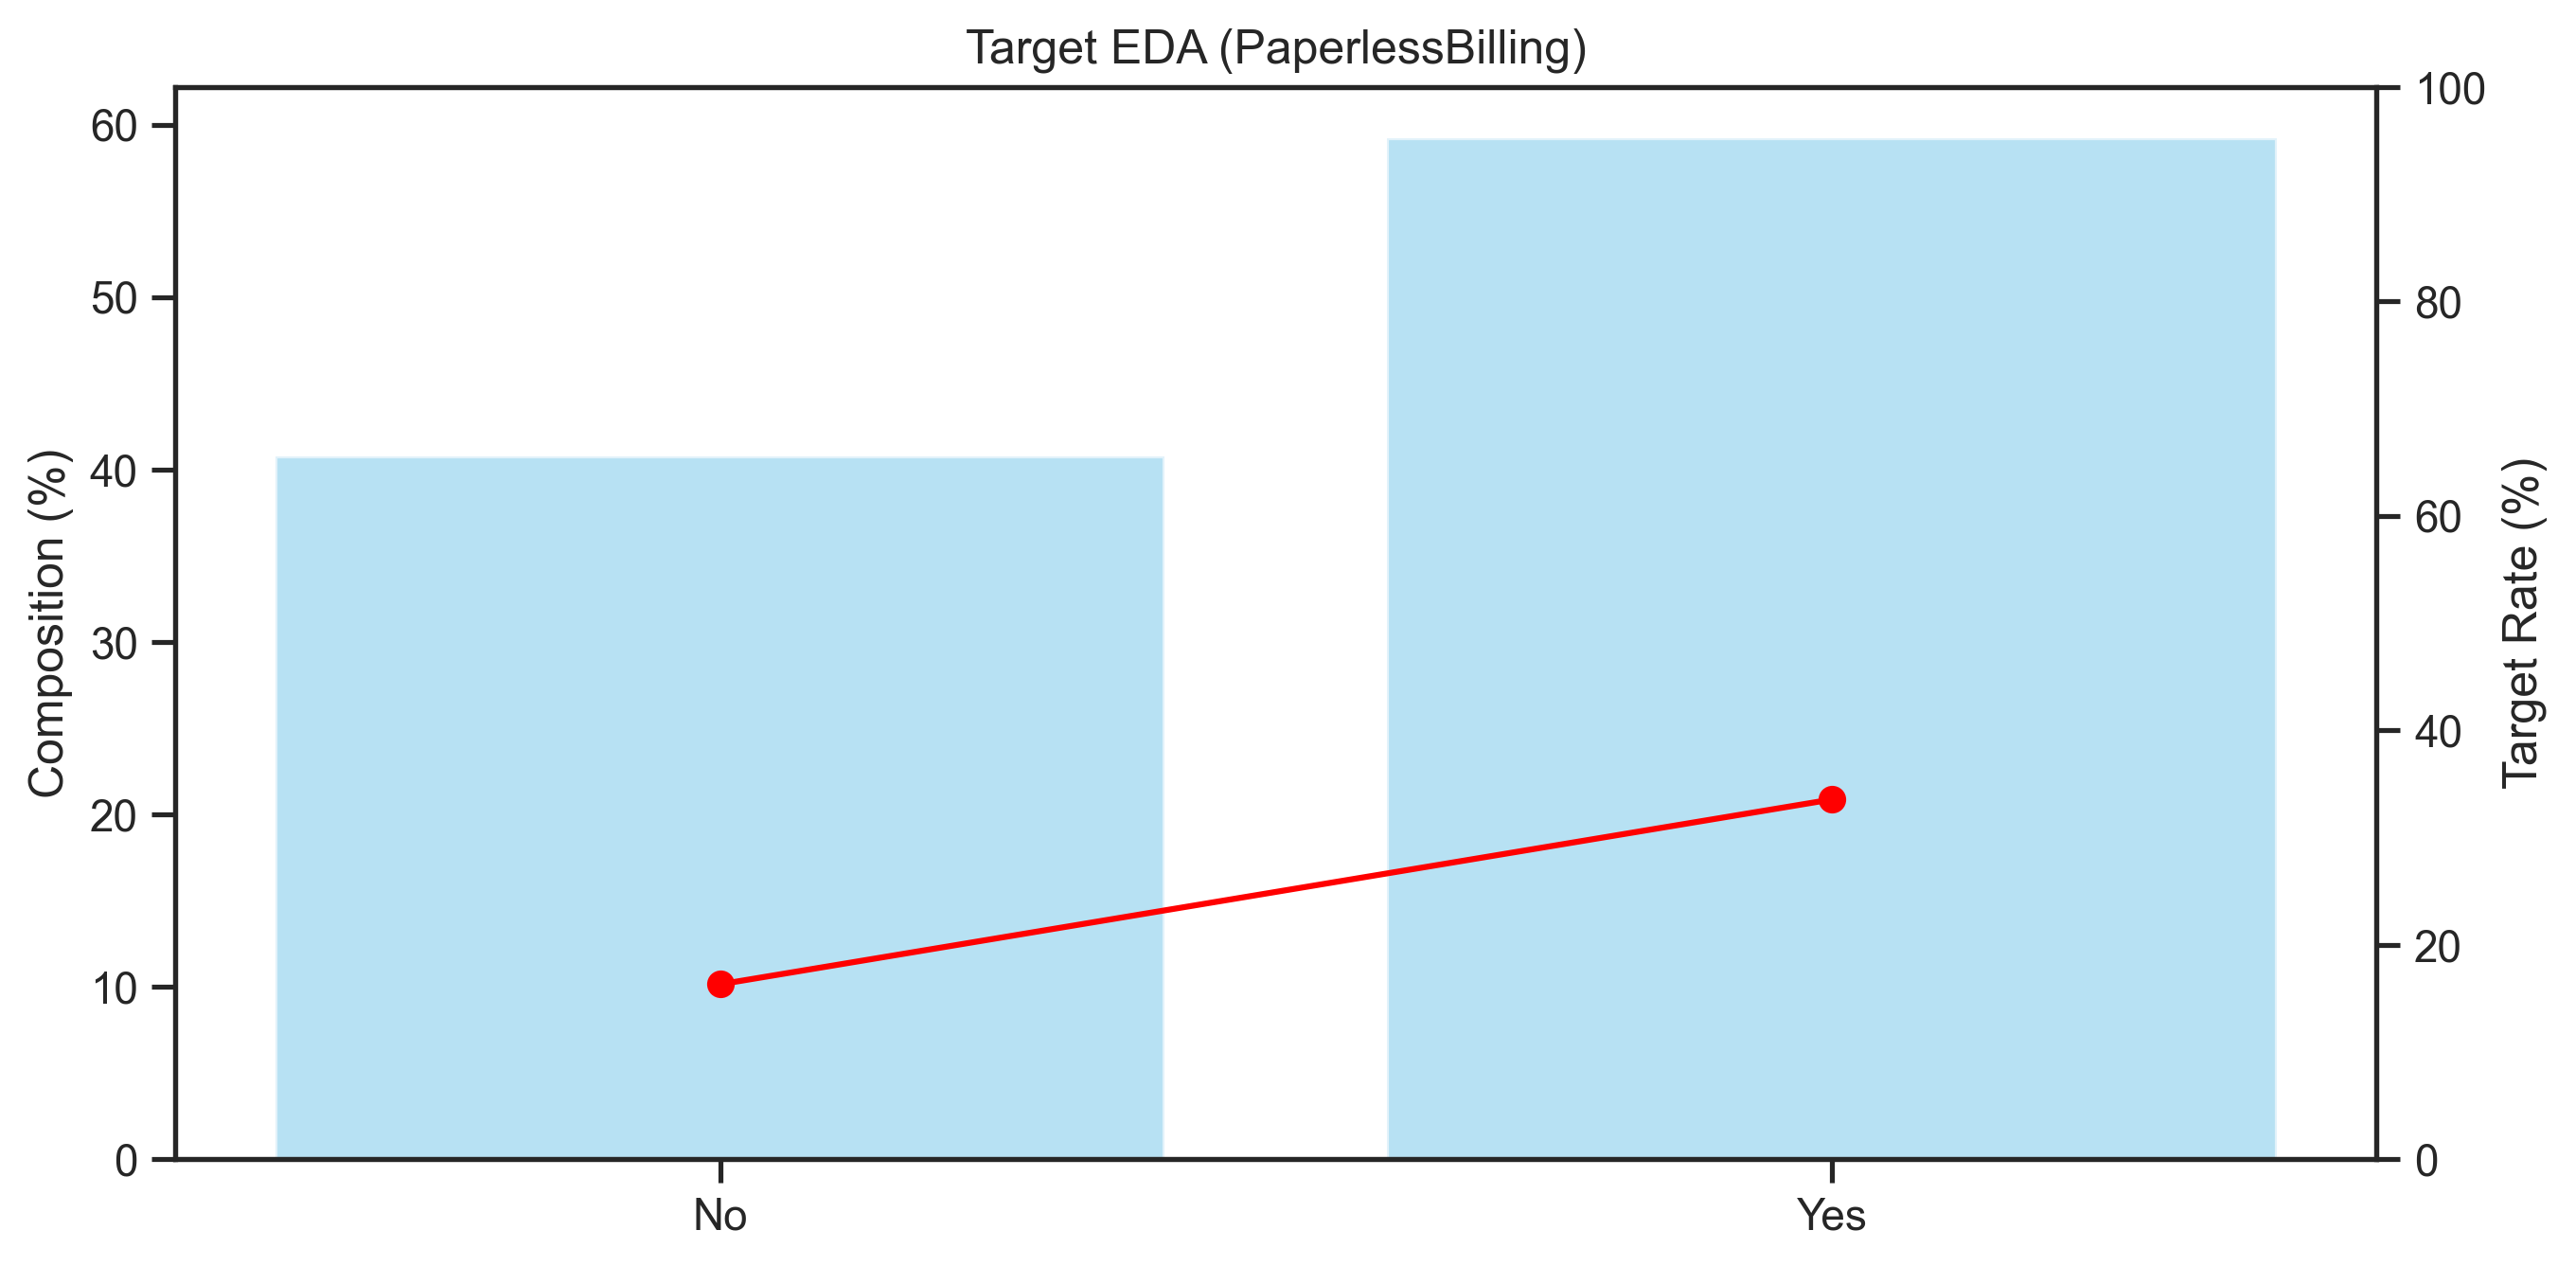

In [207]:
eda_target(df, 'PaperlessBilling', target_col='Churn', bins=10)

## 3.17. PaymentMethod에 따른 Churn
- 지불방식이 'Electronic check'인 고객의 이탈률이 45.3% 수준으로 매우 높음

In [208]:
df.groupby('PaymentMethod')[['cnt1', 'Churn']].sum()

cnt1  Churn
PaymentMethod                         
Bank transfer (automatic)  1544    258
Credit card (automatic)    1522    232
Electronic check           2365   1071
Mailed check               1612    308

               PaymentMethod  Count  TargetRate  CountPercent  \
0  Bank transfer (automatic)   1544    0.167098     21.922476   
1    Credit card (automatic)   1522    0.152431     21.610109   
2           Electronic check   2365    0.452854     33.579441   
3               Mailed check   1612    0.191067     22.887974   

   TargetRatePercent  
0          16.709845  
1          15.243101  
2          45.285412  
3          19.106700  


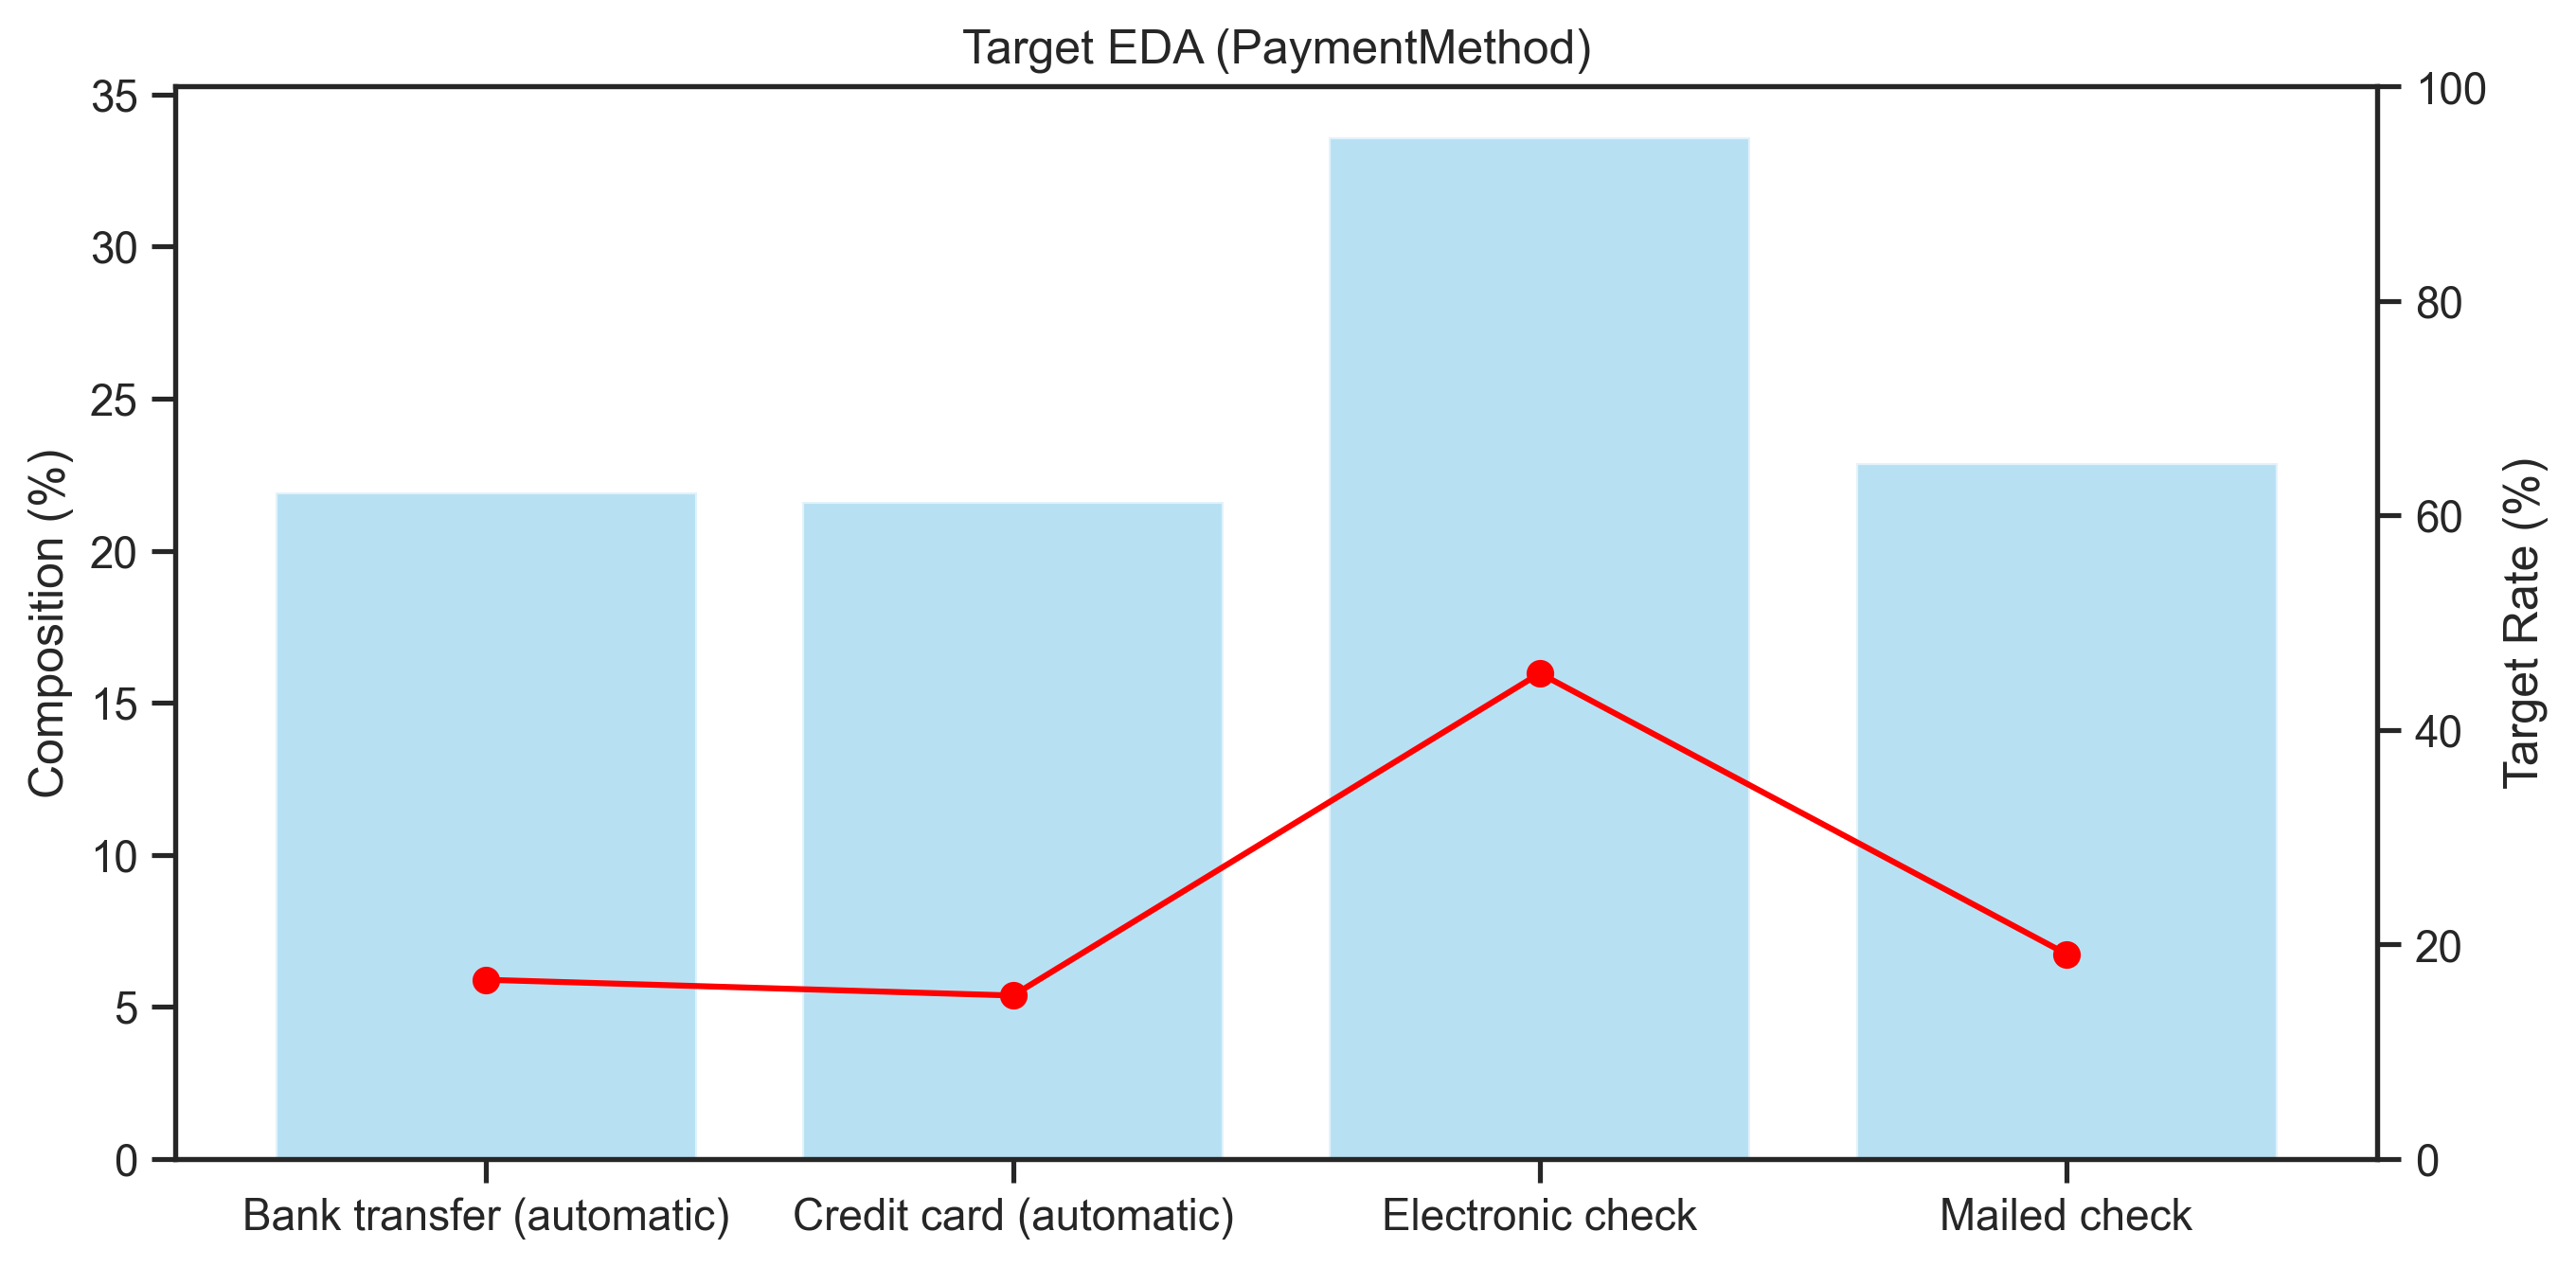

In [209]:
eda_target(df, 'PaymentMethod', target_col='Churn', bins=10)

## ✍️3.18. tenure에 따른 Churn
- tenure가 14 이하인 사람의 이탈률이 30% 이상
- 비율은 누적인가????? 해석 방법 더 찾아보기!

In [210]:
len(df['tenure'].unique())
# 73

73

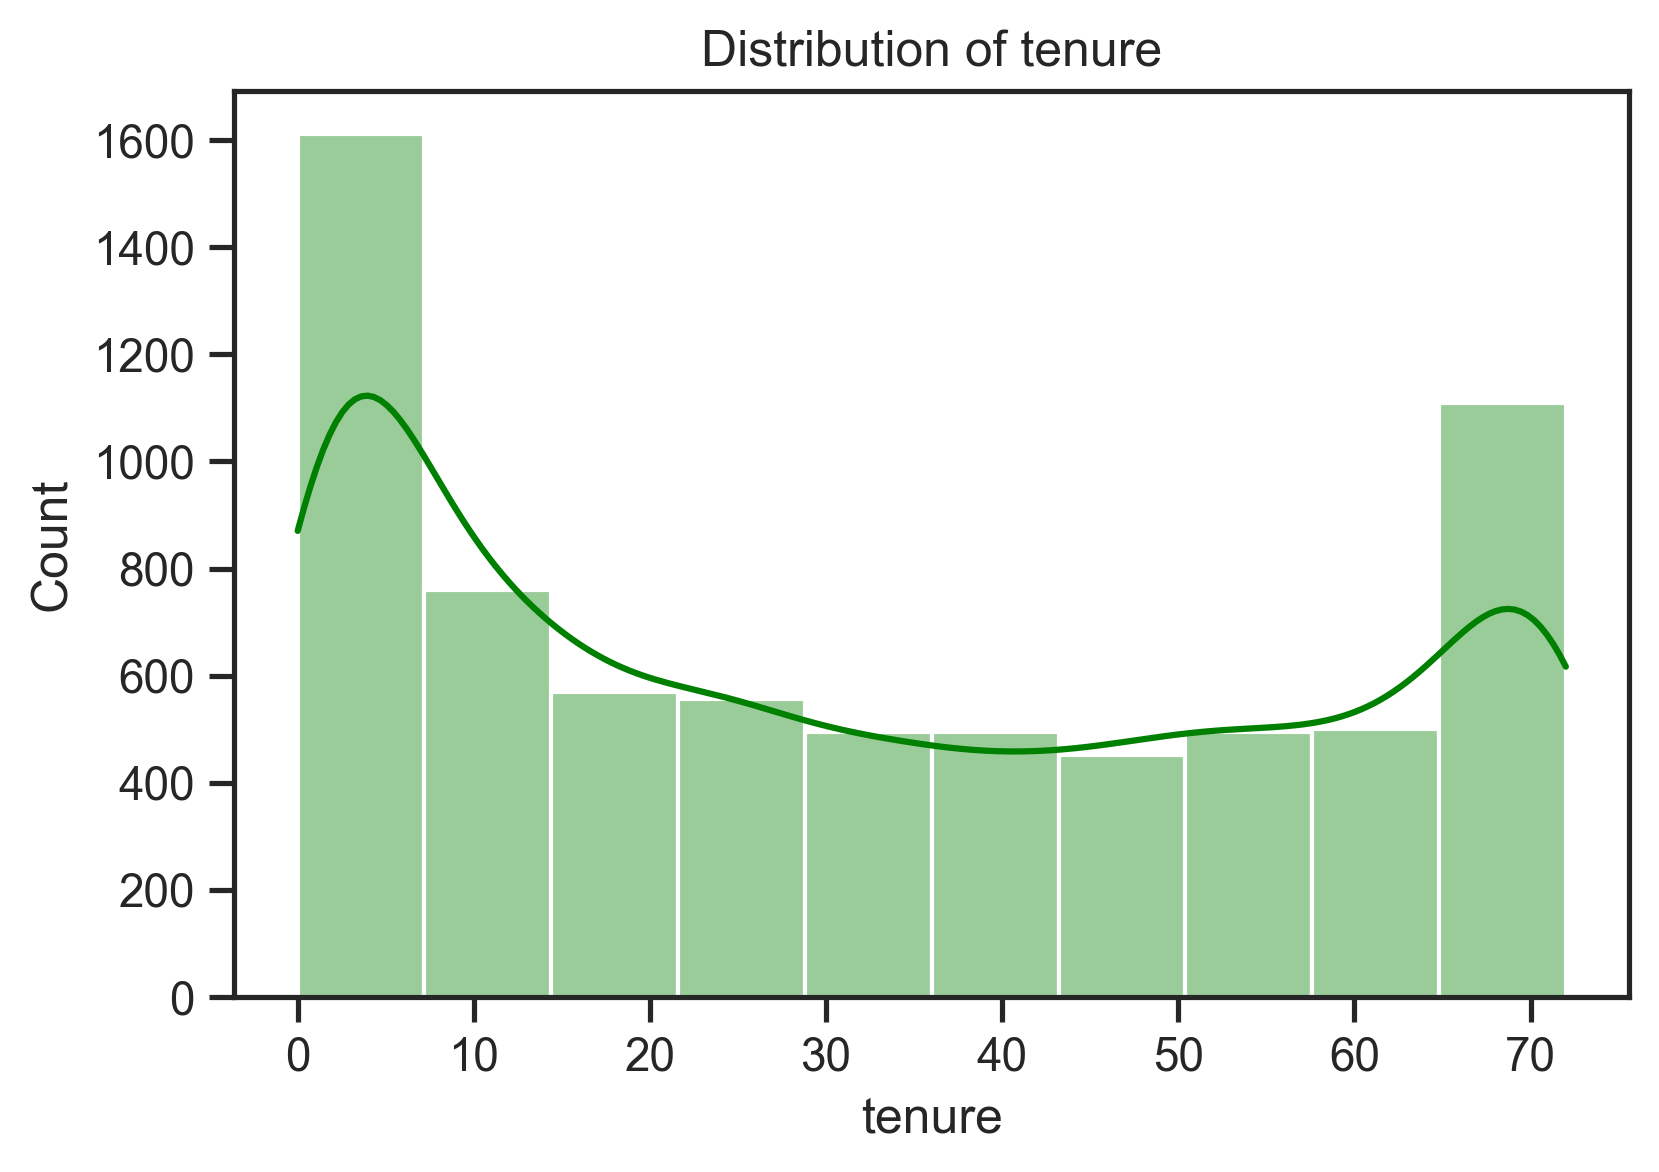

In [211]:
# ✍️수치형 데이터는 먼저 histplot 그려보기!
plt.figure(figsize=(6, 4))

sns.histplot(df['tenure'], bins=10, kde=True, color='green', alpha=0.4)
plt.title('Distribution of tenure')
plt.xlabel('tenure')
plt.ylabel('Count')

plt.show()

  tenure_bin  Count  TargetRate  CountPercent  TargetRatePercent
0     -0.072   1612    0.517990     22.887974          51.799007
1      7.200    759    0.347826     10.776658          34.782609
2     14.400    570    0.296491      8.093142          29.649123
3     21.600    556    0.226619      7.894363          22.661871
4     28.800    545    0.214679      7.738180          21.467890
5     36.000    444    0.220721      6.304132          22.072072
6     43.200    452    0.159292      6.417720          15.929204
7     50.400    495    0.141414      7.028255          14.141414
8     57.600    501    0.091816      7.113446           9.181637
9     64.800   1109    0.064923     15.746131           6.492335


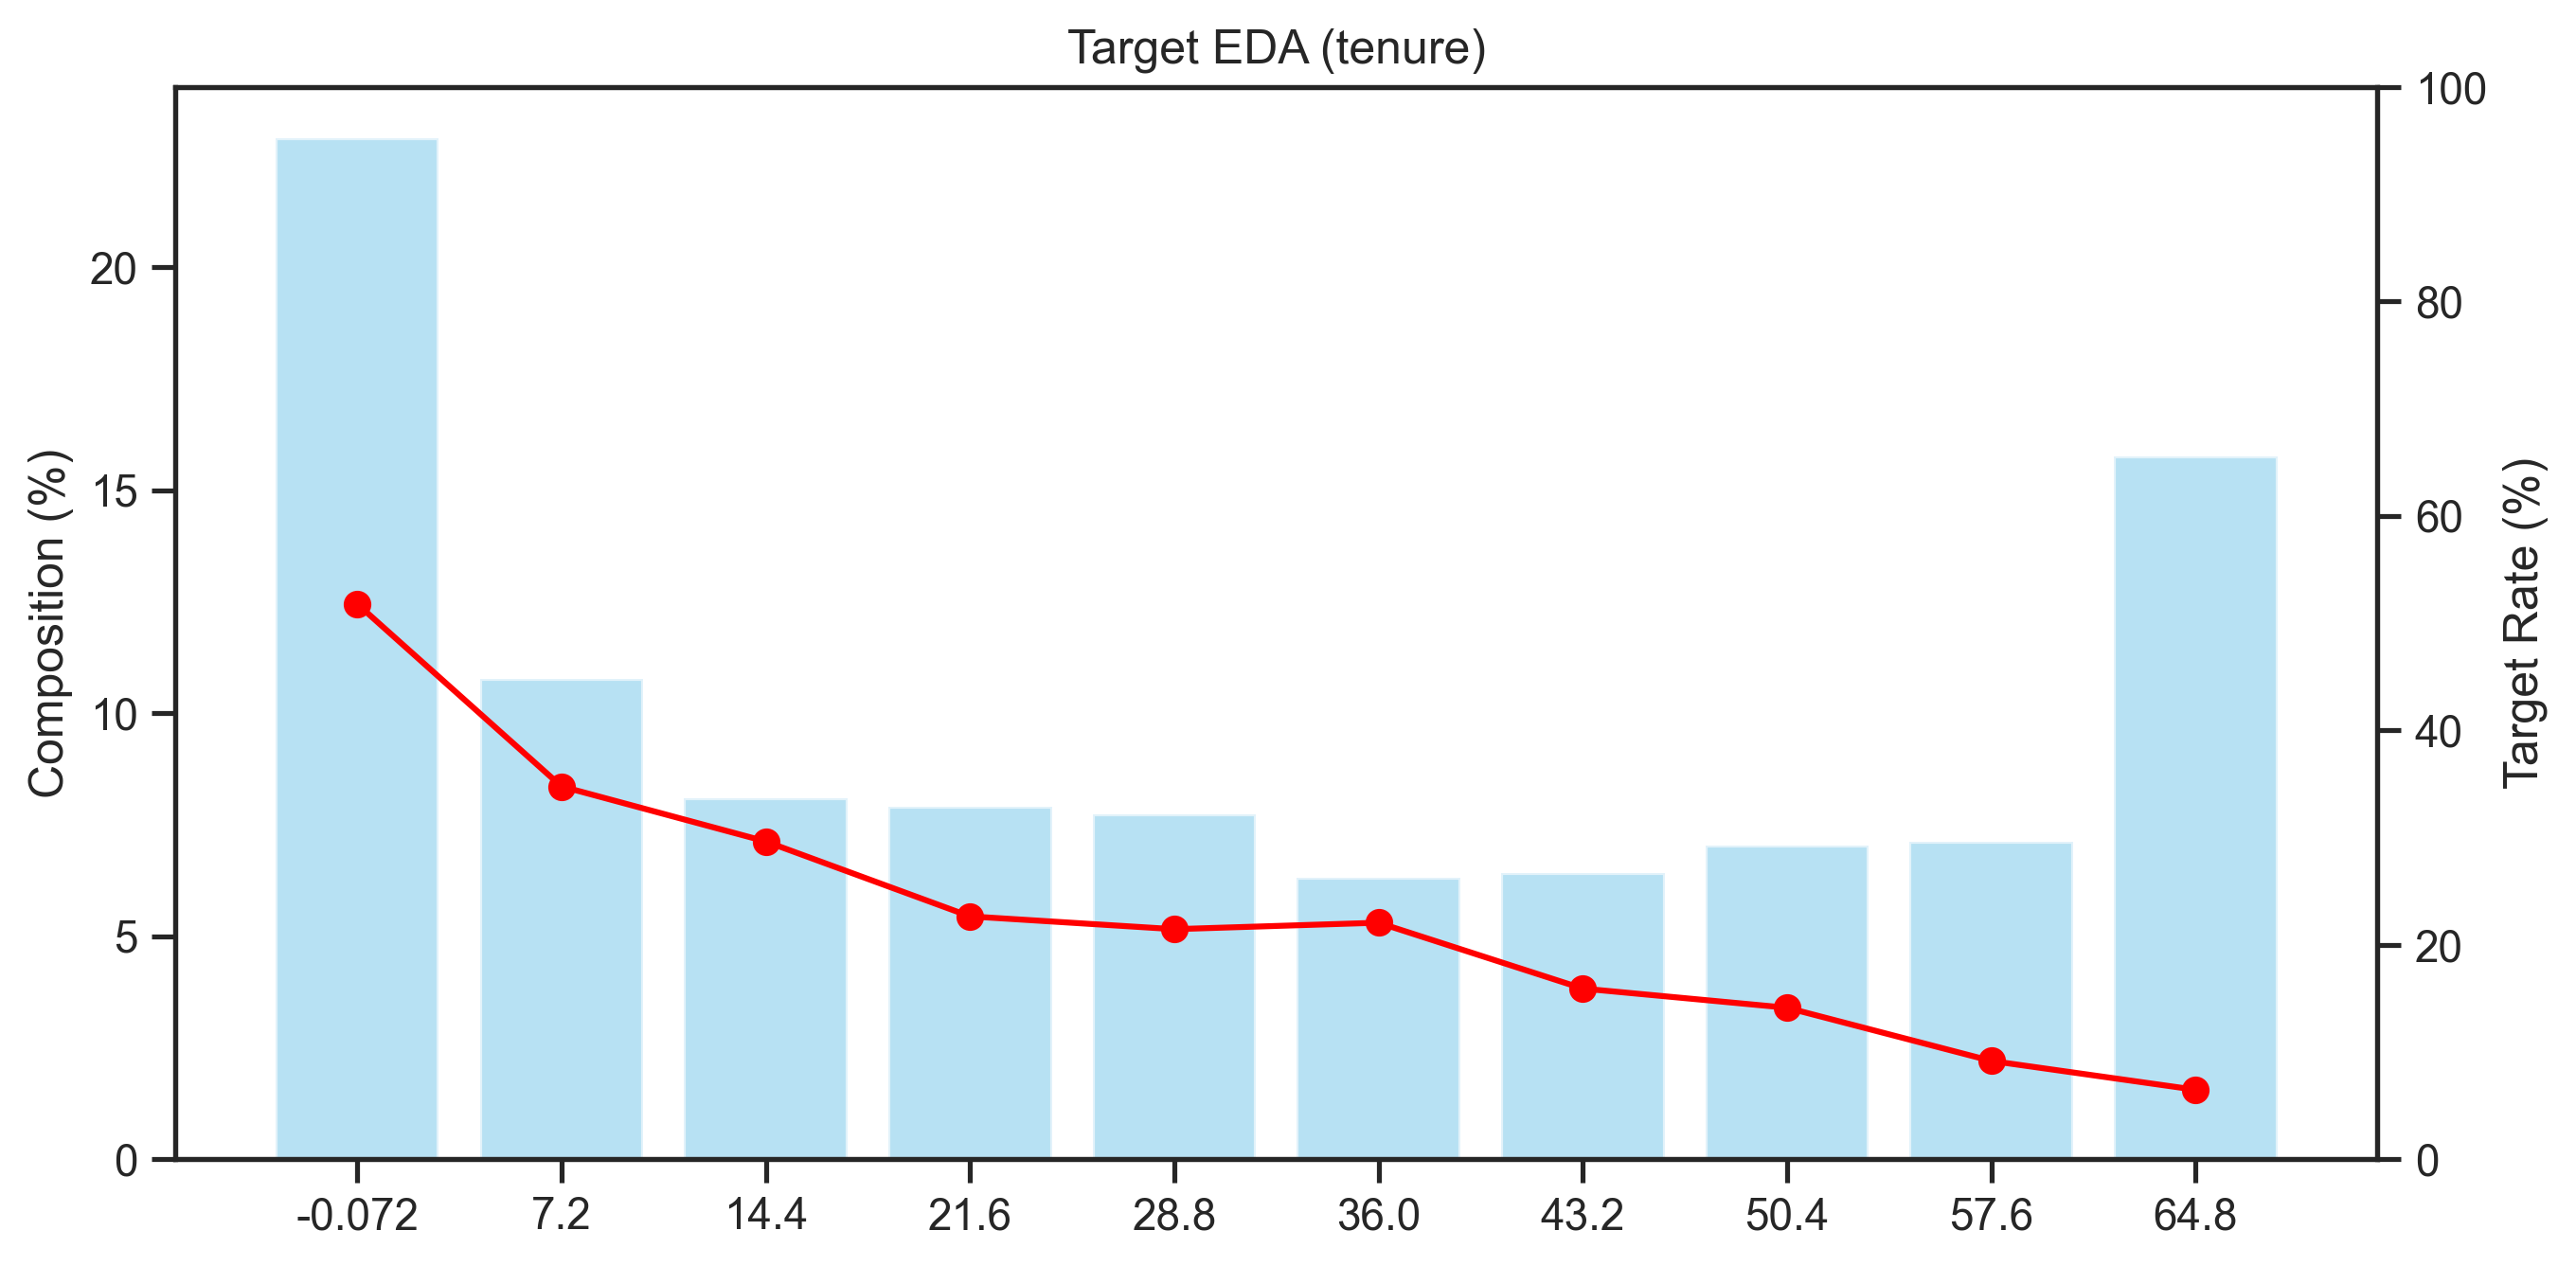

In [212]:
# uniform(균등) binning
eda_target(df, 'tenure', target_col='Churn', method='uniform', bins=10)

In [213]:
# quantile(분위수) binning
eda_target(df, 'tenure', target_col='Churn', method='quantile', bins=10)

  tenure_bin  Count  TargetRate  CountPercent  TargetRatePercent
0     -0.001    862    0.583527     12.239103          58.352668
1      2.000    619    0.453958      8.788868          45.395800
2      6.000    705    0.358865     10.009939          35.886525
3     12.000    692    0.309249      9.825359          30.924855
4     20.000    691    0.228654      9.811160          22.865412
5     29.000    717    0.218968     10.180321          21.896792
6     40.000    652    0.176380      9.257419          17.638037
7     50.000    698    0.136103      9.910549          13.610315
8     60.000    756    0.092593     10.734062           9.259259
9     69.000    651    0.035330      9.243220           3.533026


## 3.19. MonthlyCharges에 따른 Churn
- 월 청구액 70~100달러 구간에서 이탈률 36~39% 수준으로 매우 높음

In [214]:
len(df['MonthlyCharges'].unique())
# 1585

1585

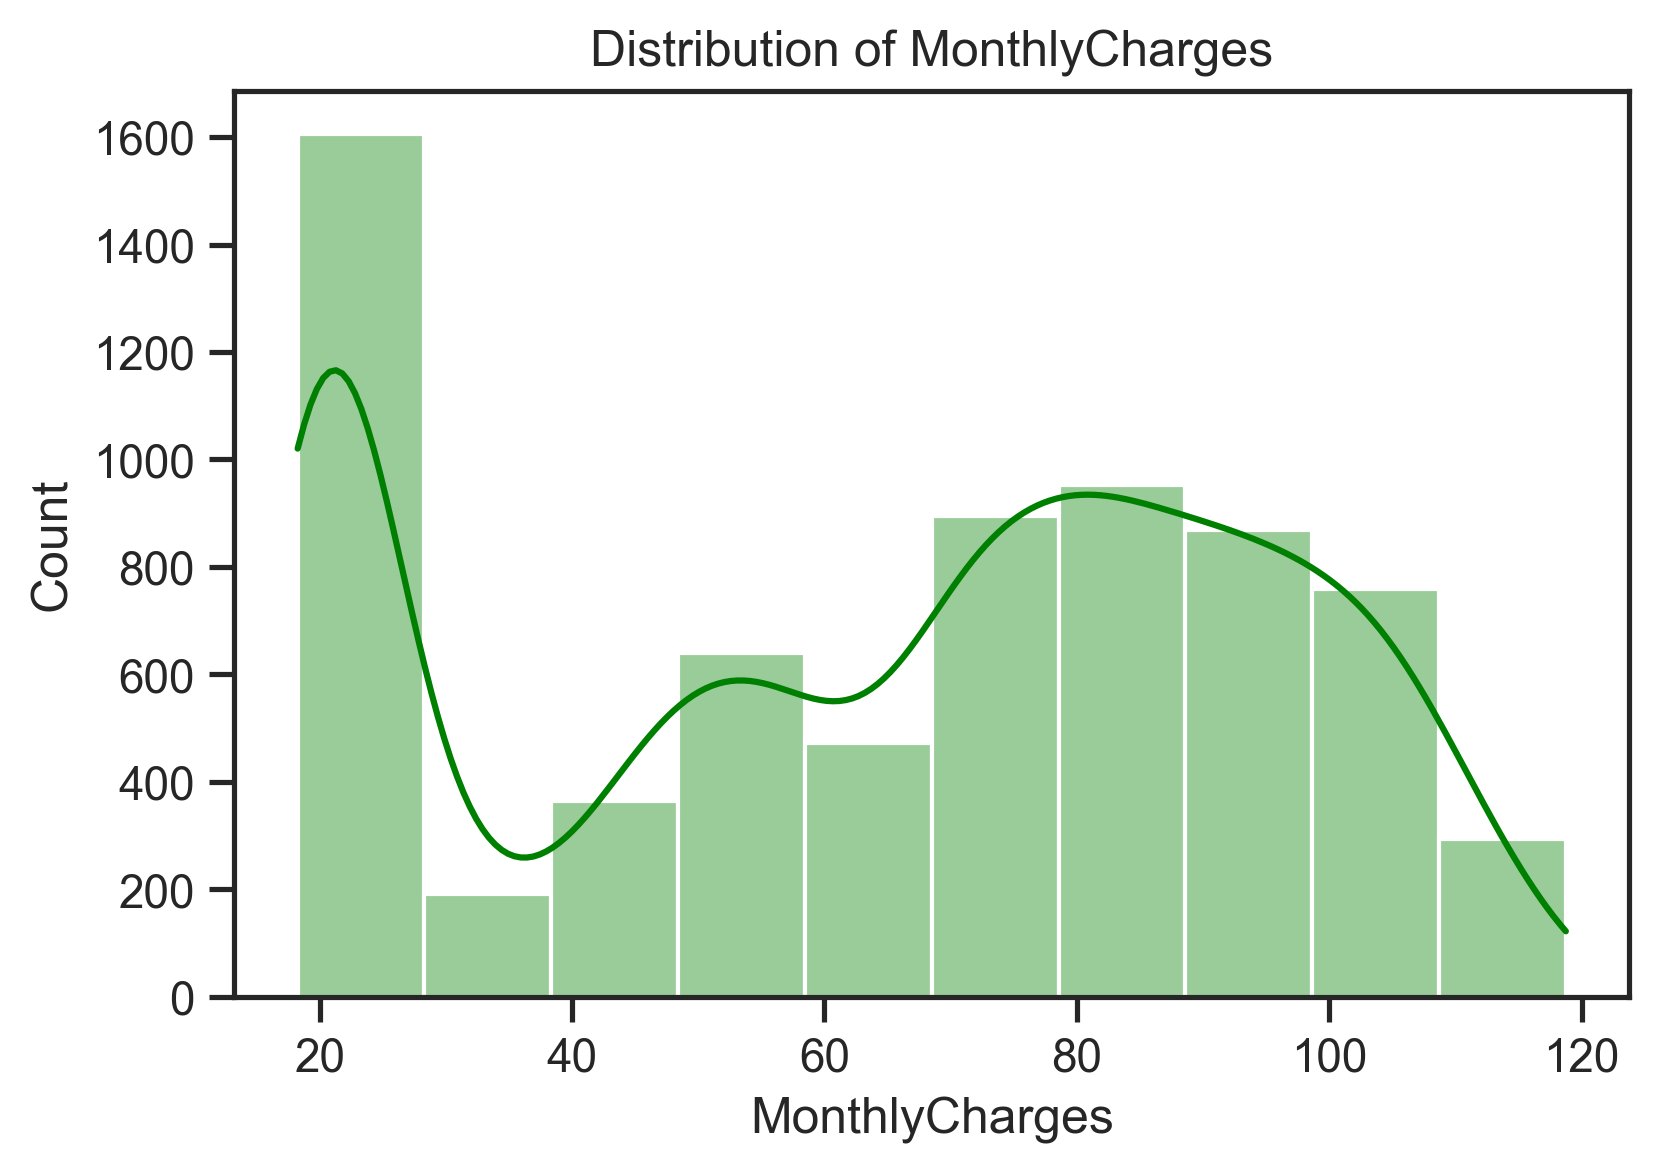

In [215]:
plt.figure(figsize=(6, 4))

sns.histplot(df['MonthlyCharges'], bins=10, kde=True, color='green', alpha=.4)
plt.title('Distribution of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')

plt.show()

  MonthlyCharges_bin  Count  TargetRate  CountPercent  TargetRatePercent
0              18.15   1606    0.092154     22.802783           9.215442
1              28.30    191    0.298429      2.711913          29.842932
2              38.35    365    0.326027      5.182451          32.602740
3              48.40    640    0.237500      9.087037          23.750000
4              58.45    474    0.113924      6.730087          11.392405
5              68.50    893    0.390817     12.679256          39.081747
6              78.55    953    0.372508     13.531166          37.250787
7              88.60    873    0.366552     12.395286          36.655212
8              98.65    754    0.360743     10.705665          36.074271
9             108.70    294    0.146259      4.174358          14.625850


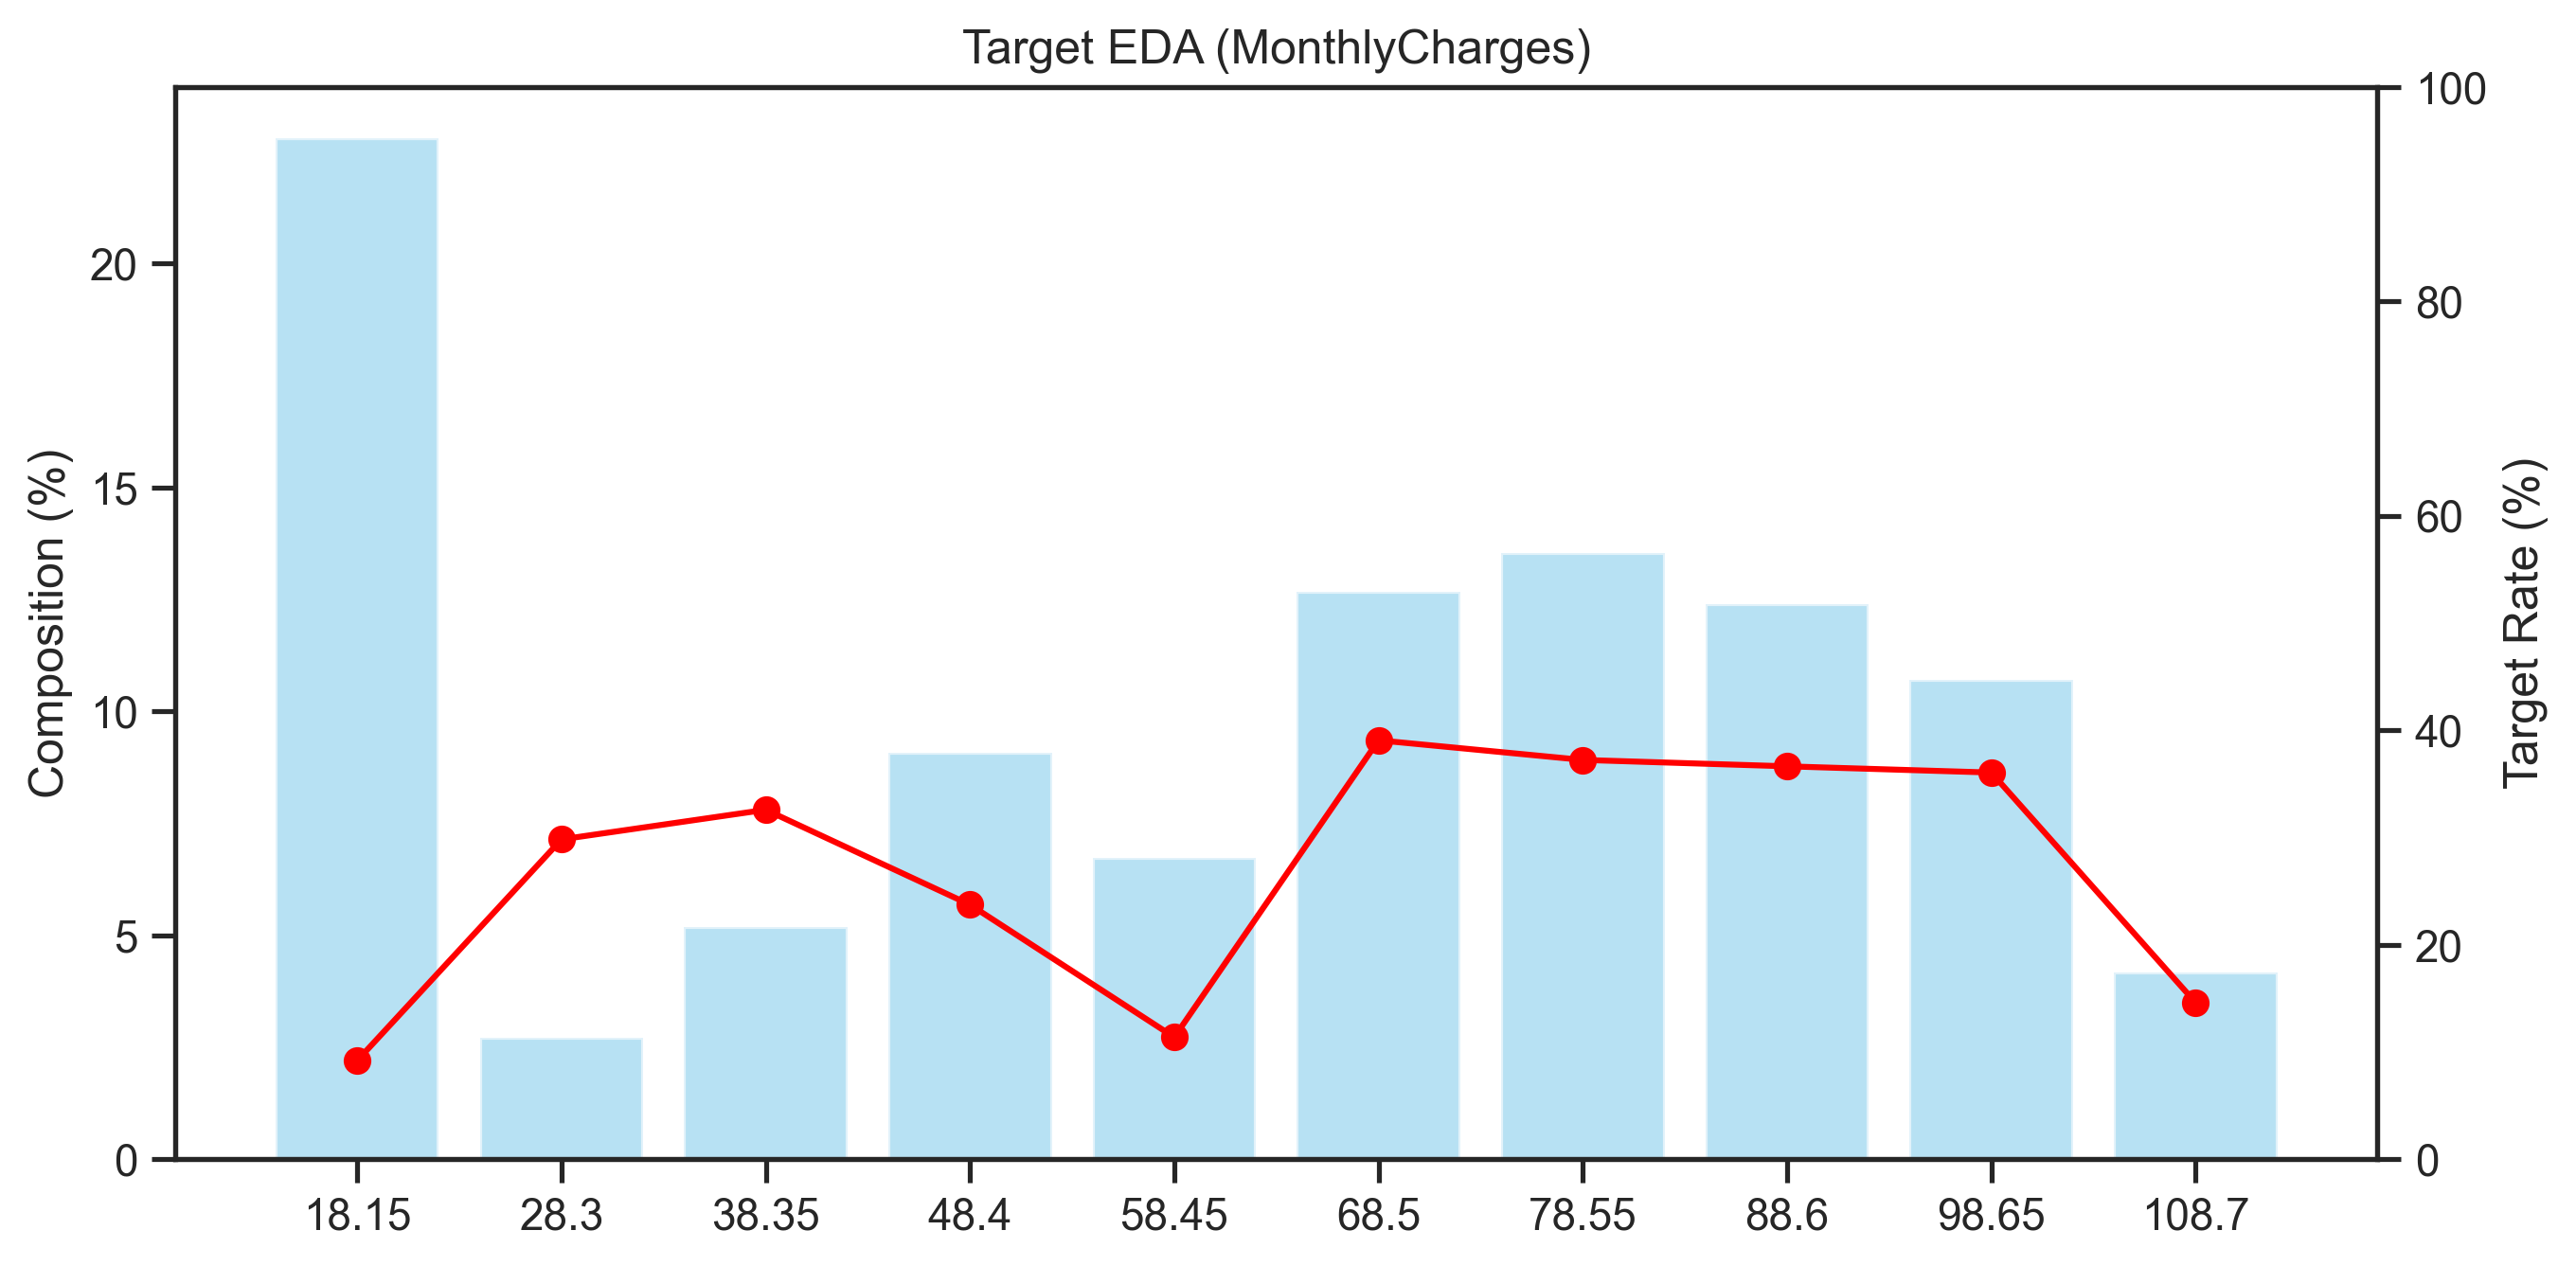

In [216]:
# uniform(균등) binning
# 이게 quantile보다 더 보편적으로 많이 쓰임
eda_target(df, 'MonthlyCharges', target_col='Churn', method='uniform', bins=10)

  MonthlyCharges_bin  Count  TargetRate  CountPercent  TargetRatePercent
0             18.249    717    0.085077     10.180321           8.507671
1             20.050    703    0.098151      9.981542           9.815078
2             25.050    695    0.254676      9.867954          25.467626
3             45.850    702    0.245014      9.967343          24.501425
4             58.830    711    0.215190     10.095130          21.518987
5             70.350    700    0.381429      9.938946          38.142857
6             79.100    705    0.378723     10.009939          37.872340
7             85.500    702    0.343305      9.967343          34.330484
8             94.250    704    0.409091      9.995740          40.909091
9            102.600    704    0.247159      9.995740          24.715909


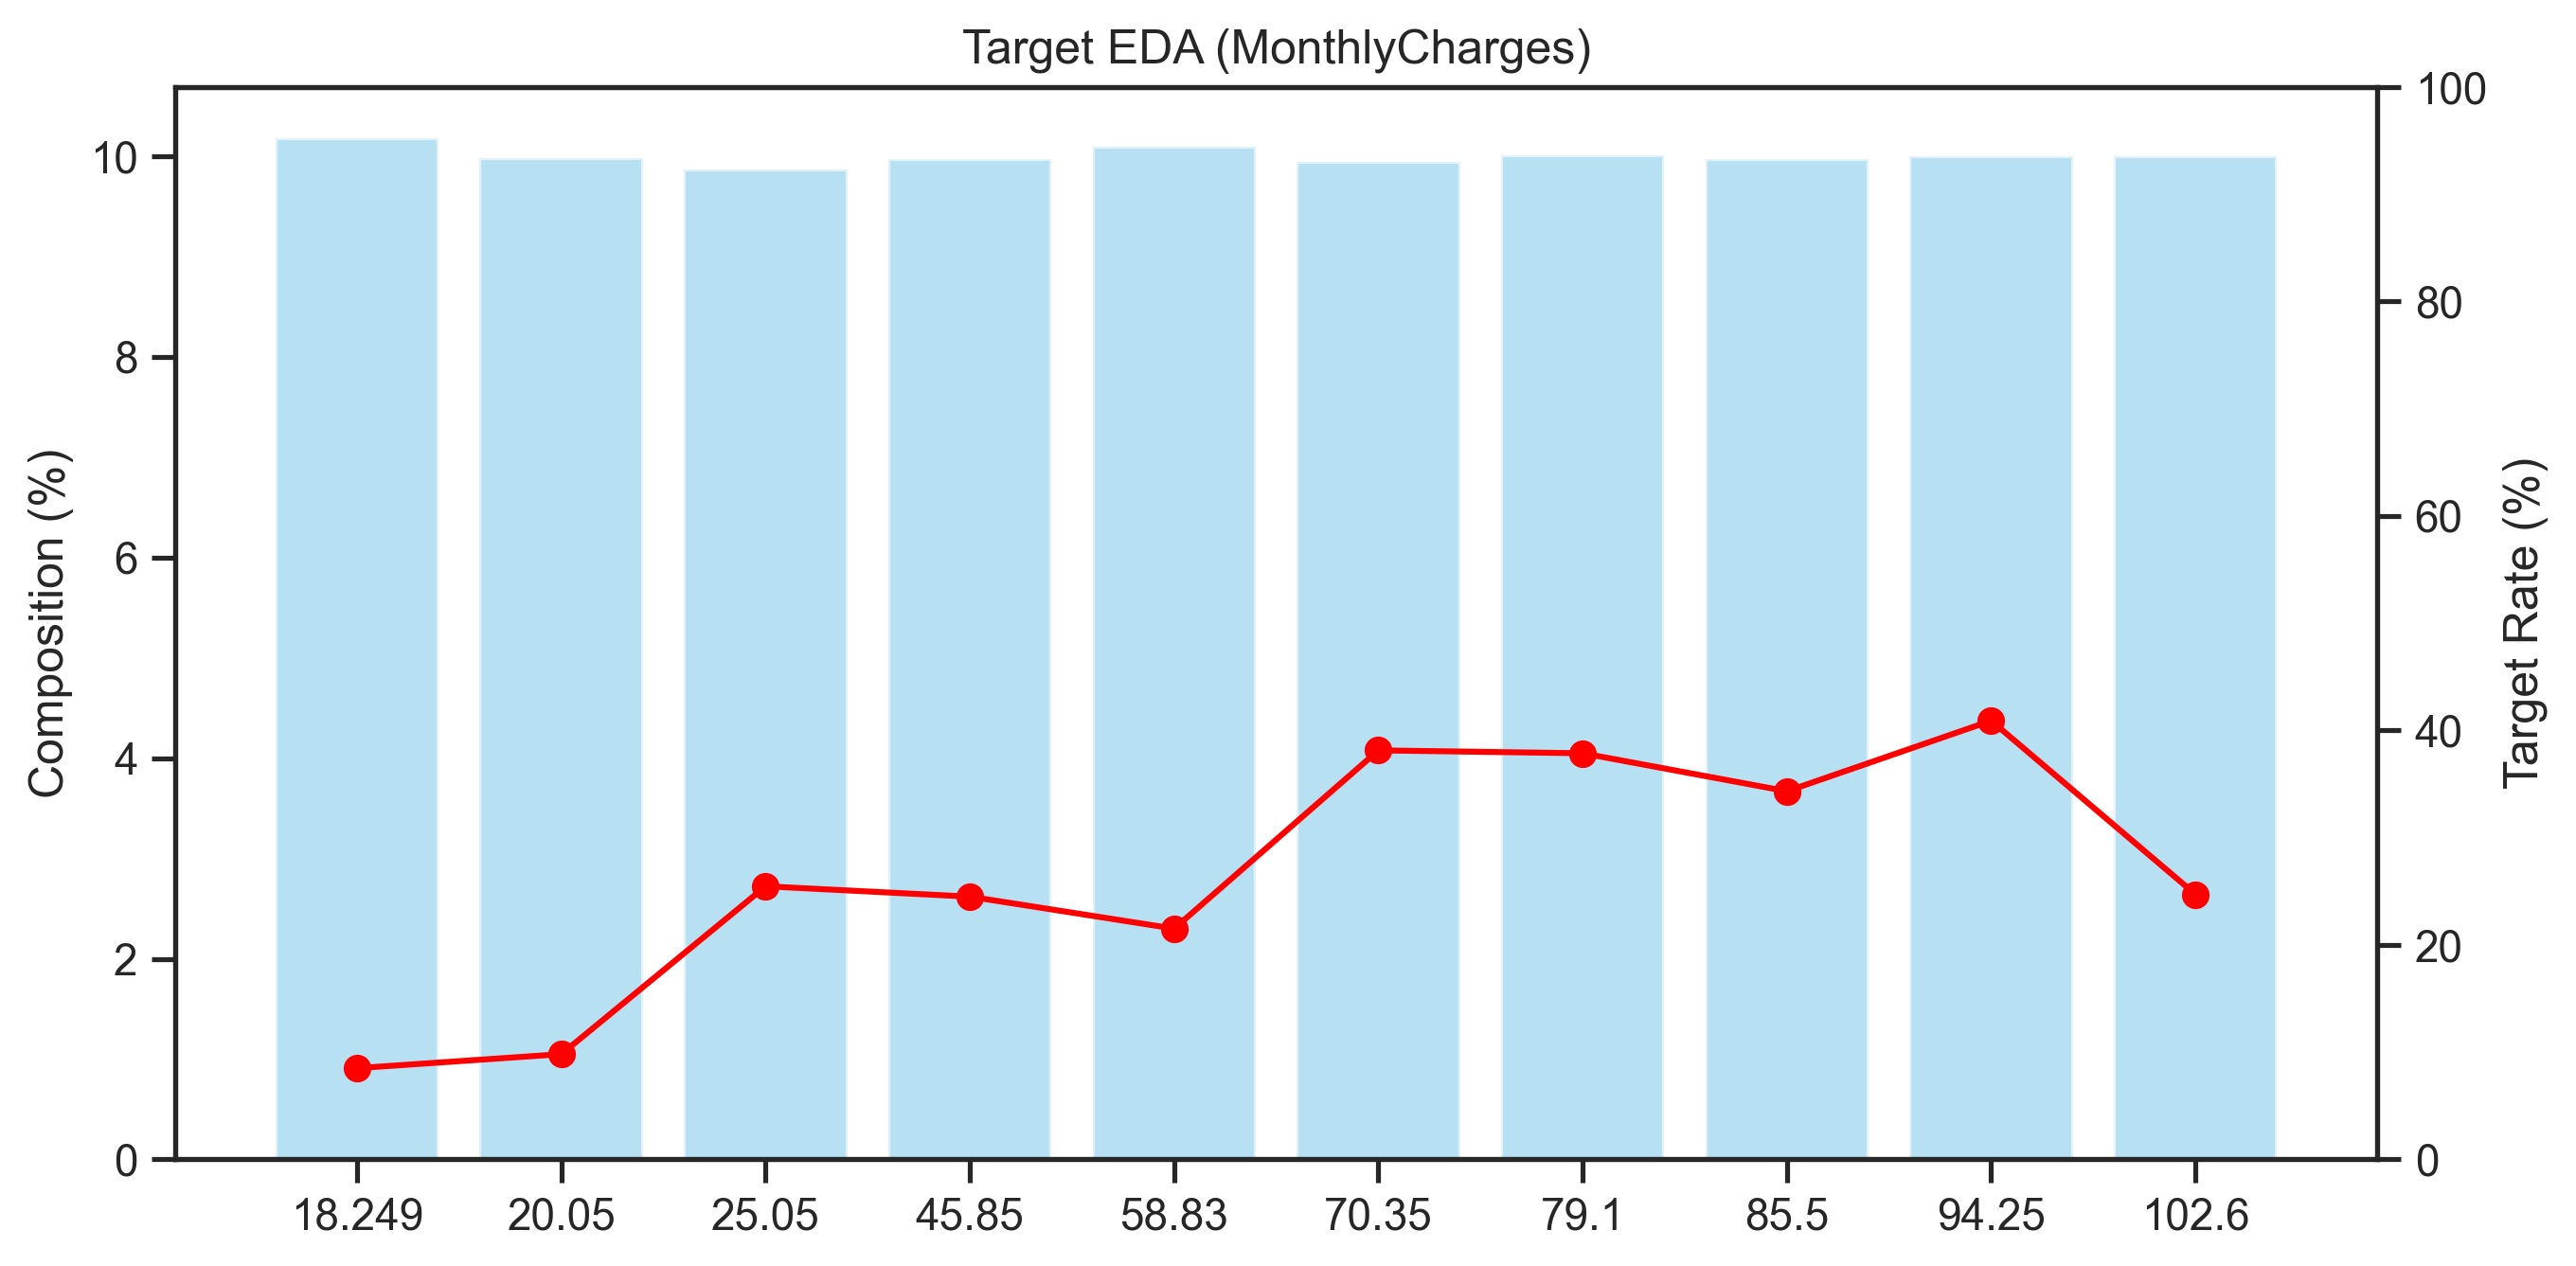

In [217]:
# quantile(분위수) binning
eda_target(df, 'MonthlyCharges', target_col='Churn', bins=10)

## 3.20. TotalCharges에 따른 Churn
- 총 청구액 10~885달러 구간에서 이탈률 37% 수준으로 매우 높음

In [218]:
len(df['TotalCharges'].unique())
# 6531

6531

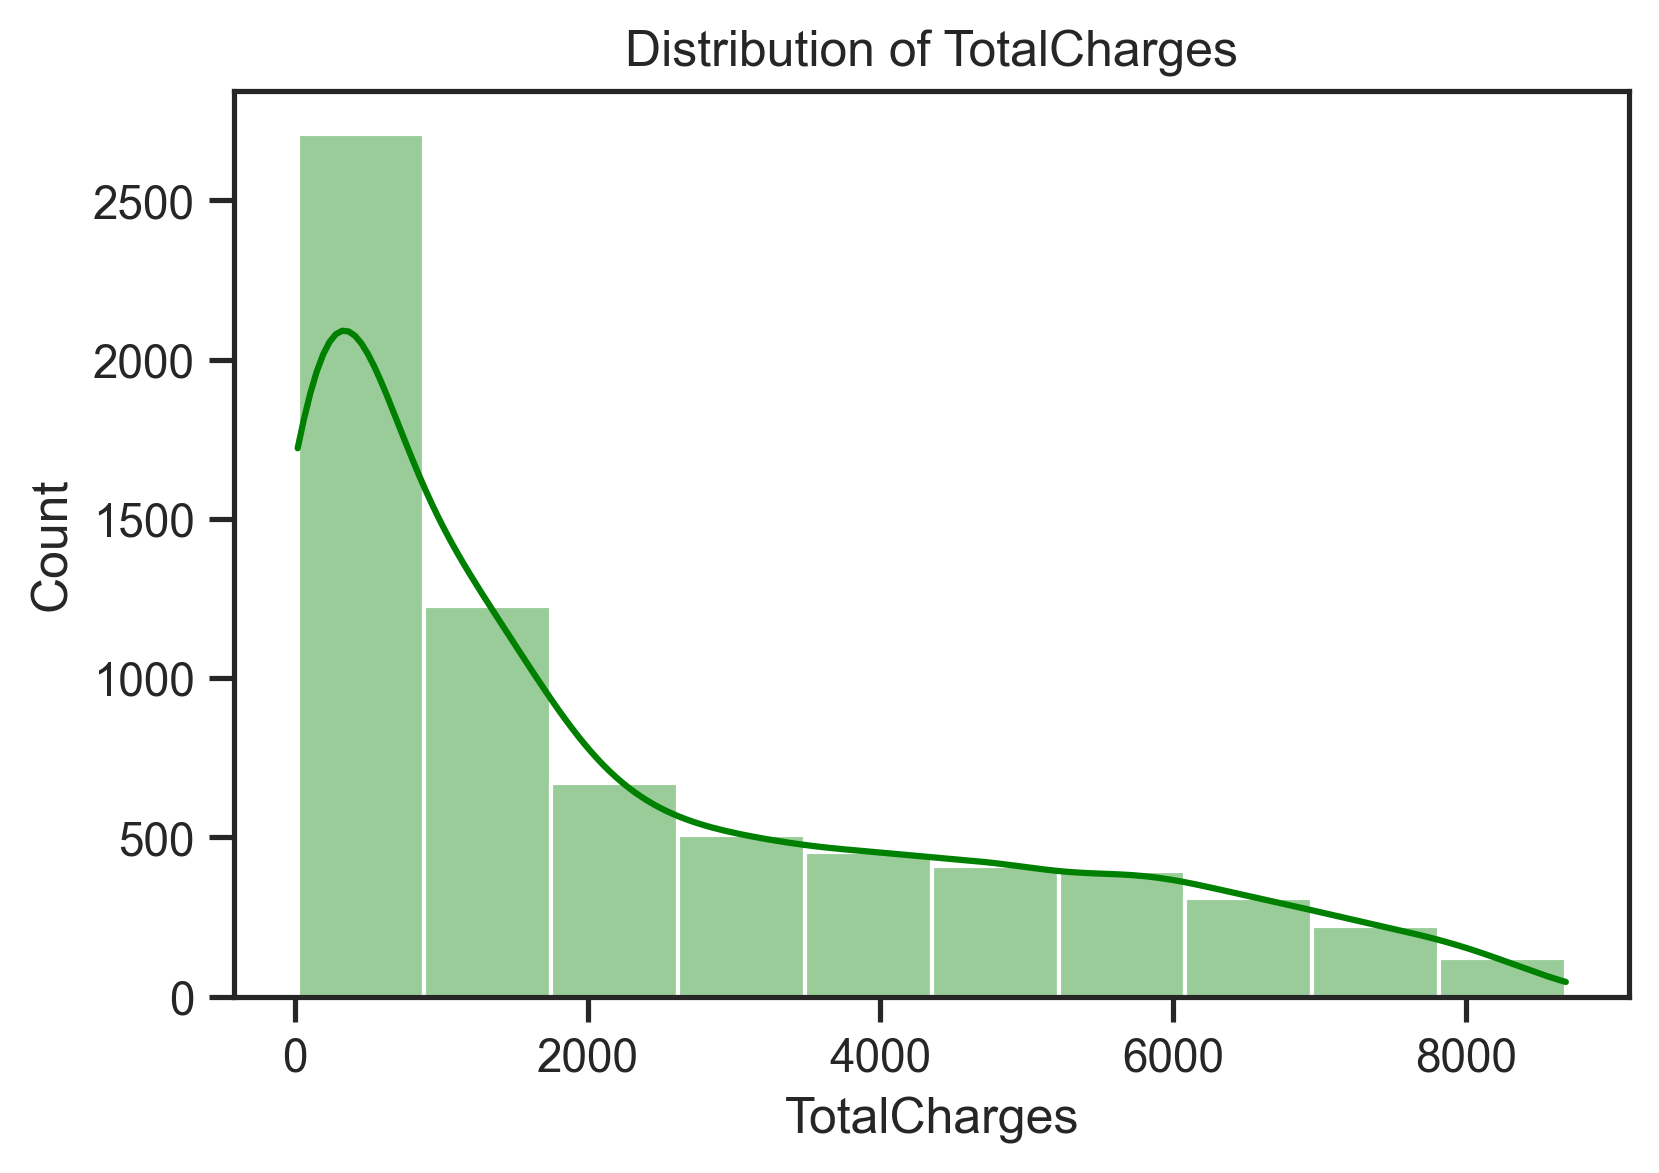

In [219]:
plt.figure(figsize=(6,4))

sns.histplot(df['TotalCharges'], bins=10, kde=True, color='green', alpha=.4)
plt.title('Distribution of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Count')

plt.show()

  TotalCharges_bin  Count  TargetRate  CountPercent  TargetRatePercent
0           10.134   2709    0.377999     38.523891          37.799926
1          885.400   1228    0.220684     17.463026          22.068404
2         1752.000    671    0.247392      9.542093          24.739195
3         2618.600    508    0.246063      7.224118          24.606299
4         3485.200    454    0.160793      6.456200          16.079295
5         4351.800    412    0.167476      5.858931          16.747573
6         5218.400    395    0.146835      5.617179          14.683544
7         6085.000    310    0.148387      4.408419          14.838710
8         6951.600    223    0.143498      3.171217          14.349776
9         7818.200    122    0.040984      1.734926           4.098361


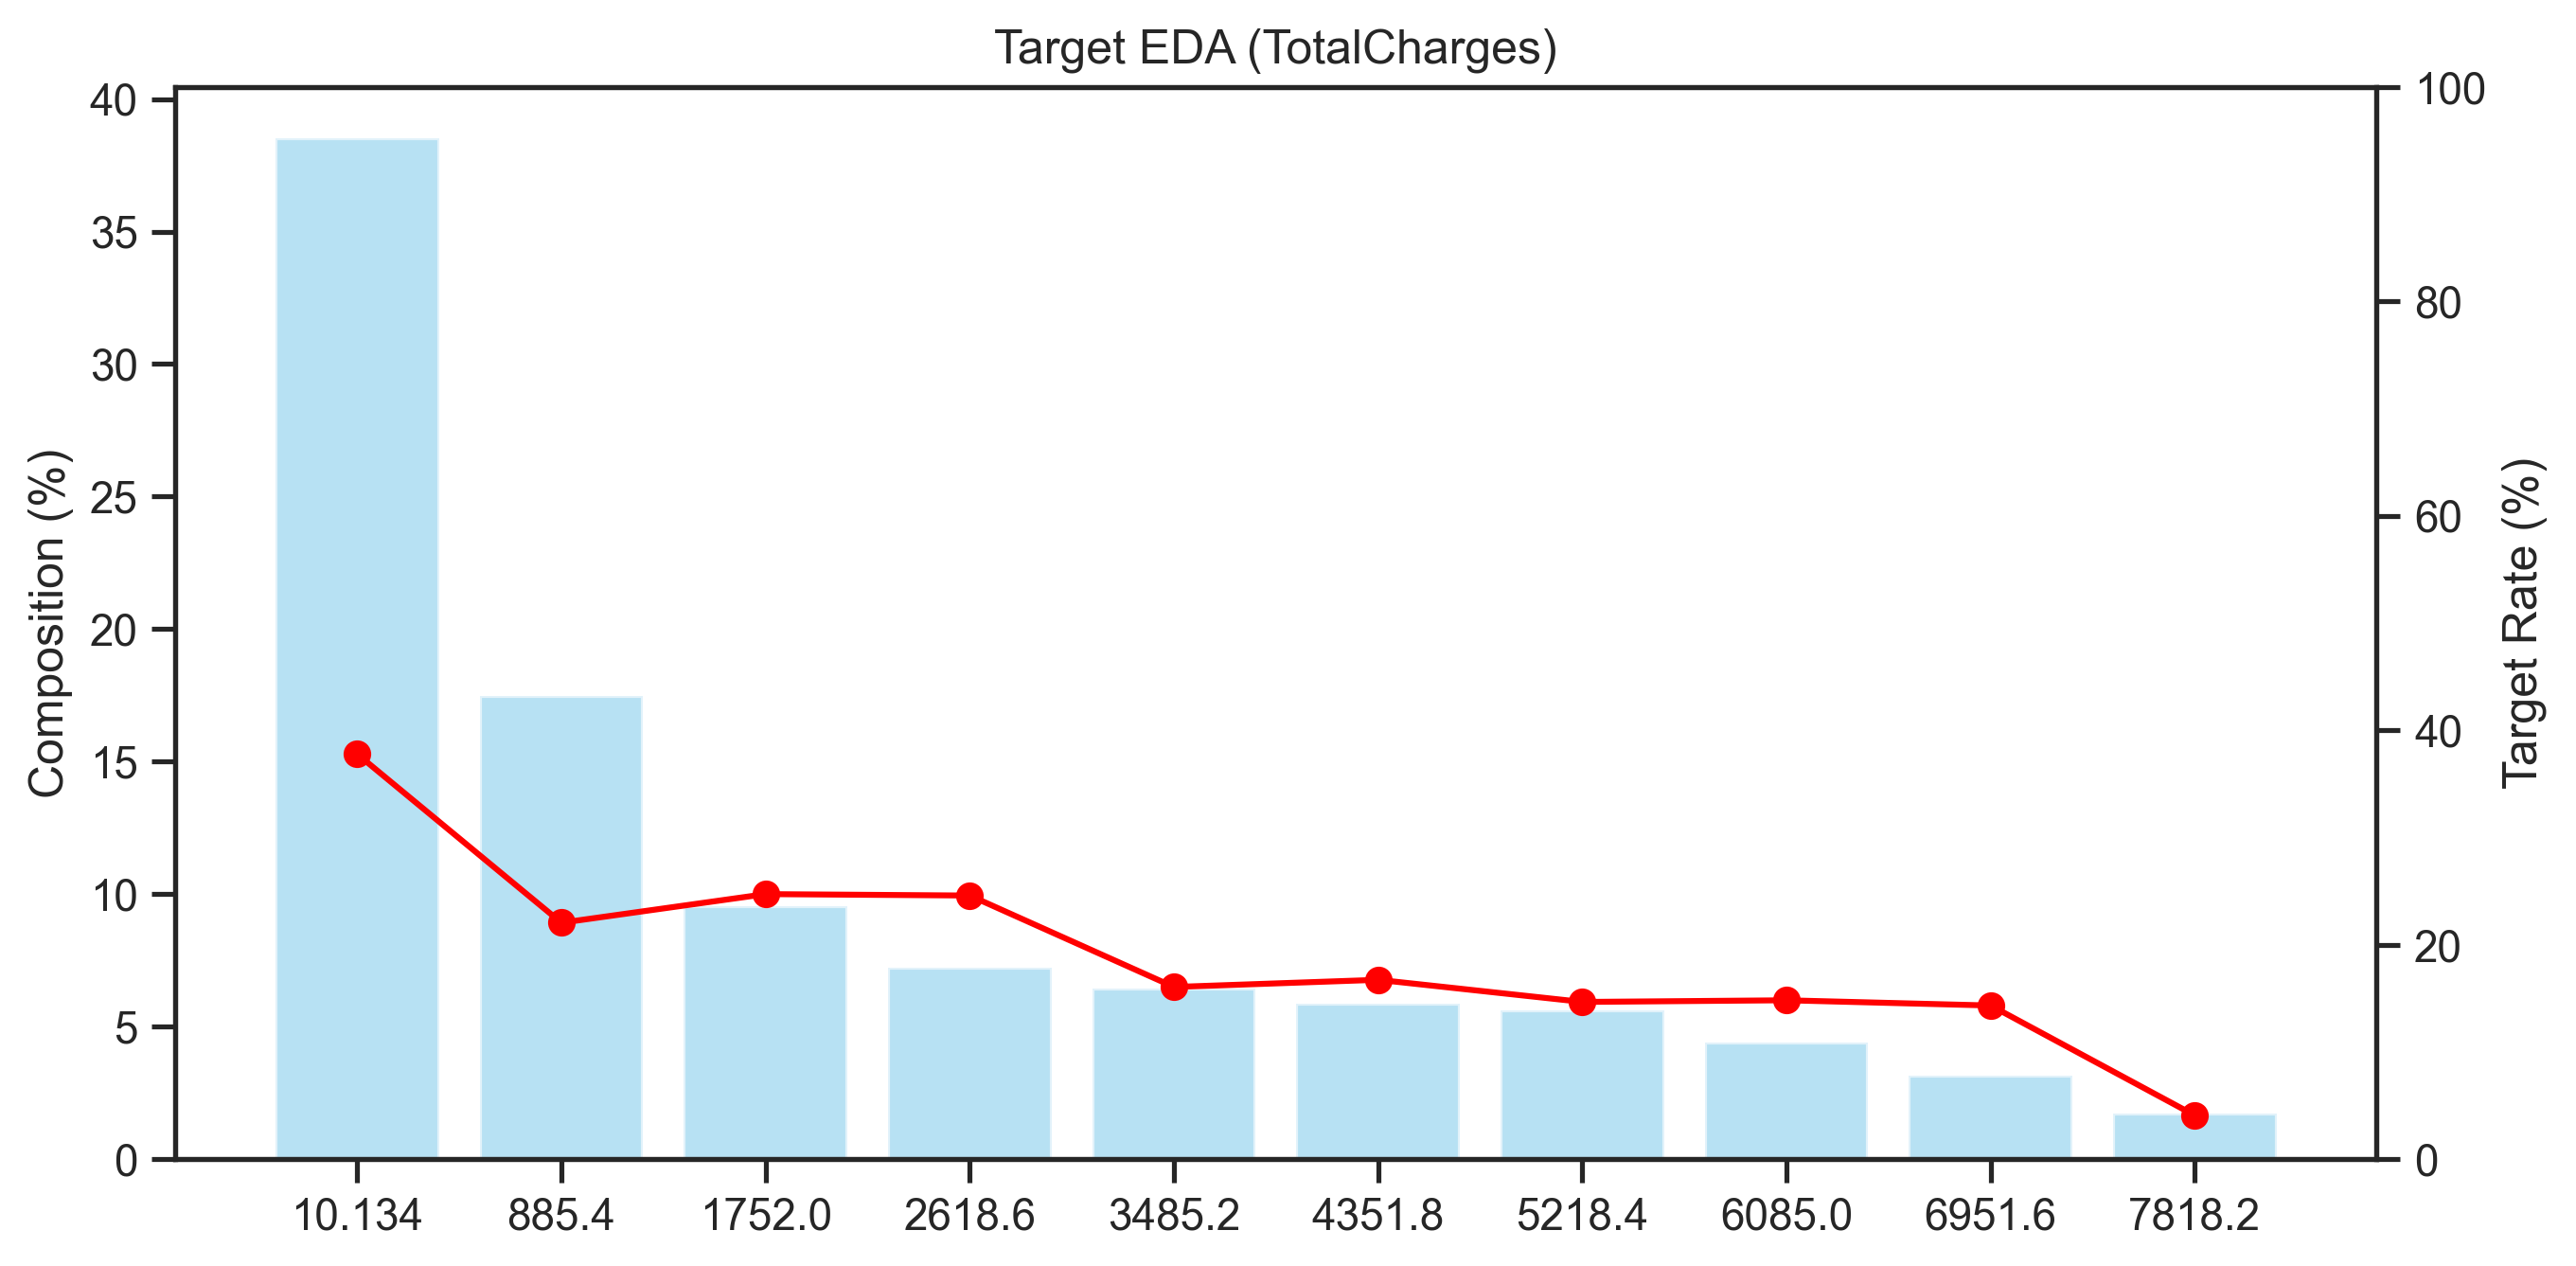

In [220]:
# uniform(균등) binning
eda_target(df, 'TotalCharges', target_col='Churn', method='uniform', bins=10)

# 4. 데이터 전처리

## 4.1. 결측치 처리
- `1012회의` 데이터가 크면 isna 오래걸려서 그냥 함수 만들어서 na본다고 함

### 4.1.1. 해당 데이터에서 사용한 방식(결측치 데이터 제거)

In [289]:
# 결측치 확인
df.isna().sum()
# TotalCharges에 결측치 11개 존재

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
cnt1                 0
dtype: int64

In [290]:
# 결측치 데이터 확인
df[np.isnan(df['TotalCharges'])]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

              TechSupport          StreamingTV      StreamingMovies  Contract  \
488                   Yes                  Yes                   No  Two year   
753   No internet service  No internet service  No internet service  Two year   
936                    No                  Yes                  Yes  Two year   
1082  No internet service  No internet service  No internet service  Two year   
1340                  Yes                  Yes                   No  Two year   
3331  No internet service  No internet service  No internet service  Two year   
3826  No internet service  No internet service  No internet service  Two year   
4380  No internet service  No internet service  No internet service  Two year   
5218  No internet service  No internet service  No internet service  One year   
6670                  Yes                  Yes                   No  Two year   
6754                  Yes                   No                   No  Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges TotalCharges  \
488               Yes  Bank transfer (automatic)          52.55          NaN   
753                No               Mailed check          20.25          NaN   
936                No               Mailed check          80.85          NaN   
1082               No               Mailed check          25.75          NaN   
1340               No    Credit card (automatic)          56.05          NaN   
3331               No               Mailed check          19.85          NaN   
3826               No               Mailed check          25.35          NaN   
4380               No               Mailed check          20.00          NaN   
5218              Yes               Mailed check          19.70          NaN   
6670               No               Mailed check          73.35          NaN   
6754              Yes  Bank transfer (automatic)          61.90          NaN   

      Churn  cnt1  
488       0     1  
753       0     1  
936       0     1  
1082      0     1  
1340      0     1  
3331      0     1  
3826      0     1  
4380      0     1  
5218      0     1  
6670      0     1  
6754      0     1  

[11 rows x 22 col

In [291]:
# 전체 데이터 중 일부이므로 삭제
df = df.dropna(subset='TotalCharges')

# ✍️평균값 대체도 가능
# df = df.fillna(df["TotalCharges"].mean())

In [292]:
df.isna().sum()
# 0

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
cnt1                0
dtype: int64

### 4.1.2. (Option) 결측치 행 삭제
- 이 데이터에서는 4.1에서 진행 완료

In [228]:
df2 = df.copy()  # copy 해야 값복사

In [229]:
df2.shape

(7043, 22)

In [230]:
df2['temp'] = df2['TotalCharges'].tolist()

In [231]:
df2[df2['temp'].isnull() == True].shape

(11, 23)

In [232]:
# 결측치가 있는 행 삭제
df2.dropna(subset=['temp'], inplace=True)

### 4.1.3. (Option) 결측치 컬럼 삭제
- 이 데이터에서는 진행 X

In [233]:
df3 = df.copy()  # copy 해야 값복사

In [234]:
df3['temp'] = np.where(np.random.rand(len(df)) < 0.2, np.nan, np.random.randint(50, 200, size=7043))

In [235]:
df3[df3['temp'].isnull() == True].shape

(1427, 23)

In [236]:
# 결측치가 있는 컬럼 삭제
df3.drop(columns=['temp'], inplace=True)

In [237]:
df3.shape

(7043, 22)

### 4.1.4. (Option) 결측치 자체가 의미 있을 때 다른 값으로 치환
- 이 데이터에서는 진행 X

In [238]:
df4 = df.copy()  # copy 해야 값복사

In [239]:
df4['temp'] = np.where(np.random.rand(len(df)) < 0.2, np.nan, np.random.randint(50, 200, size=7043))

In [240]:
df4[df4['temp'].isnull() == True].shape

(1483, 23)

In [241]:
# 결측치 다른 값으로 치환
df4['temp'].fillna(-999, inplace=True)

In [242]:
df4[df4['temp'].isnull() == True].shape

(0, 23)

### 4.1.5. (Option) 결측치를 평균값으로 대체
- 이 데이터에서는 진행 X

In [243]:
df5 = df.copy()  # copy 해야 값복사

In [244]:
df5['temp'] = np.where(np.random.rand(len(df)) < 0.2, np.nan, np.random.randint(50, 200, size=7043))

In [245]:
df5[df5['temp'].isnull() == True].shape

(1425, 23)

In [246]:
# 결측치 다른 값으로 치환
df5['temp'].fillna(df5['temp'].mean(), inplace=True)

In [247]:
df5[df5['temp'].isnull() == True].shape

(0, 23)

### 4.1.6. (Option) 결측치를 중앙값으로 대체 (이상치가 많을 경우)
- 이 데이터에서는 진행 X

In [259]:
df6 = df.copy()  # copy 해야 값복사

In [260]:
df6['temp'] = np.where(np.random.rand(len(df)) < 0.2, np.nan, np.random.randint(50, 200, size=7043))

In [261]:
df6[df6['temp'].isnull() == True].shape

(1371, 23)

In [262]:
# 결측치 다른 값으로 치환
df6['temp'].fillna(df6['temp'].median(), inplace=True)

In [263]:
df6[df6['temp'].isnull() == True].shape

(0, 23)

### 4.1.7. (Option) 결측치를 이전 행의 값으로 대체 (센서 데이터의 경우)
- 이 데이터에서는 진행 X

In [264]:
df7 = df.copy()  # copy 해야 값복사

In [265]:
df7['temp'] = np.where(np.random.rand(len(df)) < 0.2, np.nan, np.random.randint(50, 200, size=7043))

In [266]:
df7[df7['temp'].isnull() == True].shape

(1420, 23)

In [267]:
df7['temp'].head()

0      NaN
1    188.0
2    163.0
3    193.0
4    131.0
Name: temp, dtype: float64

In [268]:
df7['temp'].tail()

7038    142.0
7039      NaN
7040     77.0
7041    120.0
7042     85.0
Name: temp, dtype: float64

In [269]:
df7['temp'] = df7['temp'].fillna(method='ffill')

In [270]:
df7['temp'].head()

0      NaN
1    188.0
2    163.0
3    193.0
4    131.0
Name: temp, dtype: float64

In [271]:
df7['temp'].tail()

7038    142.0
7039    142.0
7040     77.0
7041    120.0
7042     85.0
Name: temp, dtype: float64

### 4.1.8. (Option) 결측치를 이후 행의 값으로 대체 (센서 데이터의 경우)
- 이 데이터에서는 진행 X

In [272]:
df8 = df.copy()  # copy 해야 값복사

In [273]:
df8['temp'] = np.where(np.random.rand(len(df)) < 0.2, np.nan, np.random.randint(50, 200, size=7043))

In [274]:
df8[df8['temp'].isnull() == True].shape

(1381, 23)

In [275]:
df8['temp'].head()

0    122.0
1    126.0
2    158.0
3    146.0
4    152.0
Name: temp, dtype: float64

In [276]:
df8['temp'].tail()

7038      NaN
7039    100.0
7040    121.0
7041     93.0
7042    111.0
Name: temp, dtype: float64

In [277]:
df8['temp'] = df8['temp'].fillna(method='bfill')

In [278]:
df8['temp'].head()

0    122.0
1    126.0
2    158.0
3    146.0
4    152.0
Name: temp, dtype: float64

In [279]:
df8['temp'].tail()

7038    100.0
7039    100.0
7040    121.0
7041     93.0
7042    111.0
Name: temp, dtype: float64

### 4.1.9. (Option) imputation 모델 이용해 결측치 처리
- 이 데이터에서는 진행 X

In [283]:
df9 = df.copy()  # copy 해야 값복사

In [284]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df9_imputed = imputer.fit_transform(df9[['TotalCharges', 'MonthlyCharges', 'tenure', 'Churn']])

In [285]:
df9_imputed = pd.DataFrame(df9_imputed, columns=['TotalCharges', 'MonthlyCharges', 'tenure', 'Churn'])

In [286]:
df9_imputed.head()

TotalCharges  MonthlyCharges  tenure  Churn
0         29.85           29.85     1.0    0.0
1       1889.50           56.95    34.0    0.0
2        108.15           53.85     2.0    1.0
3       1840.75           42.30    45.0    0.0
4        151.65           70.70     2.0    1.0

In [287]:
df9['TotalCharges'] = list(df9['TotalCharges'])

In [288]:
df9.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  cnt1  
0           Electronic check          29.85        29.85      0     1  
1               Mailed check          56.95      1889.50      0     1  
2               Mailed check          53.85       108.15      1     1  
3  Bank transfer (automatic)          42.30      1840.75      0     1  
4           Electronic check          70.70       151.65      1     1  

[5 rows x 22 columns]

## 4.2. 이상치 처리
- IQR 이상치 제거 기준에 걸리는 값은 없음

In [294]:
num_x = df.loc[:, ['tenure', 'MonthlyCharges', 'TotalCharges']]
num_x.describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

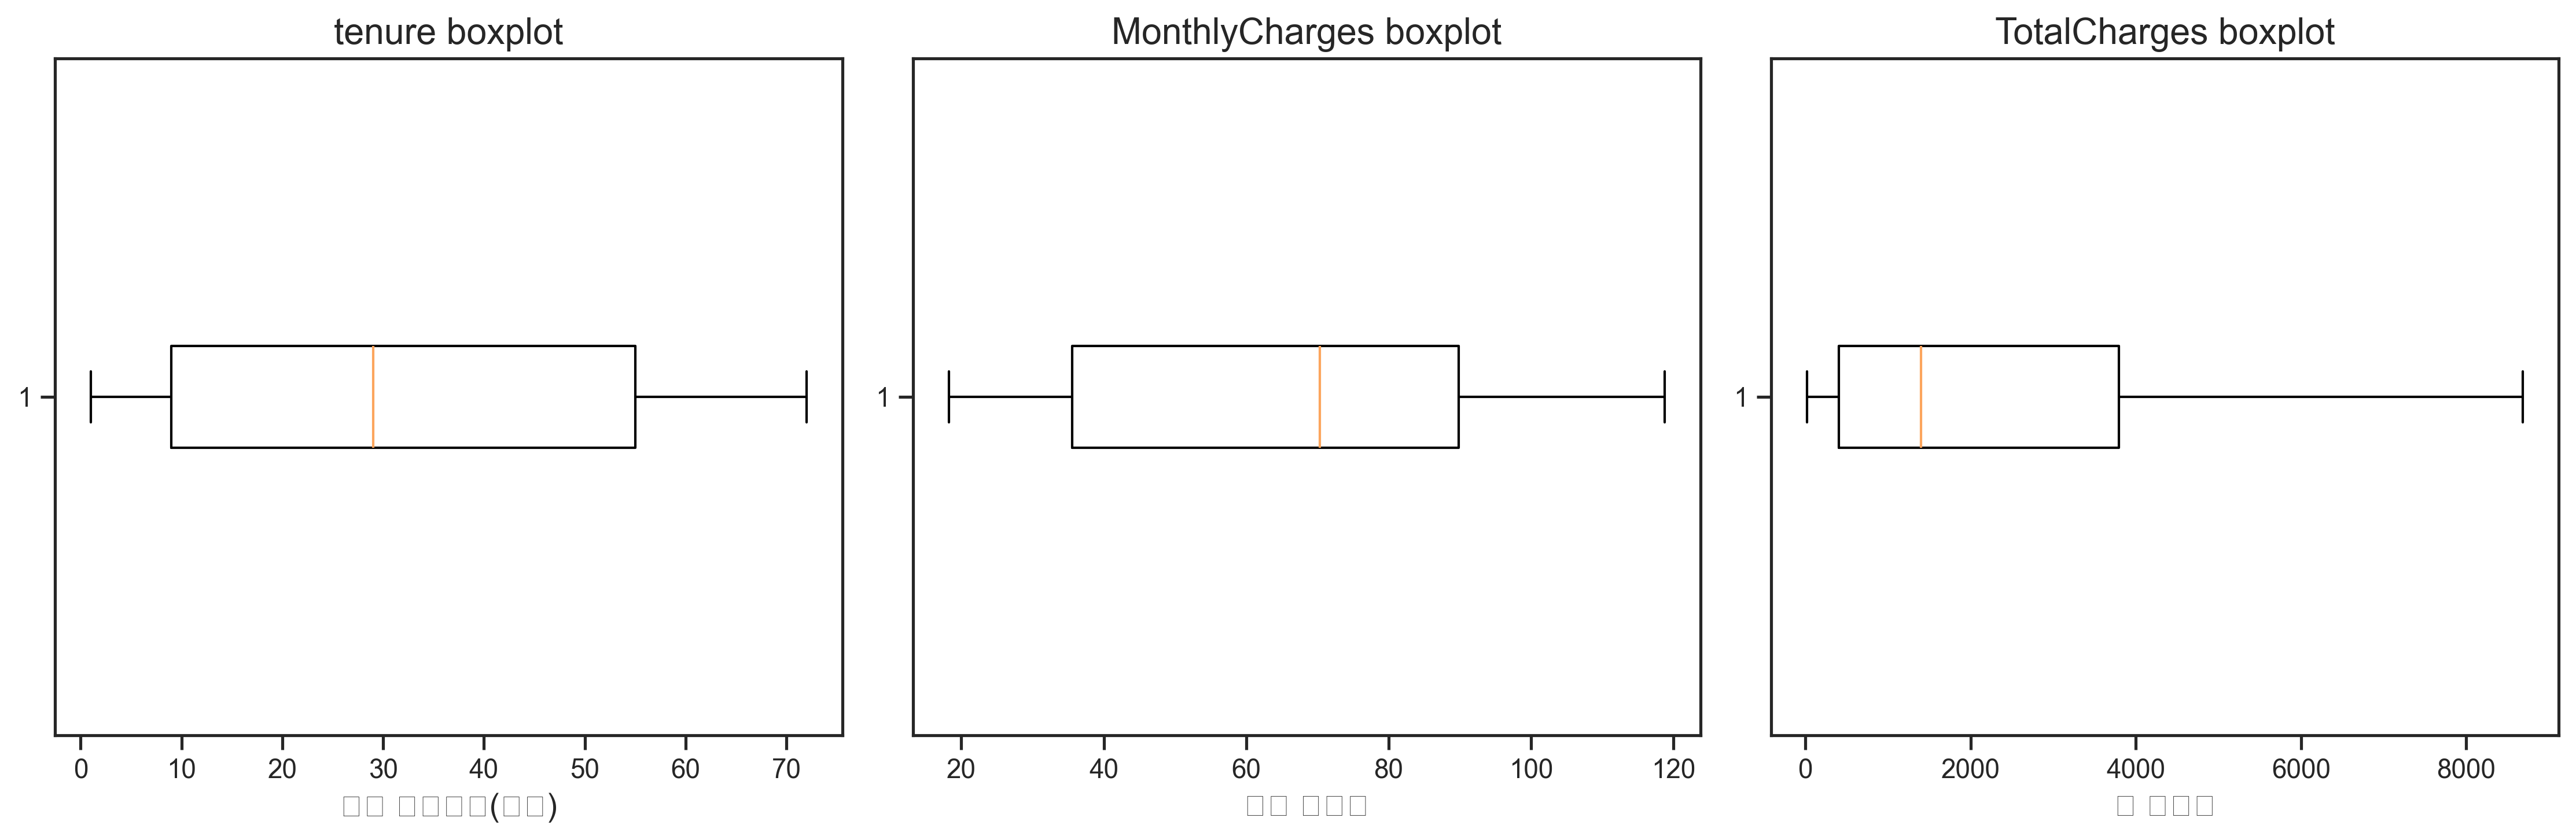

In [295]:
# 이상치 확인(boxplot)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
box_txt = ['고객 체류기간(개월)', '매월 청구액', '총 청구액']  # 후에 딕셔너리로 바꿔서 영<->한 만들어놔도 좋을듯

for i in range(len(num_x.columns)):
    ax[i].boxplot(num_x.iloc[:, i], vert=False)
    ax[i].set_title(f'{num_x.columns[i]} boxplot', size=15)
    ax[i].set_xlabel(box_txt[i], size=13)

plt.tight_layout()
plt.show()

# ✍️5. 문자형 데이터 처리 및 스케일링

1. 문자형 데이터
- 라벨 인코딩
    - 트리계열 모델(DT, RF)에서 주로 사용
    - 트리계열 모델은 수치의 특성을 반영하지 않기 때문
- 원핫 인코딩
    - 선형 모델(LR, SVM 등)에서 사용
    - 선형 모델의 경우 수치가 가중치에 영향을 주기 때문

2. 수치형 데이터
- Min-Max Scailing
- StandardScaler
    - 이상치에 민감하므로 이상치가 많지 않은 데이터에 사용
    - 데이터가 정규분포에 가까울수록 좋음
    - 대부분 ML모델에 적합

## ✍️5.1. 문자형 데이터 더미화

In [296]:
df98 = df.copy()

In [ ]:
# 뒤에서 트리계열 모델을 사용할 예정이므로, 먼저 라벨 인코딩 진행
le = LabelEncoder()
cat_list = ['PhoneService', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for cat in cat_list:
    df[cat] = le.fit_transform(df[cat])

# 더미화 진행하려면 아래처럼!
#df_dummies = pd.get_dummies(df)
#df_dummies.head()

## ✍️5.2. 연속형 데이터 Scale

In [301]:
scaler = StandardScaler()
numc_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[numc_list] = scaler.fit_transform(df[numc_list])

In [302]:
df.tail()

customerID  gender  SeniorCitizen Partner Dependents    tenure  \
7038  6840-RESVB    Male              0     Yes        Yes -0.343137   
7039  2234-XADUH  Female              0     Yes        Yes  1.612573   
7040  4801-JZAZL  Female              0     Yes        Yes -0.872808   
7041  8361-LTMKD    Male              1     Yes         No -1.158016   
7042  3186-AJIEK    Male              0      No         No  1.368109   

      PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038             1               Yes             DSL            Yes  ...   
7039             1               Yes     Fiber optic             No  ...   
7040             0  No phone service             DSL            Yes  ...   
7041             1               Yes     Fiber optic             No  ...   
7042             1                No     Fiber optic            Yes  ...   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
7038            2            2                2         1                 1   
7039            0            2                2         1                 1   
7040            0            0                0         0                 1   
7041            0            0                0         0                 1   
7042            2            2                2         2                 1   

      PaymentMethod  MonthlyCharges  TotalCharges  Churn  cnt1  
7038              3        0.664868     -0.129180      0     1  
7039              1        1.276493      2.241056      0     1  
7040              2       -1.170004     -0.854514      0     1  
7041              3        0.319168     -0.872095      1     1  
7042              0        1.357932      2.012344      0     1  

[5 rows x 22 columns]

In [ ]:
# 위에서 더미화 이후 멘토님 코드 참고
#y = df_dummies['Churn'].values
#X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
#from sklearn.preprocessing import MinMaxScaler
#features = X.columns.values
#scaler = MinMaxScaler(feature_range = (0,1))
#scaler.fit(X)
#X = pd.DataFrame(scaler.transform(X))
#X.columns = features

#X.head()

In [ ]:
#y

# 6. Baseline Model 학습 및 성능 비교